<a href="https://colab.research.google.com/github/PrajsPrabs/UpgradBACaseStudy/blob/main/EComm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [726]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [727]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")


# Data Understanding

In [728]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")

In [729]:
# EleData.info()
print(EleData[['product_analytic_sub_category']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))



   product_analytic_sub_category       0
12             AmplifierReceiver    4056
10                AudioAccessory   11713
6                 AudioMP3Player  112892
7                         Camera  101172
1                CameraAccessory  239508
9                  CameraStorage   17985
5                           Game  114406
13           GameMembershipCards      97
2                GamingAccessory  201899
8                  GamingConsole   29059
4                      HomeAudio  124860
11                   HomeTheatre    4254
0                        Speaker  543928
3                   TVVideoSmall  142995


In [730]:
## correct the datatypes
EleData['order_date']=pd.to_datetime(EleData['order_date'])
EleData['Year']=EleData['Year'].astype(str)
EleData['Month']=EleData['Month'].astype(str)

In [731]:
##  MMM is on subcategories : 'Camera','HomeAudio','GamingAccessory' hence dropping other rows
EleData.product_analytic_sub_category.value_counts()
EleData = EleData.loc[EleData.product_analytic_sub_category.isin(['Camera','HomeAudio','GamingAccessory'])]
EleData.product_analytic_sub_category.value_counts()


GamingAccessory    201899
HomeAudio          124860
Camera             101172
Name: product_analytic_sub_category, dtype: int64

In [732]:
print(EleData[['product_analytic_sub_category','product_analytic_vertical']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))


   product_analytic_sub_category product_analytic_vertical      0
21                        Camera                Camcorders    987
17                        Camera           SportsAndAction   2261
16                        Camera           Instant Cameras   2569
4                         Camera             Point & Shoot  38740
3                         Camera                      DSLR  56615
31               GamingAccessory          GameControlMount      1
28               GamingAccessory                 GamingGun      5
27               GamingAccessory                CoolingPad     46
26               GamingAccessory     GamingChargingStation     47
22               GamingAccessory             GamingSpeaker    500
20               GamingAccessory          MotionController   1183
15               GamingAccessory       JoystickGamingWheel   2863
13               GamingAccessory             GamingAdapter   3232
11               GamingAccessory            GamingMousePad   4887
10        

In [733]:
## dates between July 2015 to June 2016
EleData=EleData.loc[(EleData.order_date >= '2015-07-01') &(EleData.order_date<'2016-07-01')]

In [734]:
EleData.describe()

order_id  order_item_id          units            sla  \
count  4.277750e+05   4.277750e+05  427775.000000  427775.000000   
mean   2.845230e+15   1.321295e+16       1.021941       5.469492   
std    1.268358e+15   5.458201e+16       0.222356       2.658440   
min    1.528676e+08   2.072001e+08       1.000000       0.000000   
25%    1.600075e+15   1.603993e+15       1.000000       4.000000   
50%    2.611817e+15   2.618906e+15       1.000000       5.000000   
75%    3.610341e+15   4.397844e+15       1.000000       7.000000   
max    4.641665e+15   3.000373e+17      19.000000      60.000000   

         product_mrp  product_procurement_sla  
count  427775.000000            427775.000000  
mean     8297.878123                 2.578220  
std     13781.504587                 1.960068  
min         0.000000                -1.000000  
25%       900.000000                 1.000000  
50%      2000.000000                 2.000000  
75%      6900.000000                 3.000000  
max    280000.000000                15.000000

In [735]:
## removing duplicate order items records
EleData= EleData.drop_duplicates(subset=["order_id","order_item_id"],keep='first')

In [736]:
# EleData.info()
Ele_obj_columns=[]
for i in EleData.columns:
  if EleData[i].dtype=='object':
    Ele_obj_columns.append(i)

In [737]:
## removing duplicates using strip and lower and keep first instance
Ele_obj_columns
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.strip())
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.lower())
EleData= EleData.drop_duplicates(keep='first')
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

In [738]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

# Data Cleaning

In [739]:
EleData.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [740]:
## Year and Month

print(EleData.Year.value_counts())
print(EleData.Month.value_counts())

2016    217241
2015    179448
Name: Year, dtype: int64
10    52752
12    43314
1     41236
2     39987
3     38840
5     37301
11    35110
4     31092
6     28785
9     25571
7     22667
8        34
Name: Month, dtype: int64


In [741]:
## gmv
# EleData.gmv.isna().sum()
# print(EleData.loc[EleData.gmv==''].count())
# # # trying to impute using mrp
EleData=EleData[(EleData.gmv!='')]
EleData.gmv=EleData.gmv.astype(float)

In [742]:
# deliverybdays
EleData[EleData.deliverybdays=='\\N']
EleData.deliverybdays.replace('\\N','NA',inplace=True)
EleData.info()
EleData[EleData.deliverycdays=='\\N']
EleData.deliverycdays.replace('\\N','NA',inplace=True)
EleData.deliverybdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.deliverycdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.drop(["deliverybdays","deliverycdays"],1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 395657 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           395657 non-null  object        
 1   order_date                       395657 non-null  datetime64[ns]
 2   Year                             395657 non-null  object        
 3   Month                            395657 non-null  object        
 4   order_id                         395657 non-null  float64       
 5   order_item_id                    395657 non-null  float64       
 6   gmv                              395657 non-null  float64       
 7   units                            395657 non-null  int64         
 8   deliverybdays                    395657 non-null  object        
 9   deliverycdays                    395657 non-null  object        
 10  s1_fact.order_payment_type       395657 

In [743]:
# order_paymeny_type
EleData["s1_fact.order_payment_type"].value_counts()
EleData.rename(columns={"s1_fact.order_payment_type":"order_payment_type"},inplace=True)
EleData.order_payment_type.value_counts()

cod        279237
prepaid    116420
Name: order_payment_type, dtype: int64

In [744]:
# sla
EleData.sla=EleData.sla.astype(int)
EleData[EleData.sla==0].shape[0]/EleData.shape[0]
## impute with median
EleData[EleData.sla==0]['sla'] = EleData.sla.median()


In [745]:
EleData.pincode.value_counts()
## Too many groups , plus format isnt correct so drooping it
EleData.drop(["pincode"],1,inplace=True)

In [746]:
## product analytics category , sub category and vertical

print(EleData.product_analytic_category.value_counts())
print(EleData.product_analytic_sub_category.value_counts())
print(EleData.product_analytic_vertical.value_counts())
##droppning supercategory as its having only 1 value
EleData.drop(['product_analytic_super_category'],1,inplace=True)

gaminghardware        185057
entertainmentsmall    114716
camera                 95884
Name: product_analytic_category, dtype: int64
gamingaccessory    185057
homeaudio          114716
camera              95884
Name: product_analytic_sub_category, dtype: int64
homeaudiospeaker         79638
gamingheadset            59564
dslr                     54956
gamepad                  52821
point & shoot            35422
gamingmouse              34741
fmradio                  25315
gamingaccessorykit        7613
tvoutcableaccessory       6644
gamingkeyboard            6226
gamingmemorycard          5939
gamingmousepad            4173
voicerecorder             3402
gamingadapter             3037
joystickgamingwheel       2672
boombox                   2456
instant cameras           2415
sportsandaction           2171
dock                      1889
hifisystem                1400
motioncontroller          1039
camcorders                 920
gamingspeaker              496
dockingstation            

In [747]:
## vertical grouping
print(EleData[['product_analytic_sub_category','product_analytic_vertical']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))
vertical1=(EleData.product_analytic_vertical.value_counts()<10000)[EleData.product_analytic_vertical.value_counts()<10000].index
EleData.product_analytic_vertical.value_counts()<20000

   product_analytic_sub_category product_analytic_vertical      0
21                        camera                camcorders    920
17                        camera           sportsandaction   2171
16                        camera           instant cameras   2415
4                         camera             point & shoot  35422
2                         camera                      dslr  54956
31               gamingaccessory          gamecontrolmount      1
29               gamingaccessory                 gaminggun      3
27               gamingaccessory     gamingchargingstation     43
26               gamingaccessory                coolingpad     45
22               gamingaccessory             gamingspeaker    496
20               gamingaccessory          motioncontroller   1039
14               gamingaccessory       joystickgamingwheel   2672
13               gamingaccessory             gamingadapter   3037
11               gamingaccessory            gamingmousepad   4173
10        

homeaudiospeaker         False
gamingheadset            False
dslr                     False
gamepad                  False
point & shoot            False
gamingmouse              False
fmradio                  False
gamingaccessorykit        True
tvoutcableaccessory       True
gamingkeyboard            True
gamingmemorycard          True
gamingmousepad            True
voicerecorder             True
gamingadapter             True
joystickgamingwheel       True
boombox                   True
instant cameras           True
sportsandaction           True
dock                      True
hifisystem                True
motioncontroller          True
camcorders                True
gamingspeaker             True
dockingstation            True
djcontroller              True
soundmixer                True
coolingpad                True
gamingchargingstation     True
slingbox                  True
gaminggun                 True
karaokeplayer             True
gamecontrolmount          True
Name: pr

In [748]:
EleData["product_analytic_vertical_derived"]=EleData.product_analytic_vertical.replace(vertical1,"Others")

In [749]:
print(EleData[['product_analytic_sub_category','product_analytic_vertical_derived']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))


  product_analytic_sub_category product_analytic_vertical_derived      0
9                        camera                            Others   5506
5                        camera                     point & shoot  35422
2                        camera                              dslr  54956
6               gamingaccessory                       gamingmouse  34741
4               gamingaccessory                            Others  37931
3               gamingaccessory                           gamepad  52821
1               gamingaccessory                     gamingheadset  59564
8                     homeaudio                            Others   9763
7                     homeaudio                           fmradio  25315
0                     homeaudio                  homeaudiospeaker  79638


# Data Analysis and feature extraction

In [750]:
EleData.Year=EleData.Year.astype(object)
EleData.Month=EleData.Month.astype(object)
EleData.columns


Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla', 'cust_id',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived'],
      dtype='object')

In [751]:
## Deleting columns which wont be required
EleData2=EleData.drop(['fsn_id','cust_id','order_id'],1)


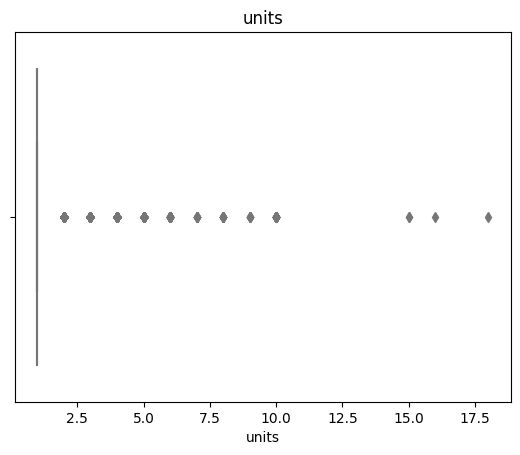

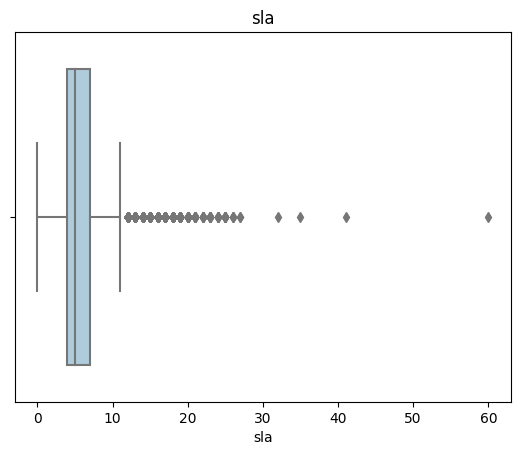

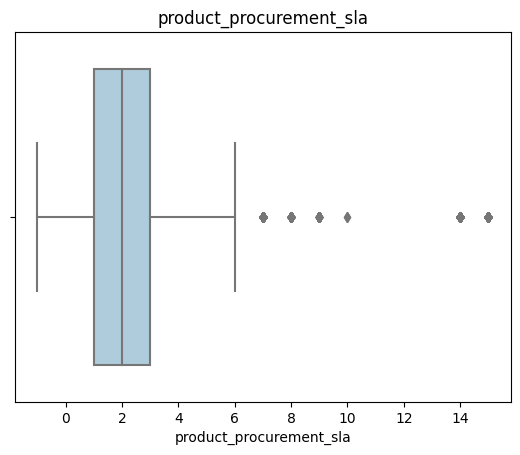

In [752]:
## integer column handling
num=[]
obj=[]
for i in EleData2.columns:
  if EleData2[i].dtype=='float64':
    num.append(i)
  if EleData2[i].dtype=='int64':
    num.append(i)
  if EleData2[i].dtype=='object':
    obj.append(i)


num.remove('order_item_id')

x=1
for i in num:
  plt.title(i)
  sns.boxplot(x=EleData2[i])
  plt.show()
  x=x+1

## we will treat outliers later based on sub categories

In [753]:
EleData2.columns
EleData2.order_date=EleData2['order_date'].dt.date

In [754]:
## Week
EleData2['week']=((pd.to_datetime(EleData2['order_date'])-pd.to_datetime('2015-07-01'))/7)
EleData2['week']=EleData2['week'].apply(lambda x: x.days+1)
EleData2.loc[:,['order_date','week']]
EleData2.week.value_counts()

16    28442
44    13958
19    13225
30    12482
36    12240
25    12165
34    12092
48    11047
26     9762
32     9499
37     9451
23     9406
28     9009
35     9000
24     8572
27     8469
31     8251
33     8234
46     8168
17     8003
18     7957
47     7703
29     7569
22     7442
45     7425
49     7367
40     7159
41     7121
38     7101
50     6966
39     6799
20     6576
51     6530
3      6431
10     6342
15     6243
2      6205
52     6198
13     6141
21     5921
4      5691
12     5595
11     5593
14     5520
42     5282
43     2532
5      2531
53     1724
1      1578
9       933
6         4
8         2
7         1
Name: week, dtype: int64

In [755]:
# 2. Listing Price and Pricing Discounts
EleData2=EleData2[EleData.product_mrp!=0]
EleData2['gmv']=EleData2.gmv.astype(float)
EleData2['listing_price'] = ((EleData2.gmv)/EleData2.units).round(2)
EleData2['discount_per']=(((EleData2['product_mrp']-EleData2['listing_price'])/EleData2['product_mrp'])).round(2)
EleData2.discount_per.describe()
EleData2[EleData2.product_mrp < EleData2.listing_price]
EleData2=EleData2[EleData2.product_mrp >= EleData2.listing_price]

In [756]:
## joining rest of the data and calculating other variables from it
# ProdList
# Investment
# MonthlyNPS
# SalesCal
# Ont2015
# Ont2016


In [757]:
# ## Sales
SalesCal = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Special Sale Calendar")

# SalesCal.head(20)

SalesCal1=pd.DataFrame(['2015-07-18','2015-07-19','2015-08-15','2015-08-16','2015-08-17','2015-08-28','2015-08-29','2015-08-30',
                        '2015-10-15','2015-10-16','2015-10-17','2015-11-07','2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12',
                        '2015-11-13','2015-11-14','2015-12-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30','2015-12-31',
                        '2016-01-01','2016-01-02','2016-01-03','2016-01-20','2016-01-21','2016-01-22','2016-02-01','2016-02-02','2016-02-20','2016-02-21',
                       '2016-02-14','2016-02-15','2016-03-07','2016-03-08','2016-03-09','2016-05-25','2016-05-26','2016-05-27'],columns=["sale_date"])

# SalesCal1=SalesCal1[0].to_list()
# SalesCal1
EleData2.order_date=EleData2.order_date.apply(lambda x :str(x).strip())
EleData2=pd.merge(EleData2,SalesCal1,left_on='order_date',right_on='sale_date',how='left')
# # test[~test["date"].isna()]
# EleData2['sale_date'].value_counts()

In [758]:
### Weather infomation canada
Ont2015=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2015.xlsx",header=24)
Ont2016=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2016.xlsx",header=24)
Ont_Weather = pd.concat([Ont2015,Ont2016])
Ont_Weather=Ont_Weather.loc[(Ont_Weather['Date/Time']>='2015-07-01') &(Ont_Weather['Date/Time']<'2016-07-01')]

# Ont2015['Max Temp Flag'].value_counts()
todrop= (Ont_Weather.isnull().sum()/Ont_Weather.shape[0]).reset_index()
todrop
req=todrop.loc[todrop[0]<0.50,:]['index'].to_list()
Ont_Weather=Ont_Weather[req]
Ont_Weather =Ont_Weather.drop(['Total Precip (mm)','Snow on Grnd (cm)','Data Quality'],1)

# Ont_Weather
Ont_Weather['week']=((pd.to_datetime(Ont_Weather['Date/Time'])-pd.to_datetime('2015-07-01'))/7)
Ont_Weather['week']=Ont_Weather['week'].apply(lambda x: x.days+1)
Ont_Weather['Date/Time']=Ont_Weather['Date/Time'].dt.date
weekly_kpis=Ont_Weather.groupby('week').mean().reset_index()

In [759]:
weekly_kpis.head()
weekly_kpis.drop(['Year','Month'],1,inplace=True)

In [760]:

weekly_kpis=weekly_kpis.sort_values(by='week')
Ont_Weather.info()
weekly_kpis.rename(columns={"Max Temp (°C)":"max_temp_c","Min Temp (°C)":"mon_temp_c","Mean Temp (°C)":"mean_temp_c",
                            "Heat Deg Days (°C)":"heat_deg_c","Cool Deg Days (°C)":"cool_deg_c","Total Rain (mm)":"total_rain",
                            "Total Snow (cm)":"total_snow"},inplace=True)
## filling missing values with fronyfill method as temp is time series
weekly_kpis.ffill(inplace=True)
weekly_kpis.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 181 to 181
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           366 non-null    object 
 1   Year                366 non-null    int64  
 2   Month               366 non-null    int64  
 3   Day                 366 non-null    int64  
 4   Max Temp (°C)       208 non-null    float64
 5   Min Temp (°C)       191 non-null    float64
 6   Mean Temp (°C)      191 non-null    float64
 7   Heat Deg Days (°C)  191 non-null    float64
 8   Cool Deg Days (°C)  191 non-null    float64
 9   Total Rain (mm)     215 non-null    float64
 10  Total Snow (cm)     215 non-null    float64
 11  week                366 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 37.2+ KB


week           0
Day            0
max_temp_c     0
mon_temp_c     0
mean_temp_c    0
heat_deg_c     0
cool_deg_c     0
total_rain     0
total_snow     0
dtype: int64

In [761]:
# MonthlyNPS
MonthlyNPS = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Monthly NPS Score")
# ?pd.melt
MonthlyNPS.head()
NPS = pd.melt(MonthlyNPS,id_vars="Unnamed: 0",value_vars=["July'15","Aug'15","Sept'15","Oct'15","Nov'15",
                                                  "Dec'15","Jan'16","Feb'16","Mar'16","Apr'16",
                                                  "May'16","June'16"],).reset_index()
# ?pd.pivot
NPS.rename(columns={"Unnamed: 0":"Header","variable":"Month1","value":"Value"},inplace=True)
# NPS
# NPS
NPS['Month']=0
NPS.loc[NPS["Month1"].str.startswith("July"), "Month"] = 7
NPS.loc[NPS["Month1"].str.startswith("Aug"), "Month"] = 8
NPS.loc[NPS["Month1"].str.startswith("Sept"), "Month"] = 9
NPS.loc[NPS["Month1"].str.startswith("Oct"), "Month"] = 10
NPS.loc[NPS["Month1"].str.startswith("Nov"), "Month"] = 11
NPS.loc[NPS["Month1"].str.startswith("Dec"), "Month"] = 12
NPS.loc[NPS["Month1"].str.startswith("Jan"), "Month"] = 1
NPS.loc[NPS["Month1"].str.startswith("Feb"), "Month"] = 2
NPS.loc[NPS["Month1"].str.startswith("Mar"), "Month"] = 3
NPS.loc[NPS["Month1"].str.startswith("Apr"), "Month"] = 4
NPS.loc[NPS["Month1"].str.startswith("May"), "Month"] = 5
NPS.loc[NPS["Month1"].str.startswith("June"), "Month"] = 6
NPS['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016])
NPS['Month']=NPS['Month'].astype(str)
NPS.drop("index",1,inplace=True)

# print(NPS)
# print(NPS)
NPS


Header   Month1        Value Month  Year
0           NPS  July'15    54.599588     7  2015
1   Stock Index  July'15  1177.000000     7  2015
2           NPS   Aug'15    59.987101     8  2015
3   Stock Index   Aug'15  1206.000000     8  2015
4           NPS  Sept'15    46.925419     9  2015
5   Stock Index  Sept'15  1101.000000     9  2015
6           NPS   Oct'15    44.398389    10  2015
7   Stock Index   Oct'15  1210.000000    10  2015
8           NPS   Nov'15    47.000000    11  2015
9   Stock Index   Nov'15  1233.000000    11  2015
10          NPS   Dec'15    45.800000    12  2015
11  Stock Index   Dec'15  1038.000000    12  2015
12          NPS   Jan'16    47.093031     1  2016
13  Stock Index   Jan'16  1052.000000     1  2016
14          NPS   Feb'16    50.327406     2  2016
15  Stock Index   Feb'16  1222.000000     2  2016
16          NPS   Mar'16    49.020550     3  2016
17  Stock Index   Mar'16  1015.000000     3  2016
18          NPS   Apr'16    51.827605     4  2016
19  Stock Index   Apr'16  1242.000000     4  2016
20          NPS   May'16    47.306951     5  2016
21  Stock Index   May'16  1228.000000     5  2016
22          NPS  June'16    50.516687     6  2016
23  Stock Index  June'16  1194.000000     6  2016

In [762]:
EleData2.rename(columns={"Year_x":"Year","Month_x":"Month"},inplace=True)
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='Stock Index'],how='left',on='Month')
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='NPS'],how='left',on='Month')
# EleData2['Year_x'].count()
EleData2.rename(columns={"Value_x":"Stock_Index","Value_y":"NPS"},inplace=True)


In [763]:
# lets clean the frame with _x _y coluumns
# EleData2.columns
EleData2['Year']=EleData2['Year_x']
# EleData2['week']=EleData2['week_x']

col=[]
for i in EleData2.columns:
  if (str(i).endswith("_x")) | (str(i).endswith("_y") | (str(i)=='key_0')):
    col.append(i)

EleData2.drop(col,1,inplace=True)


In [764]:
EleData2.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived', 'week', 'listing_price',
       'discount_per', 'sale_date', 'Stock_Index', 'NPS', 'Year'],
      dtype='object')

In [765]:
### Investments

Investment = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",header=2,sheet_name="Media Investment")
Investment.isna().sum()
Investment.fillna(0,inplace=True)
Investment.drop(["Unnamed: 0"],1,inplace=True)
Investment=Investment.loc[Investment.Year!=0]
Investment.head()
Investment['month_start'] = pd.to_datetime(Investment[['Year', 'Month']].assign(DAY=1))
Investment.set_index('month_start',inplace=True)


In [766]:
# Investment.info()
july=Investment.index[-1] + pd.offsets.MonthBegin(1)
july

Timestamp('2016-07-01 00:00:00')

In [767]:
Investment =Investment.append(Investment.iloc[[-1]].rename({Investment.index[-1]: july}))
Inv2=Investment.resample("W").ffill().reset_index()
Inv2.set_index('month_start',inplace=True)
# Inv2=Inv2.iloc[:-1]
# EleData2['week'].value_counts()
Inv2.head()
Inv2.rename(columns={' Affiliates':'Affiliates'},inplace=True)


In [768]:
Inv2['Total Investment'] = Inv2['Total Investment']/Inv2.resample('MS')['Total Investment'].transform('size')
Inv2['TV'] = Inv2['TV']/Inv2.resample('MS')['TV'].transform('size')
Inv2['Digital'] = Inv2['Digital'] /Inv2.resample('MS')['Digital'].transform('size')
Inv2['Sponsorship'] = Inv2['Sponsorship']/Inv2.resample('MS')['Sponsorship'].transform('size')
Inv2['Content Marketing'] = Inv2['Content Marketing']/Inv2.resample('MS')['Content Marketing'].transform('size')
Inv2['Online marketing'] = Inv2['Online marketing']/ Inv2.resample('MS')['Online marketing'].transform('size')
Inv2['Affiliates'] = Inv2['Affiliates']/ Inv2.resample('MS')['Affiliates'].transform('size')
Inv2['SEM'] = Inv2['SEM']/Inv2.resample('MS')['SEM'].transform('size')
Inv2['Radio'] = Inv2['Radio']/Inv2.resample('MS')['Radio'].transform('size')
Inv2['Other'] = Inv2['Other']/Inv2.resample('MS')['Other'].transform('size')



In [769]:
## aDstock
# EleData3.columns
# considering 0.5 decay
ad = ['Total Investment', 'TV', 'Digital','Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates','SEM', 'Radio', 'Other']
def adstock(channel):
  Inv_ad=[]
  for i in range(0,(len(Inv2))):
    if i==0:
      Inv_ad.append(Inv2.iloc[i][channel].round(2))
    else:
      Inv_ad.append((Inv2.iloc[i][channel]+ (0.5 * Inv2.iloc[i-1][channel])).round(2))
  return Inv_ad


In [770]:
Inv2['Total_Investment_AD']=adstock("Total Investment")
Inv2['TV_AD']=adstock("TV")
Inv2['Digital_AD']=adstock("Digital")
Inv2['Content_Marketing_AD']=adstock("Content Marketing")
Inv2['Sponsorship_AD']=adstock("Sponsorship")
Inv2['Online_marketing_AD']=adstock("Online marketing")
Inv2['Affiliates_AD']=adstock("Affiliates")
Inv2['SEM_AD']=adstock("SEM")
Inv2['Radio_AD']=adstock("Radio")
Inv2['Other_AD']=adstock("Other")


In [771]:
Inv2['week']=nm.arange(1,54)
weekly_kpis=pd.merge(weekly_kpis,Inv2,on='week')

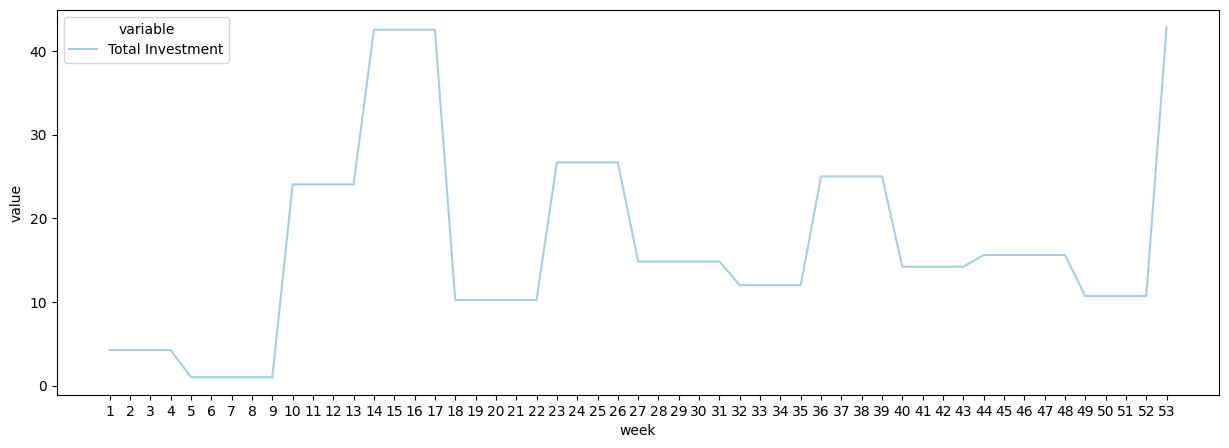

In [772]:
markinv = ['week', 'Sponsorship','TV','Digital', 'Content Marketing', 'Online marketing','Affiliates', 'SEM', 'Radio']

plt.figure(figsize=(15,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[markinv],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[['Total Investment','week']],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()

plt.figure(figsize=(18,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[['Total Investment','week']],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()



In [773]:
## Pay Date month end, 1st , 15 the and 16th
EleData2.order_date=pd.to_datetime(EleData2.order_date).dt.date
EleData2["pay_date_flag"]=EleData2['order_date'].apply(lambda x : 1 if ((x).day==15|(x).day==1|(x).day==16)|(pd.to_datetime(x).is_month_end) else 0)


In [774]:
# holiday flag
import holidays
holidays=pd.DataFrame(pd.Series(holidays.CA(prov='ON',years=[2015,2016]))).reset_index()
holidays=holidays.rename(columns={'index':'Holiday_flag'})
holidays=holidays.drop(0,axis=1)
holidays['Holiday_flag']=pd.to_datetime(holidays['Holiday_flag'], dayfirst=True)
holidays.info()
holidays['Holiday_flag']=holidays['Holiday_flag'].dt.date


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Holiday_flag  18 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 272.0 bytes


In [775]:
EleData3=pd.merge(EleData2,holidays,how='left',left_on='order_date',right_on='Holiday_flag').fillna(0)

In [776]:
## payment type
EleData3.order_payment_type= EleData3.order_payment_type.apply(lambda x : 1 if x=='cod' else 0)


In [777]:
EleData3.pay_date_flag.value_counts()

0    375247
1     10749
Name: pay_date_flag, dtype: int64

In [778]:
### Luxary vs mass product

pd.DataFrame(EleData3['product_mrp']).describe(percentiles=[.70,.80,.90]).T
EleData3['luxury'] = EleData3['product_mrp'].apply(lambda x:1 if x >= 8000.0 else 0)


In [779]:
luxury=pd.DataFrame(EleData3.groupby(['luxury','product_analytic_sub_category'])['order_item_id'].agg('count').reset_index())

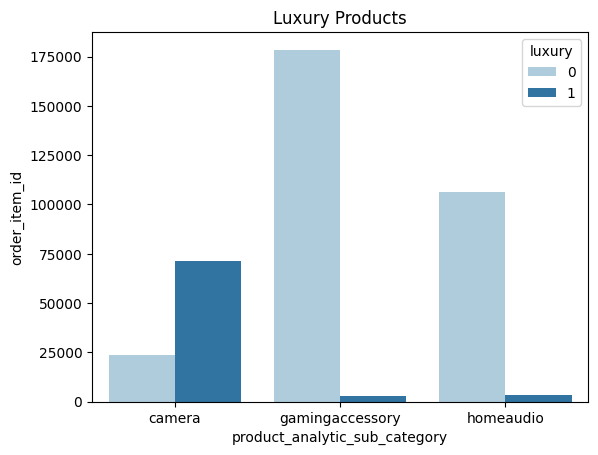

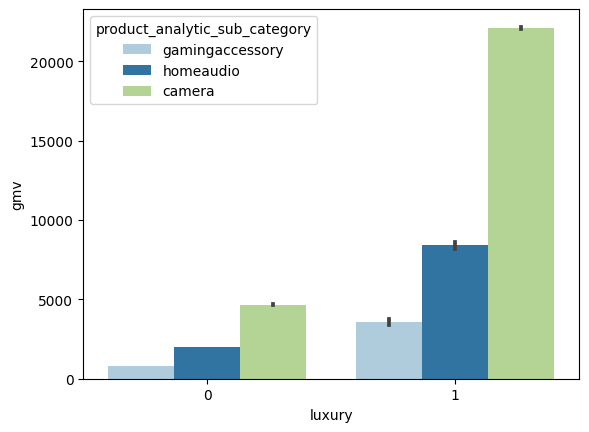

In [780]:
sns.barplot(data=luxury,x='product_analytic_sub_category',y='order_item_id',hue='luxury')
plt.title('Luxury Products')
plt.show()
sns.barplot(data=EleData3,x='luxury',y='gmv',hue='product_analytic_sub_category')
plt.show()

## Generic EDA

In [781]:
df_prod=EleData3.groupby(['product_analytic_sub_category','product_analytic_vertical'])['gmv'].sum()
df_prod=pd.DataFrame(df_prod.reset_index())
# df_prod.rename(columns={0:"count"},inplace=True)

In [782]:
df_prod

product_analytic_sub_category product_analytic_vertical           gmv
0                         camera                camcorders  1.520801e+07
1                         camera                      dslr  1.378907e+09
2                         camera           instant cameras  1.115525e+07
3                         camera             point & shoot  2.587350e+08
4                         camera           sportsandaction  1.932014e+07
5                gamingaccessory                coolingpad  3.833400e+04
6                gamingaccessory          gamecontrolmount  2.099000e+03
7                gamingaccessory                   gamepad  6.082473e+07
8                gamingaccessory        gamingaccessorykit  4.773648e+06
9                gamingaccessory             gamingadapter  1.955297e+06
10               gamingaccessory     gamingchargingstation  5.270600e+04
11               gamingaccessory             gamingheadset  3.145047e+07
12               gamingaccessory            gamingkeyboard  9.289808e+06
13               gamingaccessory          gamingmemorycard  4.299311e+06
14               gamingaccessory               gamingmouse  2.561555e+07
15               gamingaccessory            gamingmousepad  2.849630e+06
16               gamingaccessory             gamingspeaker  3.603120e+05
17               gamingaccessory       joystickgamingwheel  5.305953e+06
18               gamingaccessory          motioncontroller  3.803175e+06
19               gamingaccessory       tvoutcableaccessory  2.575559e+06
20                     homeaudio                   boombox  7.732093e+06
21                     homeaudio              djcontroller  2.335536e+06
22                     homeaudio                      dock  1.085407e+06
23                     homeaudio            dockingstation  3.776040e+05
24                     homeaudio                   fmradio  1.871460e+07
25                     homeaudio                hifisystem  5.323643e+06
26                     homeaudio          homeaudiospeaker  1.938923e+08
27                     homeaudio             karaokeplayer  2.350000e+04
28                     homeaudio                  slingbox  2.049500e+04
29                     homeaudio                soundmixer  6.088680e+05
30                     homeaudio             voicerecorder  1.048322e+07

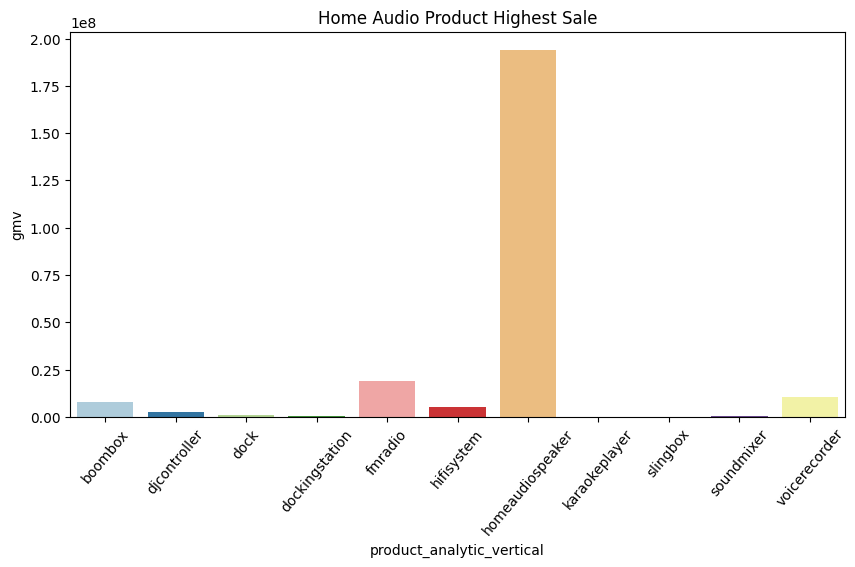

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'coolingpad'),
  Text(1, 0, 'gamecontrolmount'),
  Text(2, 0, 'gamepad'),
  Text(3, 0, 'gamingaccessorykit'),
  Text(4, 0, 'gamingadapter'),
  Text(5, 0, 'gamingchargingstation'),
  Text(6, 0, 'gamingheadset'),
  Text(7, 0, 'gamingkeyboard'),
  Text(8, 0, 'gamingmemorycard'),
  Text(9, 0, 'gamingmouse'),
  Text(10, 0, 'gamingmousepad'),
  Text(11, 0, 'gamingspeaker'),
  Text(12, 0, 'joystickgamingwheel'),
  Text(13, 0, 'motioncontroller'),
  Text(14, 0, 'tvoutcableaccessory')])

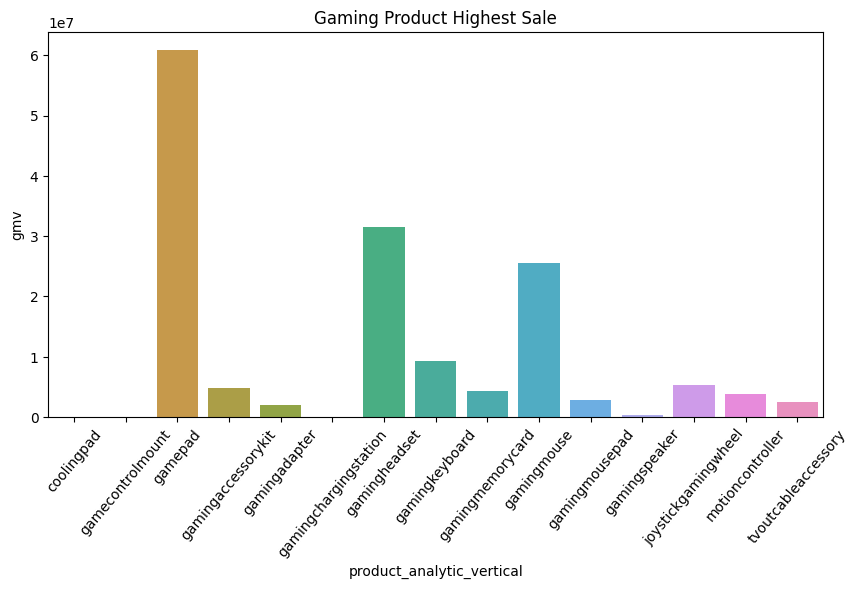

In [783]:
# df_prod.sort_values('product_analytic_sub_category')
plt.figure(figsize=(10,5))
sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='camera'] , x='product_analytic_vertical' ,y='gmv')
plt.title("Camera Product Highest Sale")
plt.show()

plt.figure(figsize=(10,5))

sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='homeaudio'] , x='product_analytic_vertical',y='gmv' )
plt.title("Home Audio Product Highest Sale")
plt.xticks(rotation = 50)
plt.show()

plt.figure(figsize=(10,5))

sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='gamingaccessory'] , x='product_analytic_vertical',y='gmv')
plt.title("Gaming Product Highest Sale")
plt.xticks(rotation = 50)
# plt.show()

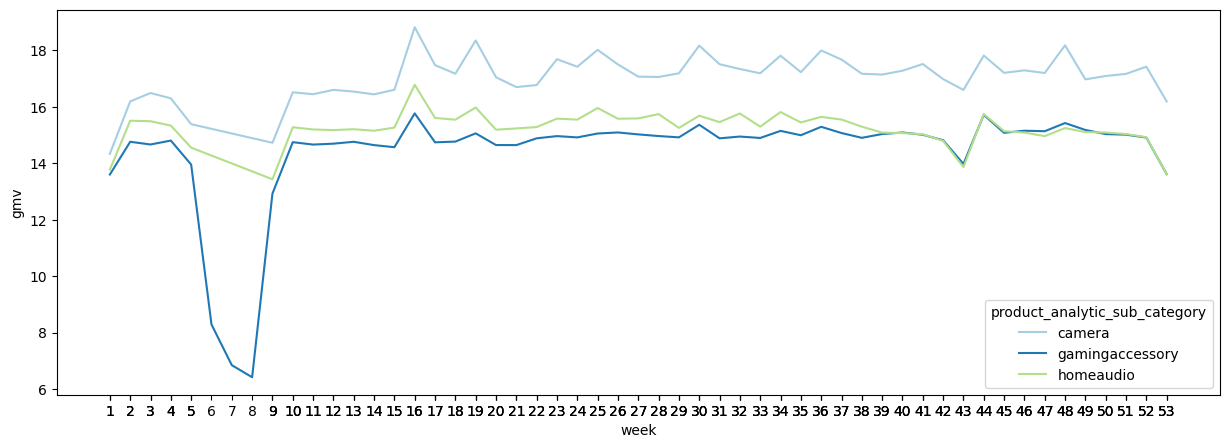

In [784]:
### Week on Week sales of product category

wowgmv=EleData3.groupby(['week','product_analytic_sub_category'])['gmv'].sum().reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x=wowgmv.week,y=nm.log(wowgmv.gmv),hue=wowgmv.product_analytic_sub_category)
plt.xticks(wowgmv['week'])
plt.show()


In [785]:

## sales impact wow
plt.figure(figsize=(15,6))
sns.barplot(y=EleData3['gmv'],x=pd.cut(EleData3['discount_per'],bins=6))
plt.show()



# Data Aggregation and analysis

Camera Analysis

In [786]:
##
camera=EleData3[EleData3.product_analytic_sub_category=='camera']
# camera.discount_per

In [787]:
camera.columns


Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived', 'week', 'listing_price',
       'discount_per', 'sale_date', 'Stock_Index', 'NPS', 'Year',
       'pay_date_flag', 'Holiday_flag', 'luxury'],
      dtype='object')

In [788]:
cam_dummies = pd.get_dummies(camera['product_analytic_vertical'])
camera=pd.concat([camera,cam_dummies],axis=1)


In [789]:
camera.drop(["product_analytic_sub_category","product_analytic_category"],1,inplace=True)

In [790]:
num
num.append('discount_per')
num.append('listing_price')

In [791]:
camera[num].describe()

gmv         units           sla    product_mrp  \
count   94706.000000  94706.000000  94706.000000   94706.000000   
mean    17774.221234      1.011816      4.694370   27114.656505   
std     11423.619524      0.143116      2.399058   16922.490081   
min         0.000000      1.000000      0.000000     599.000000   
25%      6599.000000      1.000000      3.000000    8000.000000   
50%     19490.000000      1.000000      4.000000   34950.000000   
75%     24990.000000      1.000000      6.000000   40000.000000   
max    226947.000000      9.000000     35.000000  280000.000000   

       product_procurement_sla  discount_per  listing_price  
count             94706.000000  94706.000000   94706.000000  
mean                  2.777754      0.321185   17615.696167  
std                   2.490936      0.133102   11240.653746  
min                  -1.000000      0.000000       0.000000  
25%                   1.000000      0.210000    6552.000000  
50%                   3.000000      0.350000   19490.000000  
75%                   4.000000      0.430000   24990.000000  
max                  15.000000      1.000000  226947.000000

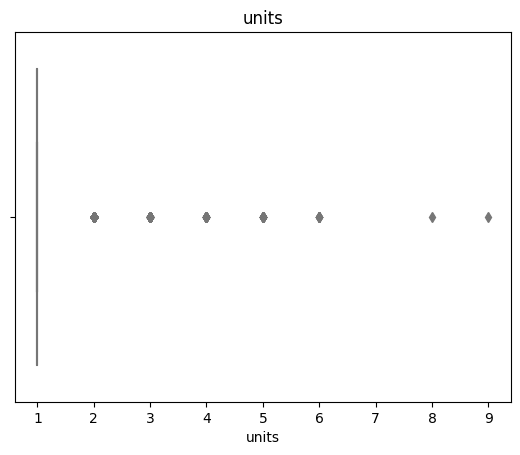

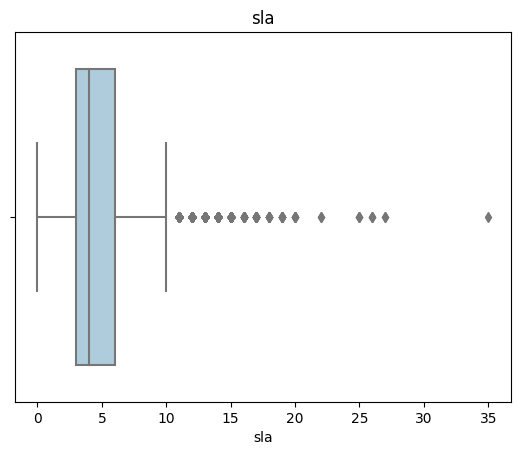

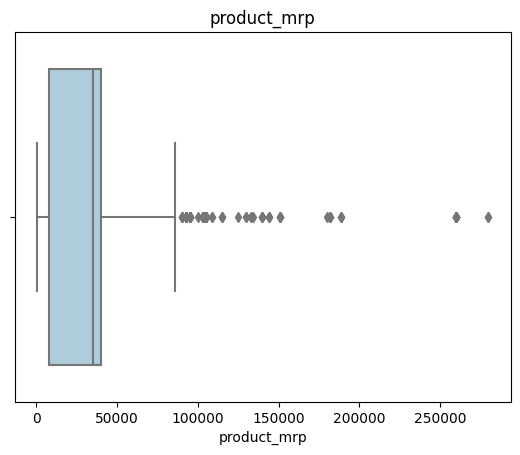

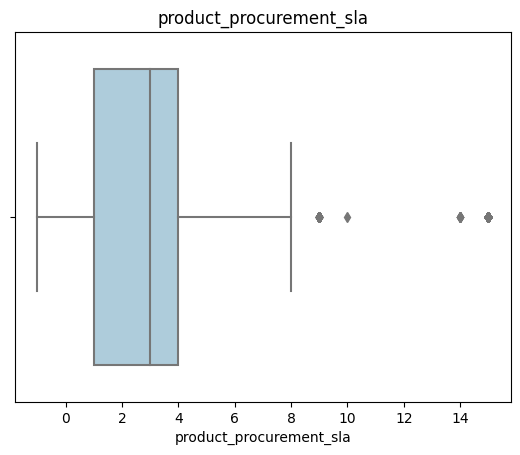

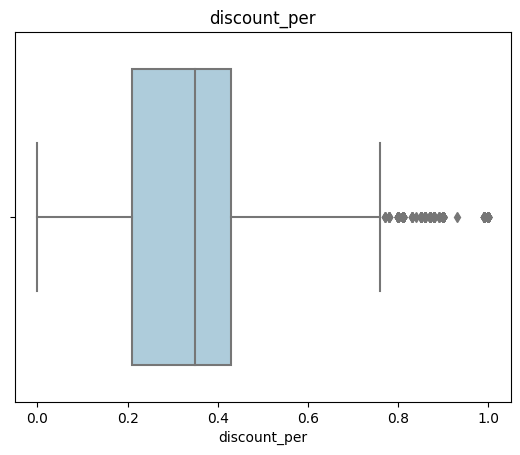

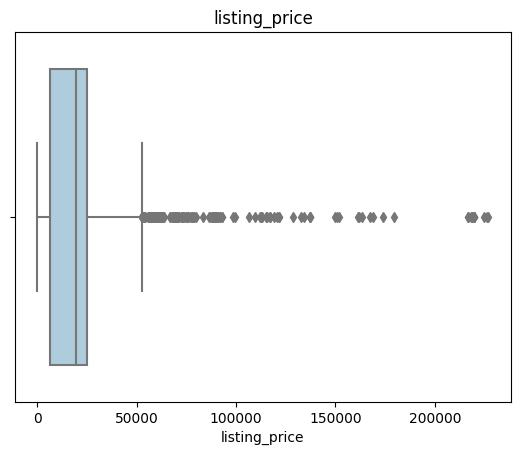

In [792]:
for i in num:
  sns.boxplot(x=camera[i])
  plt.title(i)
  plt.show()

In [793]:
# Product mrp , gmv , listing price is fine and expected but we can replace sla , procurement sla

In [794]:
# q1=camera['gmv'].quantile(0.25)
# q3=camera['gmv'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# camera[camera['gmv']>72373.5]
# camera.loc[camera['gmv']>up,'gmv']=up
# camera.loc[camera['gmv']<lw,'gmv']=lw

In [795]:
# q1=camera['listing_price'].quantile(0.25)
# q3=camera['listing_price'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# # camera[camera['listing_price']>72373.5]
# camera.loc[camera['listing_price']>up,'listing_price']=up
# camera.loc[camera['listing_price']<lw,'listing_price']=lw

In [796]:
camera['product_mrp'].describe()

count     94706.000000
mean      27114.656505
std       16922.490081
min         599.000000
25%        8000.000000
50%       34950.000000
75%       40000.000000
max      280000.000000
Name: product_mrp, dtype: float64

In [797]:
# q1=camera['discount_per'].quantile(0.25)
# q3=camera['discount_per'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# camera[camera['discount_per']>1.39]
# camera.loc[camera['discount_per']>up,'discount_per']=up
# camera.loc[camera['discount_per']<lw,'discount_per']=lw


q1=camera['sla'].quantile(0.25)
q3=camera['sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera.loc[camera['sla']>up,'sla']=up
camera.loc[camera['sla']<lw,'sla']=lw

q1=camera['product_procurement_sla'].quantile(0.25)
q3=camera['product_procurement_sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera.loc[camera['product_procurement_sla']>up,'product_procurement_sla']=up
camera.loc[camera['product_procurement_sla']<lw,'product_procurement_sla']=lw

-1.5   10.5
-3.5   8.5


In [798]:
camera.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_vertical', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived', 'week',
       'listing_price', 'discount_per', 'sale_date', 'Stock_Index', 'NPS',
       'Year', 'pay_date_flag', 'Holiday_flag', 'luxury', 'camcorders', 'dslr',
       'instant cameras', 'point & shoot', 'sportsandaction'],
      dtype='object')

In [799]:
camera_wk=camera.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique","dslr":"sum","point & shoot":"sum","luxury":"sum",
                                        'camcorders':"sum",'instant cameras':"sum", 'sportsandaction':"sum"}).round(2)

camera_wk=pd.merge(camera_wk,weekly_kpis,on='week')

camera_wk.rename(columns={"sale_date":"num_of_sales"},inplace=True)

In [800]:
camera_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day'],1,inplace=True)

In [801]:
camera_wk.order_payment_type.value_counts()
camera_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
camera_wk["cod_per"]=camera_wk["order_payment_cod"]/camera_wk["order_count"]
camera_wk.drop("order_payment_cod",1,inplace=True)
camera_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)


In [802]:
camera_wk.num_of_sales=camera_wk.num_of_sales-1
# camera_wk.head()

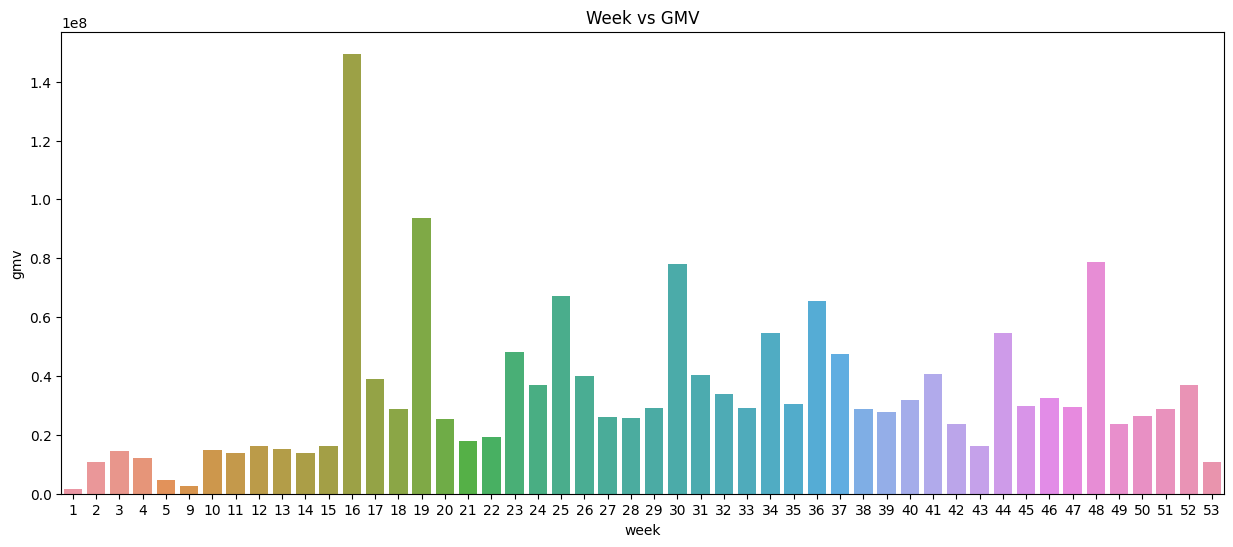

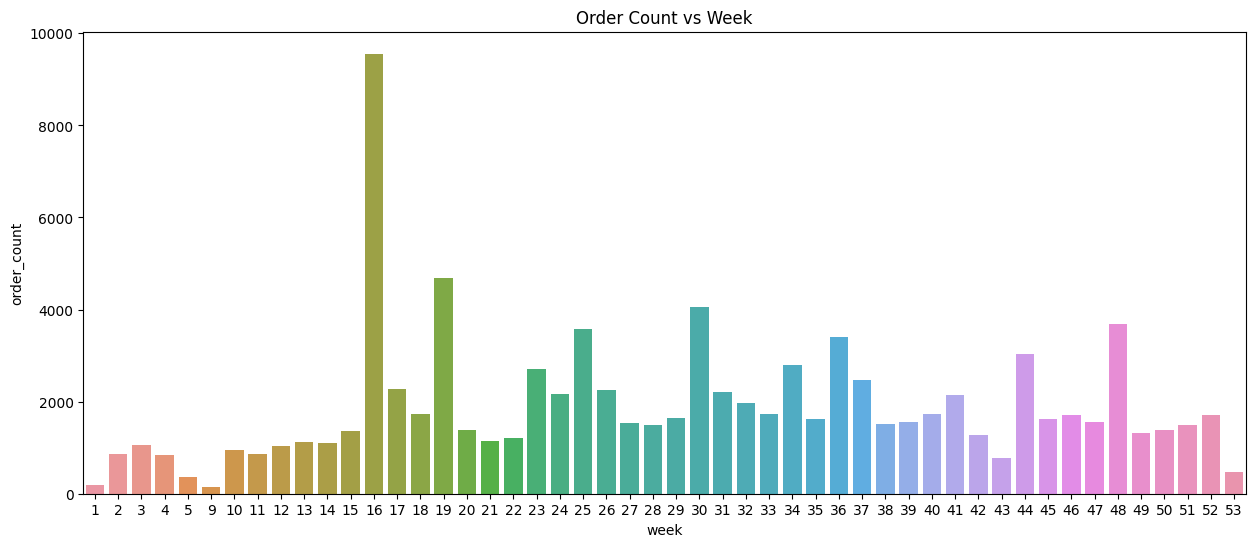

In [803]:


plt.figure(figsize=(15,6))
sns.barplot(x=camera_wk['week'],y=camera_wk['gmv'])
plt.title("Week vs GMV")
plt.show()
# On an avverage 3 sales a week giving better result


plt.figure(figsize=(15,6))
sns.barplot(x=camera_wk['week'],y=camera_wk['order_count'])
plt.title("Order Count vs Week")
plt.show()

## On week 16 , 19, 25, 30,36,44 and 48 sales was good

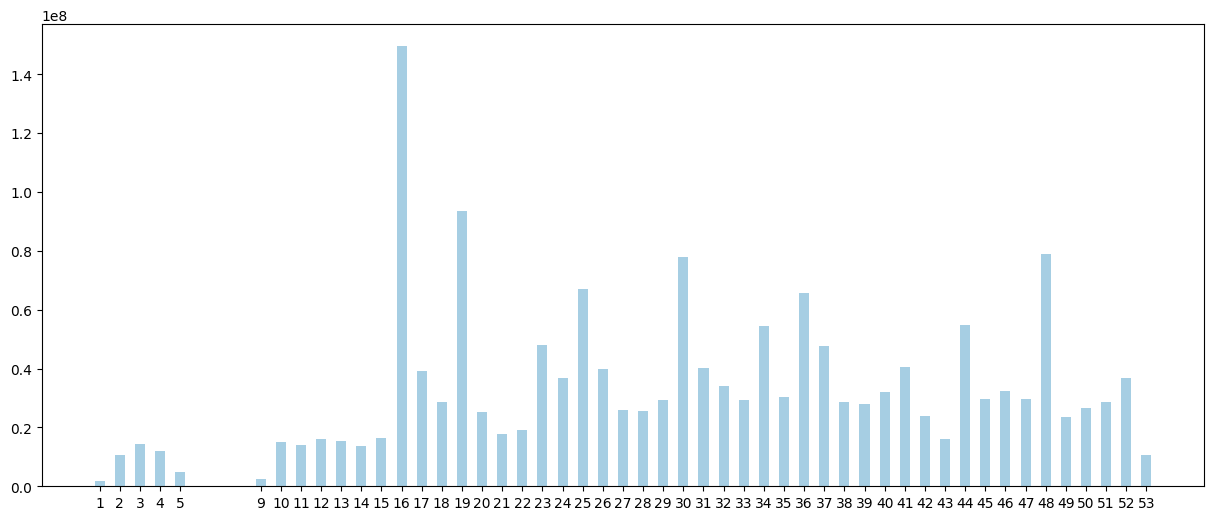

In [804]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=camera_wk['week'],height=camera_wk['num_of_sales'],width=width)
plt.xticks(camera_wk['week'])
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=camera_wk['week'],height=camera_wk['gmv'],width=width)
plt.xticks(camera_wk['week'])
plt.show()

##  week 16th had 3 days of sale and it improved its gmv, similarly for week 48, 19 and 30
# But in Week 26 27 5 days were sale days bt id didnt improve the GMV much

# Week 16, 19 , 30 , 34,36 and 48 : has impact because has good gmv and number of sales

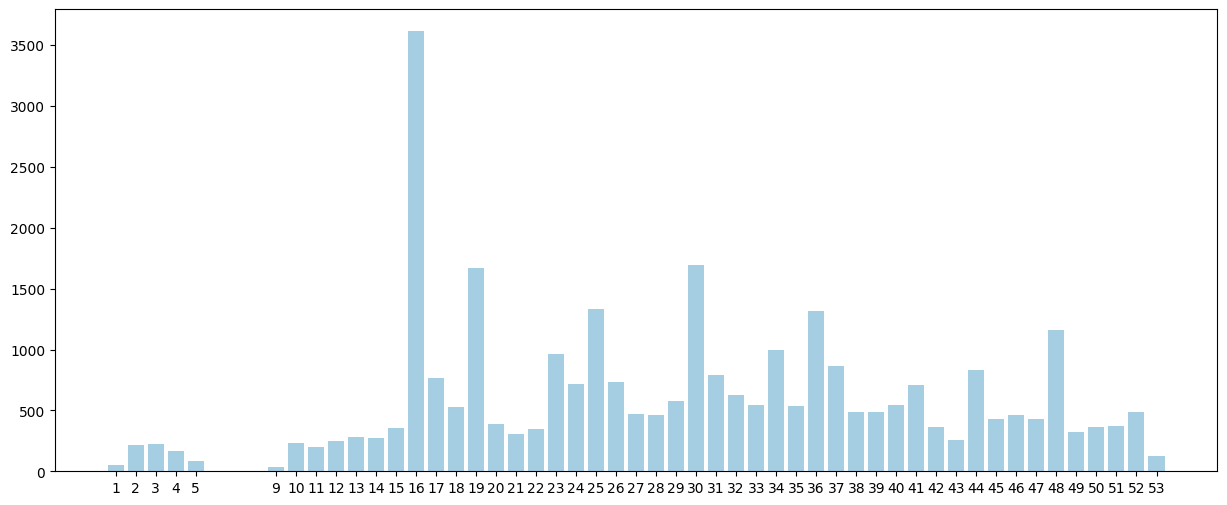

In [805]:
plt.figure(figsize=(15,6))
plt.bar(x=camera_wk['week'],height=camera_wk['discount_per'])
plt.xticks(camera_wk['week'])
plt.show()



### Now week 25th may not have any sale but disocunts were given for most items and hence GMV was improved which makes sense

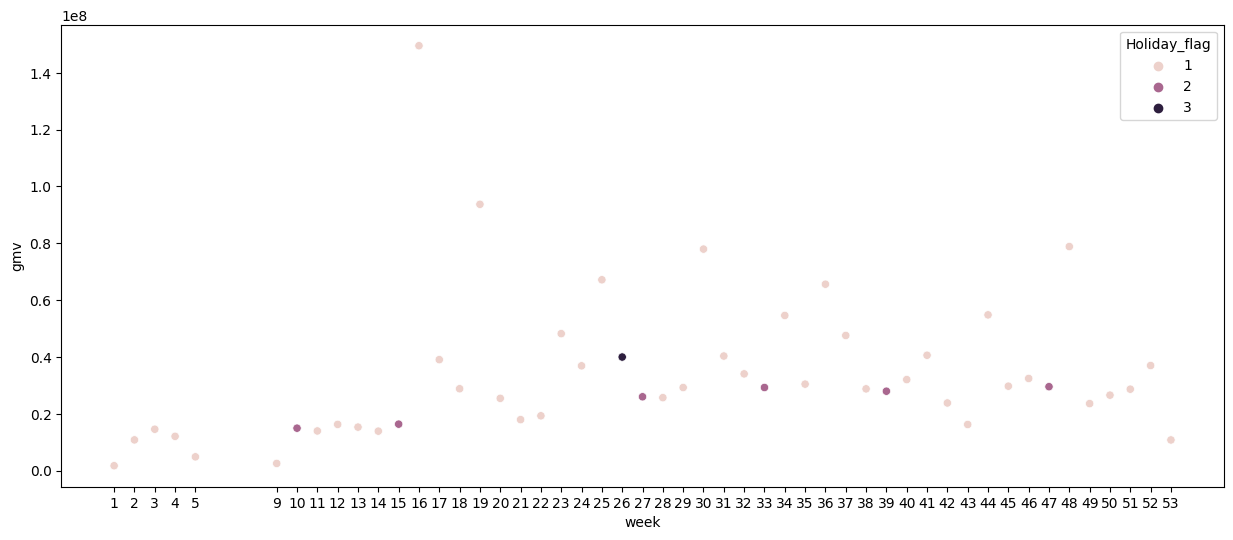

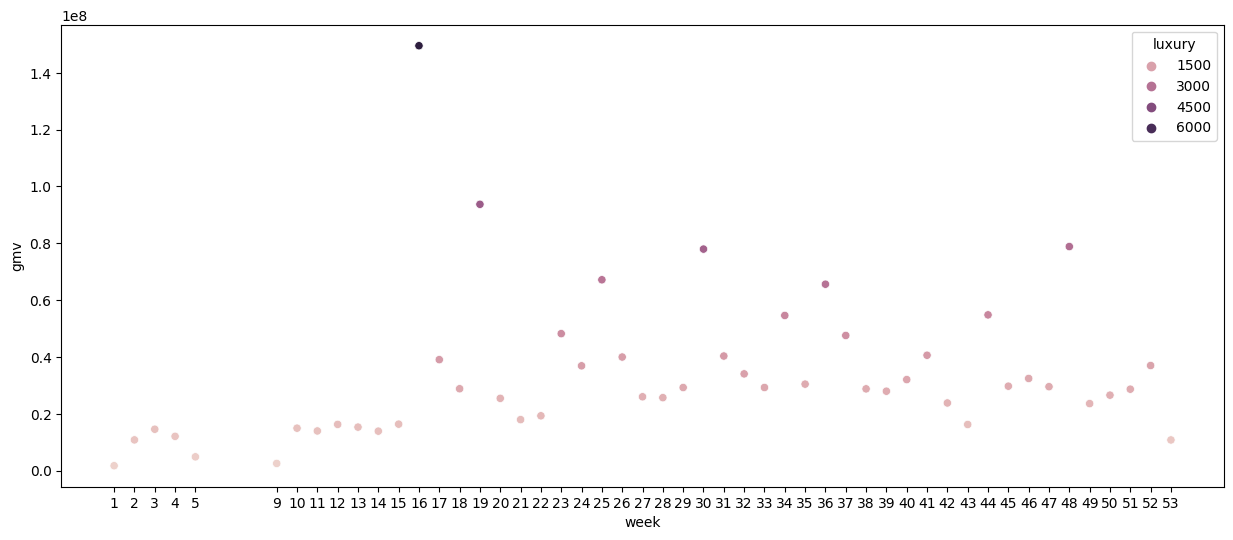

In [806]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=camera_wk['week'],y=camera_wk['gmv'],hue=camera_wk['Holiday_flag'])
plt.xticks(camera_wk['week'])
plt.show()

plt.figure(figsize=(15,6))
sns.scatterplot(x=camera_wk['week'],y=camera_wk['gmv'],hue=camera_wk['luxury'])
plt.xticks(camera_wk['week'])
plt.show()

# Week 26, 15, 27 33 39 47


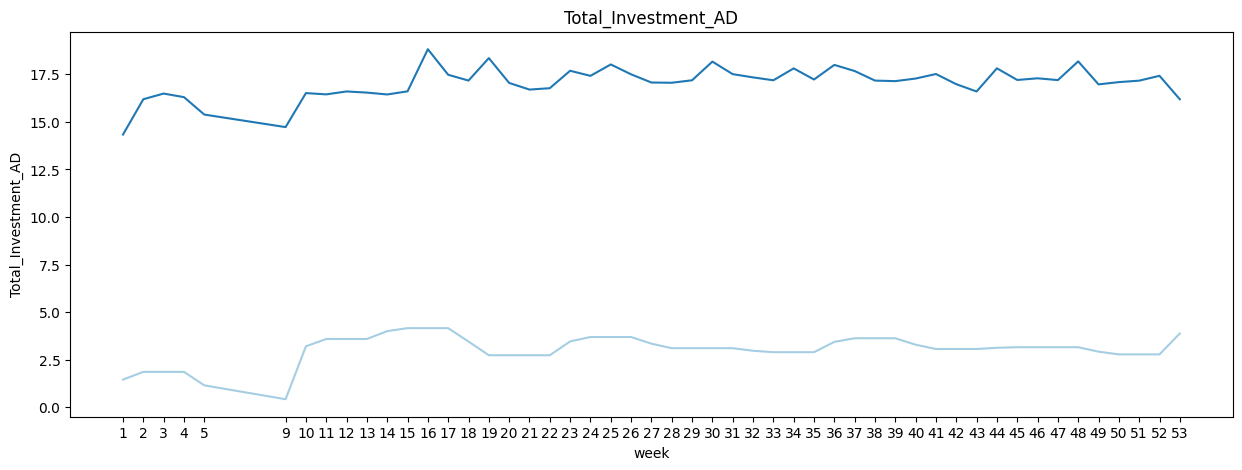

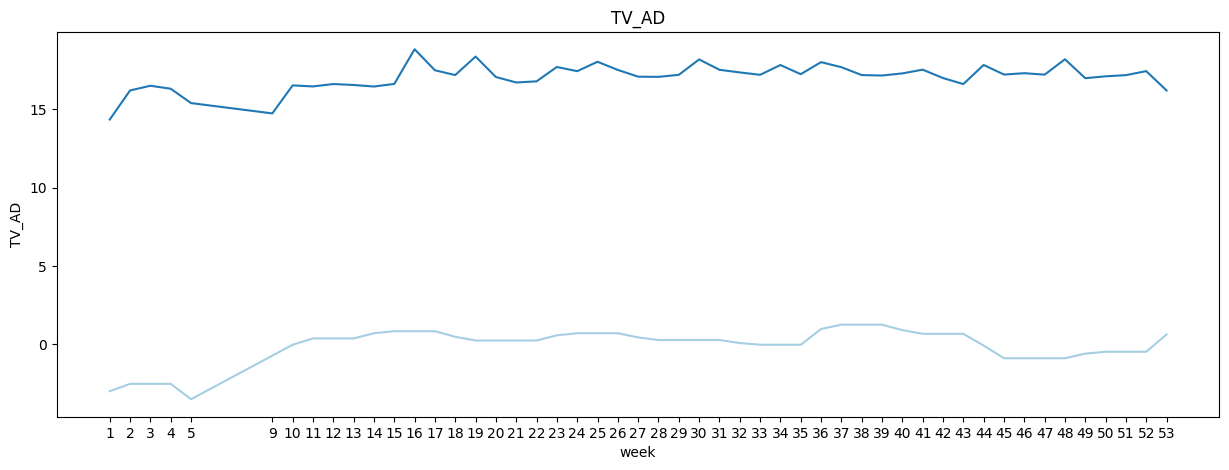

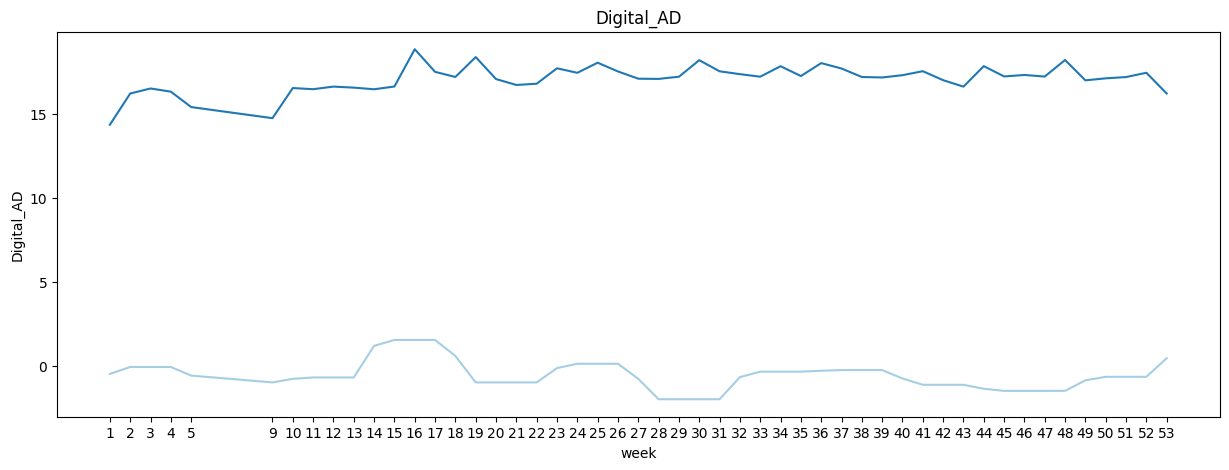

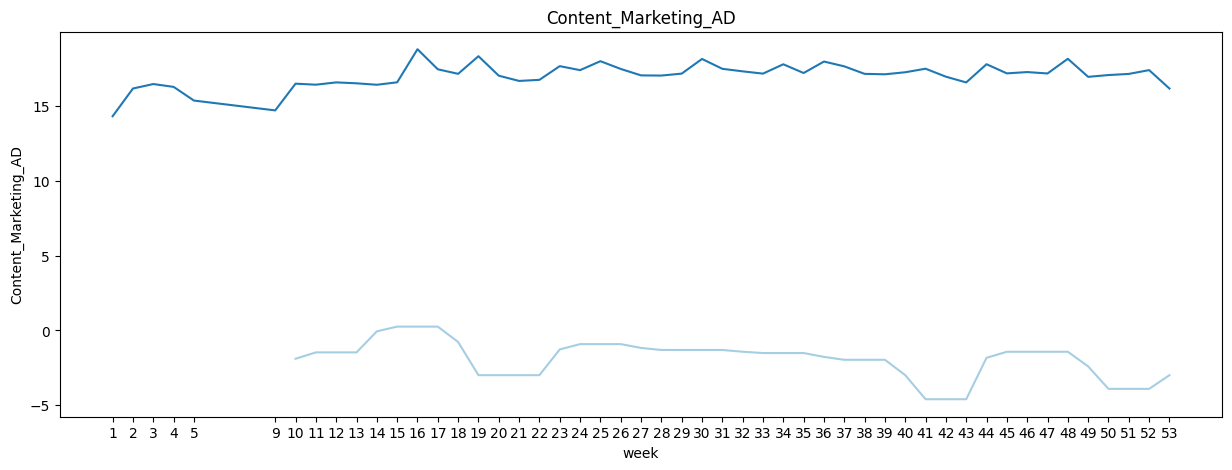

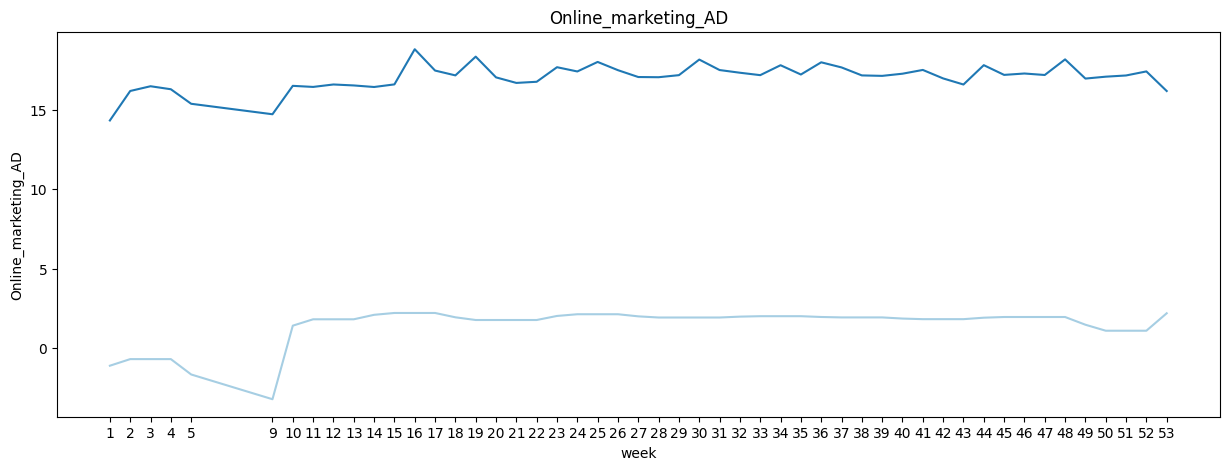

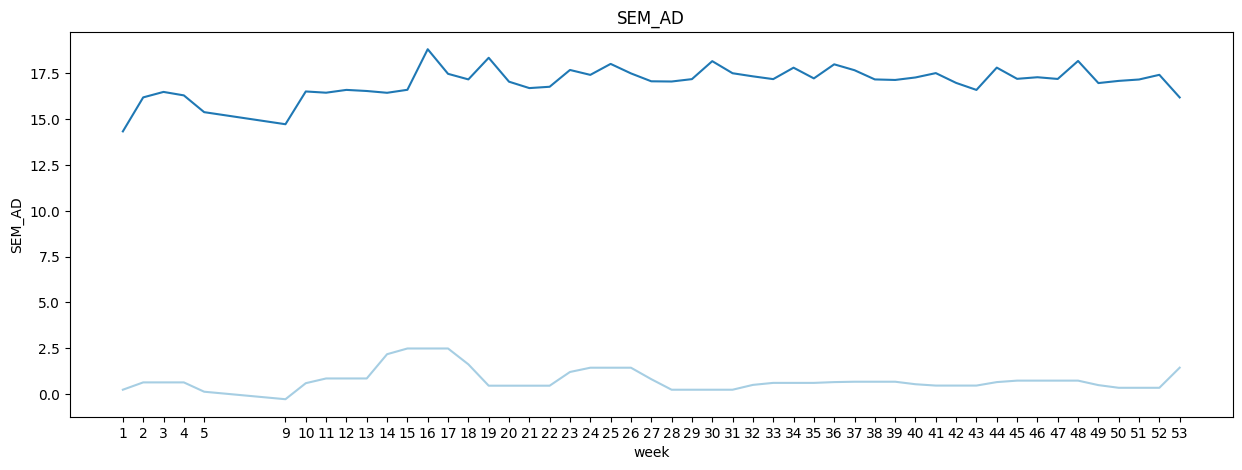

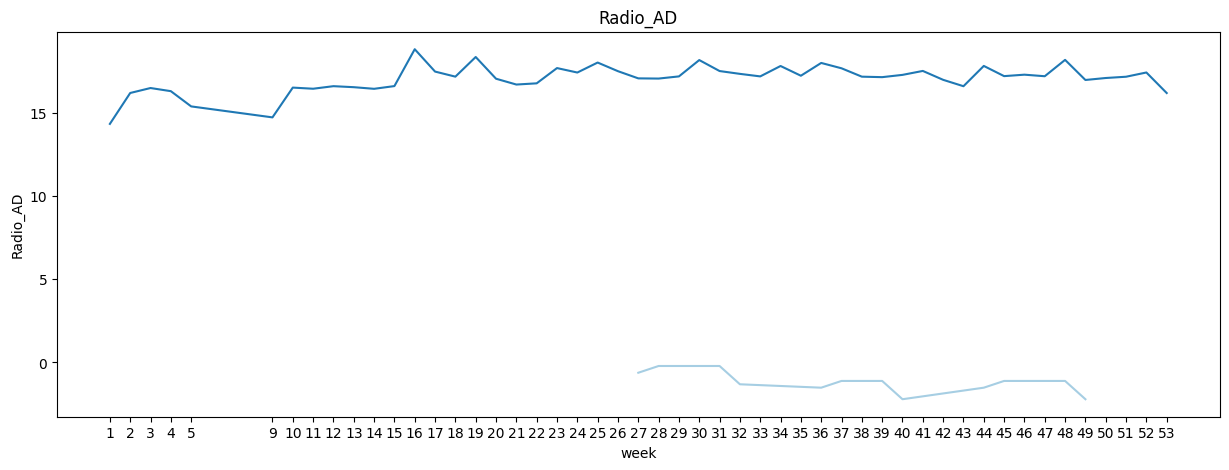

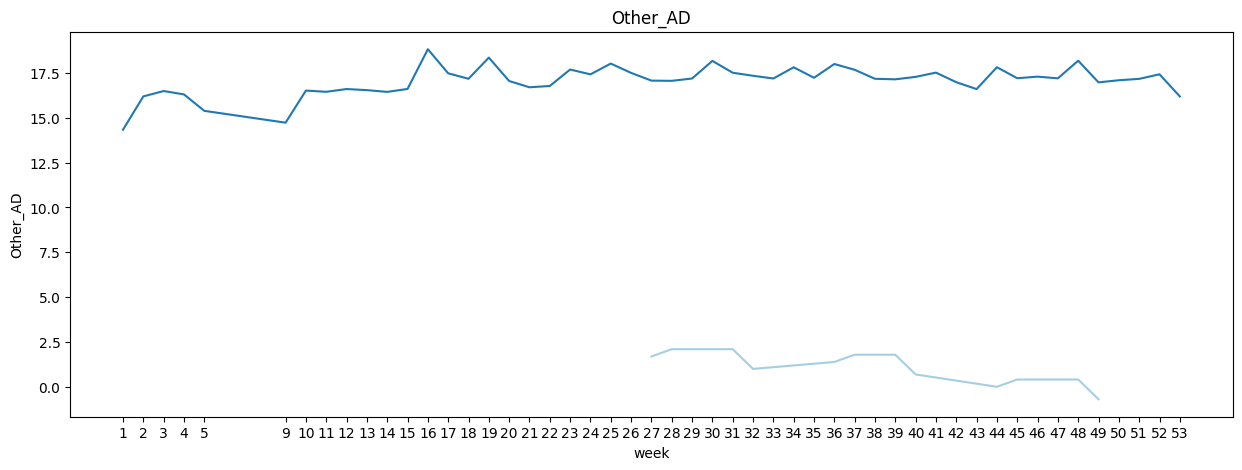

In [807]:
camera.columns
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=camera_wk['week'],y=nm.log(camera_wk[i]))
    sns.lineplot(x=camera_wk['week'],y=nm.log(camera_wk['gmv']))
    plt.xticks(camera_wk['week'])
    x=x+1
    plt.show()



# tv , online marketing , affliates , radio and other doesnt seems impacting the sales much

In [808]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c',"luxury"]

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,3,x)
  plt.title(i)
  sns.barplot(y=camera_wk['gmv'],x=pd.cut(camera_wk[i],bins=4))
  plt.xticks(rotation=45)
  x=x+1

## total rain , stock index looks no pattern

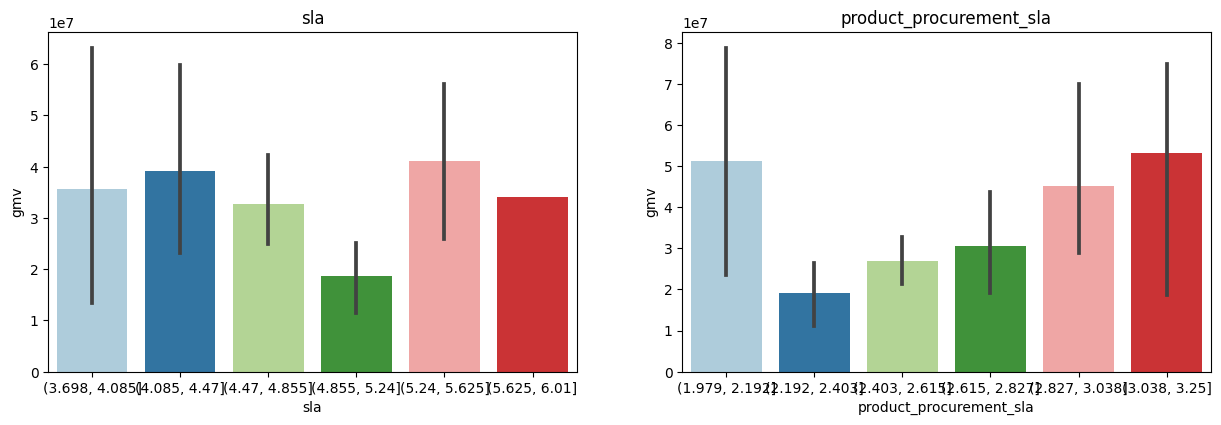

In [809]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=camera_wk['gmv'],x=pd.cut(camera_wk[i],bins=6))
  x=x+1

# product procurement sla has a pattern , less days probably are cheap products and getting sold out at high number and then high priced product
# taking high procurement time and high gmv
# but doesnt look like a reason of impact

In [810]:
camera_wk['sales_per']=(camera_wk['num_of_sales'])/7
camera_wk.drop('num_of_sales',1,inplace=True)

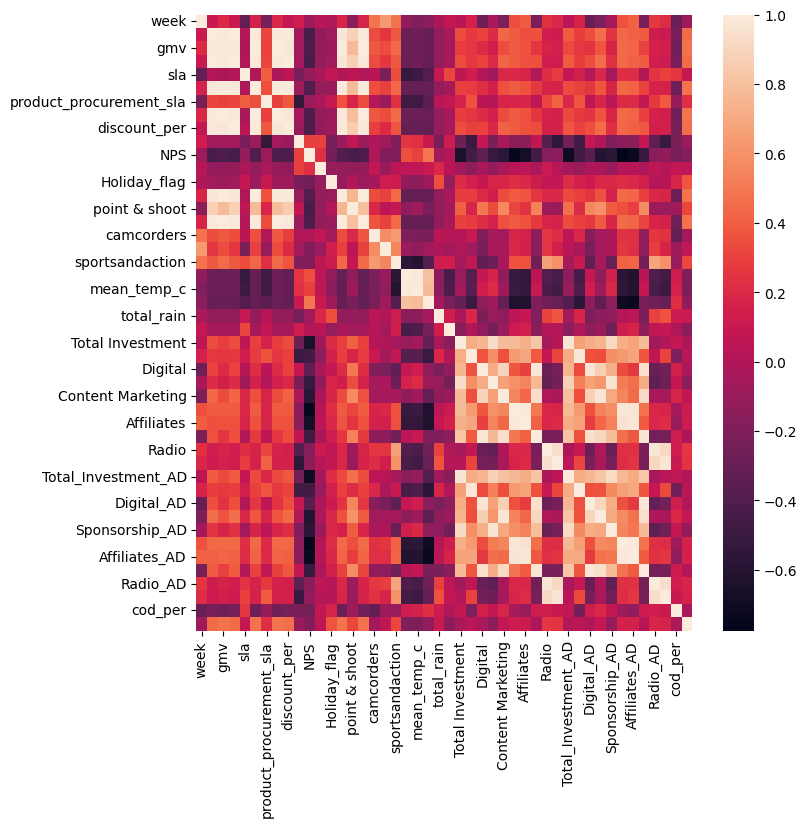

In [811]:
plt.figure(figsize=(8,8))
sns.heatmap(camera_wk.corr())
plt.show()
# camera

In [812]:
camera_wk.corr()[(camera_wk.corr()>0.8)|(camera_wk.corr()<-0.8)]


week  order_count       gmv     units  sla  \
week                      1.0          NaN       NaN       NaN  NaN   
order_count               NaN     1.000000  0.983304  0.999869  NaN   
gmv                       NaN     0.983304  1.000000  0.984052  NaN   
units                     NaN     0.999869  0.984052  1.000000  NaN   
sla                       NaN          NaN       NaN       NaN  1.0   
product_mrp               NaN     0.985250  0.997433  0.986146  NaN   
product_procurement_sla   NaN          NaN       NaN       NaN  NaN   
listing_price             NaN     0.984259  0.999892  0.984829  NaN   
discount_per              NaN     0.992702  0.976280  0.993261  NaN   
Stock_Index               NaN          NaN       NaN       NaN  NaN   
NPS                       NaN          NaN       NaN       NaN  NaN   
pay_day_in_wk             NaN          NaN       NaN       NaN  NaN   
Holiday_flag              NaN          NaN       NaN       NaN  NaN   
dslr                      NaN     0.976417  0.993619  0.977697  NaN   
point & shoot             NaN     0.876009       NaN  0.873064  NaN   
luxury                    NaN     0.988205  0.997236  0.989088  NaN   
camcorders                NaN          NaN       NaN       NaN  NaN   
instant cameras           NaN          NaN       NaN       NaN  NaN   
sportsandaction           NaN          NaN       NaN       NaN  NaN   
max_temp_c                NaN          NaN       NaN       NaN  NaN   
mean_temp_c               NaN          NaN       NaN       NaN  NaN   
cool_deg_c                NaN          NaN       NaN       NaN  NaN   
total_rain                NaN          NaN       NaN       NaN  NaN   
total_snow                NaN          NaN       NaN       NaN  NaN   
Total Investment          NaN          NaN       NaN       NaN  NaN   
TV                        NaN          NaN       NaN       NaN  NaN   
Digital                   NaN          NaN       NaN       NaN  NaN   
Sponsorship               NaN          NaN       NaN       NaN  NaN   
Content Marketing         NaN          NaN       NaN       NaN  NaN   
Online marketing          NaN          NaN       NaN       NaN  NaN   
Affiliates                NaN          NaN       NaN       NaN  NaN   
SEM                       NaN          NaN       NaN       NaN  NaN   
Radio                     NaN          NaN       NaN       NaN  NaN   
Other                     NaN          NaN       NaN       NaN  NaN   
Total_Investment_AD       NaN          NaN       NaN       NaN  NaN   
TV_AD                     NaN          NaN       NaN       NaN  NaN   
Digital_AD                NaN          NaN       NaN       NaN  NaN   
Content_Marketing_AD      NaN          NaN       NaN       NaN  NaN   
Sponsorship_AD            NaN          NaN       NaN       NaN  NaN   
Online_marketing_AD       NaN          NaN       NaN       NaN  NaN   
Affiliates_AD             NaN          NaN       NaN       NaN  NaN   
SEM_AD                    NaN          NaN       NaN       NaN  NaN   
Radio_AD                  NaN          NaN       NaN       NaN  NaN   
Other_AD                  NaN          NaN       NaN       NaN  NaN   
cod_per                   NaN          NaN       NaN       NaN  NaN   
sales_per                 NaN          NaN       NaN       NaN  NaN   

                         product_mrp  product_procurement_sla  listing_price  \
week                             NaN                      NaN            NaN   
order_count                 0.985250                      NaN       0.984259   
gmv                         0.997433                      NaN       0.999892   
units                       0.986146                      NaN       0.984829   
sla                              NaN                      NaN            NaN   
product_mrp                 1.000000                      NaN       0.997090   
product_procurement_sla          NaN                      1.0            NaN   
listing_price               0.997090           

In [813]:
camera_wk.columns
camera_wk.drop([ 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates',
       'SEM', 'Radio', 'Other'],1,inplace=True)

In [814]:
camera_wk.drop(['NPS','product_procurement_sla','listing_price','Digital_AD','Other_AD','SEM_AD','max_temp_c'],1,inplace=True)

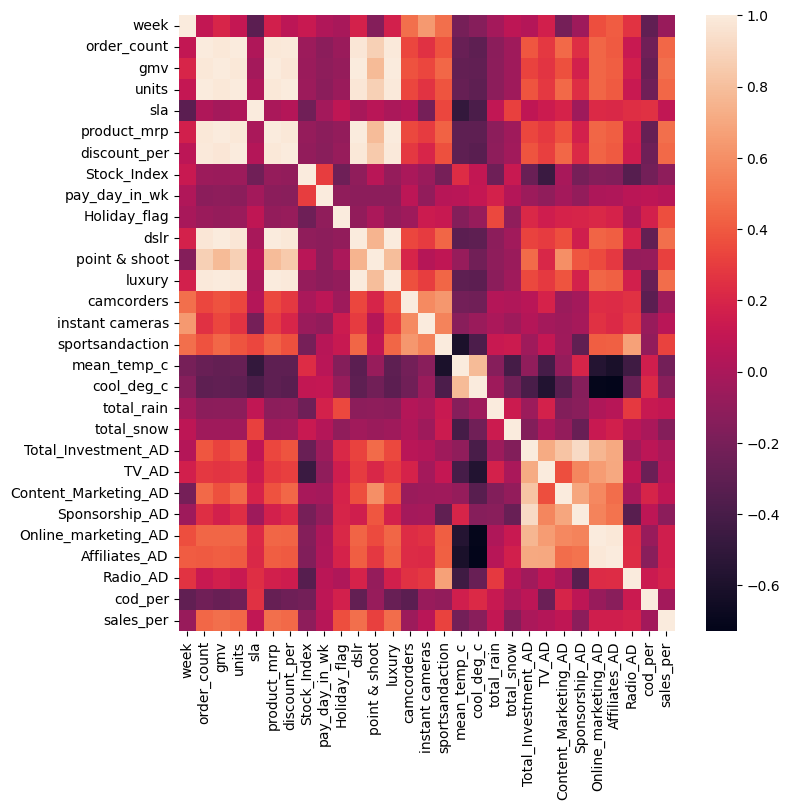

In [815]:
plt.figure(figsize=(8,8))
sns.heatmap(camera_wk.corr())
plt.show()
# camera

In [816]:
camera_wk.drop(['cool_deg_c','cod_per'],1,inplace=True)
camera_wk.drop(['total_snow'],1,inplace=True)

In [817]:
revenue_avg=pd.DataFrame(camera.groupby('product_analytic_vertical').agg(nums=('order_item_id', 'count'),rev=('gmv', nm.sum))).reset_index()

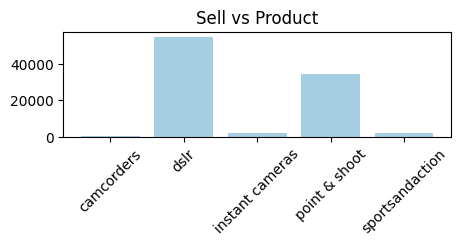

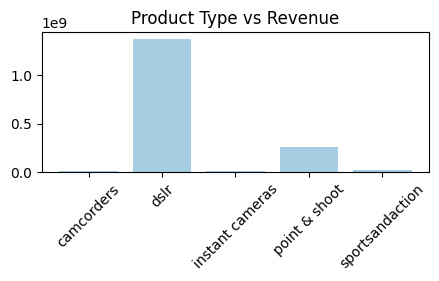

In [818]:
revenue_avg['avg']=revenue_avg.rev/revenue_avg.nums
plt.figure(figsize=(5,3))
# fig,ax0,ax1 = plt.subplots(2,1)
plt.subplot(2, 1, 2)

plt.bar(x=revenue_avg.product_analytic_vertical,height=revenue_avg.nums)
plt.title("Sell vs Product")
plt.xticks(rotation=45)

plt.show()
plt.figure(figsize=(5,4))
plt.subplot(2, 1, 1)
plt.bar(x=revenue_avg.product_analytic_vertical,height=revenue_avg.rev)
plt.xticks(rotation=45)
plt.title("Product Type vs Revenue")

plt.show()




In [819]:
# Now for each category :
# Product : Point & shoot , Camorders , dslt and sportsandaction, Luxury
# Customer : Stock_Index , pay_day,sla and holiday_flag
# Pricing : discount_per, gmv,sales_per
# Ads : Total , TV, Content,Sponsorship, Online, Radio
# Weather : Mean temp and rain

Camera Modeling


In [820]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [821]:
camera_wk.head()

week  order_count         gmv  units   sla  product_mrp  discount_per  \
0     1          183   1683100.0    187  4.97      2075447         50.14   
1     2          866  10776027.0    871  4.73     13665461        218.17   
2     3         1053  14527023.0   1065  4.30     18871251        223.39   
3     4          849  12022872.0    856  4.31     15082885        165.17   
4     5          373   4812133.0    380  4.14      6130674         82.01   

   Stock_Index  pay_day_in_wk  Holiday_flag  ...  mean_temp_c  total_rain  \
0       1177.0              0             1  ...    19.800000    1.433333   
1       1177.0              0             1  ...    20.483333    3.283333   
2       1177.0              0             1  ...    22.883333    1.100000   
3       1177.0              0             1  ...    23.716667    0.771429   
4       1177.0              1             1  ...    23.940000    5.560000   

   Total_Investment_AD  TV_AD  Content_Marketing_AD  Sponsorship_AD  \
0                 4.27   0.05                   0.0            1.85   
1                 6.40   0.08                   0.0            2.78   
2                 6.40   0.08                   0.0            2.78   
3                 6.40   0.08                   0.0            2.78   
4                 3.15   0.03                   0.0            1.14   

   Online_marketing_AD  Affiliates_AD  Radio_AD  sales_per  
0                 0.33           0.14       0.0   0.000000  
1                 0.50           0.21       0.0   0.000000  
2                 0.50           0.21       0.0   0.285714  
3                 0.50           0.21       0.0   0.000000  
4                 0.19           0.08       0.0   0.000000  

[5 rows x 26 columns]

In [822]:
camera_wk.drop(['units','order_count','product_mrp','week'],1,inplace=True)


In [823]:
## dropping other variables who doesnt look like havong an impact from analysis done above
# total rain, nps,tv , online marketing , affliates , radio and other ads doesnt seems impacting the sales much
# camera_wk.drop(['Other_AD','total_rain','listing_price','Others'],1,inplace=True)

In [824]:
# camera_wk.drop('Holiday_flag',1,inplace=True)
# camera_wk.drop('cool_deg_c',1,inplace=True)

In [825]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(camera_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [826]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train

In [827]:
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train

In [828]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [829]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [830]:
## as variables are more than observations check RFE method
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=12, step=1)

In [831]:
selector.fit(X_train, y_train)

# print(selector.support_)
# print(selector.ranking_)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['sla', 'discount_per', 'pay_day_in_wk', 'dslr', 'point & shoot',
       'luxury', 'camcorders', 'total_rain', 'Total_Investment_AD',
       'Content_Marketing_AD', 'Online_marketing_AD', 'sales_per'],
      dtype='object')

In [832]:
list(features)

['sla',
 'discount_per',
 'pay_day_in_wk',
 'dslr',
 'point & shoot',
 'luxury',
 'camcorders',
 'total_rain',
 'Total_Investment_AD',
 'Content_Marketing_AD',
 'Online_marketing_AD',
 'sales_per']

In [833]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3994.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           8.27e-34
Time:                        17:22:06   Log-Likelihood:                 141.74
No. Observations:                  35   AIC:                            -257.5
Df Residuals:                      22   BIC:                            -237.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0126 

Features      VIF
3                   dslr  4780.12
5                 luxury  4534.56
1           discount_per   413.32
4          point & shoot   113.56
10   Online_marketing_AD    28.61
8    Total_Investment_AD    23.91
9   Content_Marketing_AD    11.57
0                    sla     8.52
6             camcorders     7.83
7             total_rain     3.56
11             sales_per     2.51
2          pay_day_in_wk     2.17

In [834]:
features=features.drop('Total_Investment_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4136.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           3.59e-35
Time:                        17:22:07   Log-Likelihood:                 140.05
No. Observations:                  35   AIC:                            -256.1
Df Residuals:                      23   BIC:                            -237.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0137 

Features      VIF
3                   dslr  4768.58
5                 luxury  4509.28
1           discount_per   409.54
4          point & shoot   113.40
9    Online_marketing_AD    19.51
0                    sla     8.49
6             camcorders     7.83
8   Content_Marketing_AD     6.44
7             total_rain     3.51
10             sales_per     2.43
2          pay_day_in_wk     1.92

In [835]:

features=features.drop('pay_day_in_wk')
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4728.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           5.28e-37
Time:                        17:22:07   Log-Likelihood:                 139.98
No. Observations:                  35   AIC:                            -258.0
Df Residuals:                      24   BIC:                            -240.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0136 

Features      VIF
2                  dslr  4739.10
4                luxury  4433.55
1          discount_per   403.02
3         point & shoot   112.61
8   Online_marketing_AD    18.19
0                   sla     8.47
5            camcorders     7.73
7  Content_Marketing_AD     5.42
6            total_rain     2.98
9             sales_per     2.40

In [836]:
features=features.drop('sales_per',1)
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5407.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           7.99e-39
Time:                        17:22:07   Log-Likelihood:                 139.77
No. Observations:                  35   AIC:                            -259.5
Df Residuals:                      25   BIC:                            -244.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0140 

Features      VIF
2                  dslr  4625.67
4                luxury  4226.75
1          discount_per   402.38
3         point & shoot   111.01
8   Online_marketing_AD    18.16
0                   sla     8.46
5            camcorders     6.52
7  Content_Marketing_AD     5.36
6            total_rain     2.73

In [837]:
features=features.drop('camcorders')
X_train_m==build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5693.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           3.80e-40
Time:                        17:22:07   Log-Likelihood:                 137.92
No. Observations:                  35   AIC:                            -257.8
Df Residuals:                      26   BIC:                            -243.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0138 

Features      VIF
2                  dslr  2838.61
4                luxury  2147.42
1          discount_per   391.03
3         point & shoot    81.88
7   Online_marketing_AD    18.15
0                   sla     8.01
6  Content_Marketing_AD     5.36
5            total_rain     2.45

In [838]:
features=features.drop('Online_marketing_AD')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6578.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           6.34e-42
Time:                        17:22:07   Log-Likelihood:                 137.46
No. Observations:                  35   AIC:                            -258.9
Df Residuals:                      27   BIC:                            -246.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0129 

Features      VIF
2                  dslr  2803.91
4                luxury  2142.24
1          discount_per   332.99
3         point & shoot    81.61
0                   sla     5.10
6  Content_Marketing_AD     3.24
5            total_rain     2.18

In [839]:
features=features.drop('luxury')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6078.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.93e-42
Time:                        17:22:07   Log-Likelihood:                 132.74
No. Observations:                  35   AIC:                            -251.5
Df Residuals:                      28   BIC:                            -240.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0148 

Features     VIF
1          discount_per  149.78
2                  dslr  100.58
3         point & shoot   14.41
5  Content_Marketing_AD    3.02
0                   sla    2.87
4            total_rain    1.76

In [840]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])
cam_model1=lm.params

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              9597.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):                    1.92e-46
Time:                        17:22:07   Log-Likelihood:                          125.32
No. Observations:                  35   AIC:                                     -238.6
Df Residuals:                      29   BIC:                                     -229.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

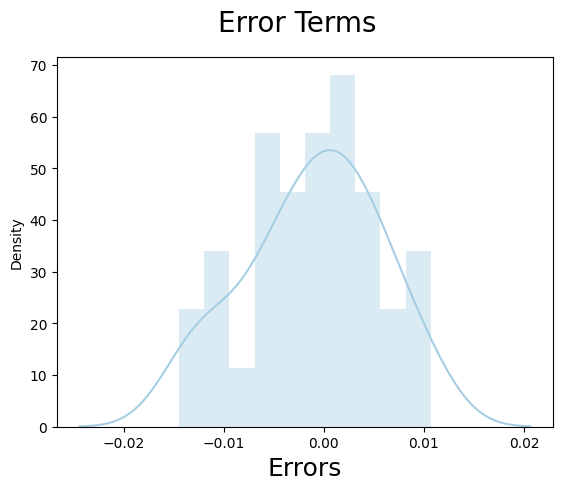

In [841]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


Text(0, 0.5, 'y_pred')

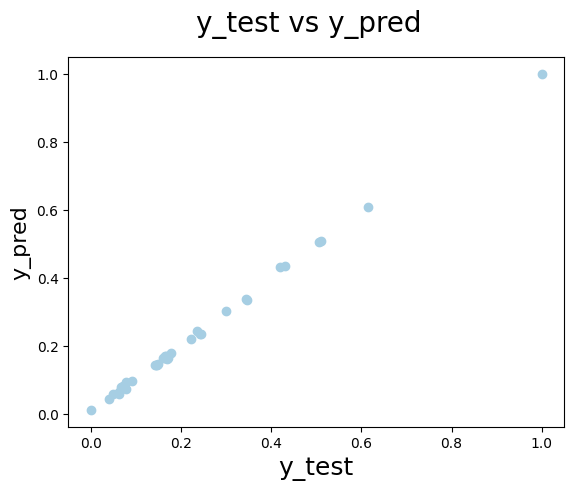

In [842]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [843]:
## on test
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]

In [844]:
y_test_pred=lm.predict(X_test)

Text(0, 0.5, 'y_test_pred')

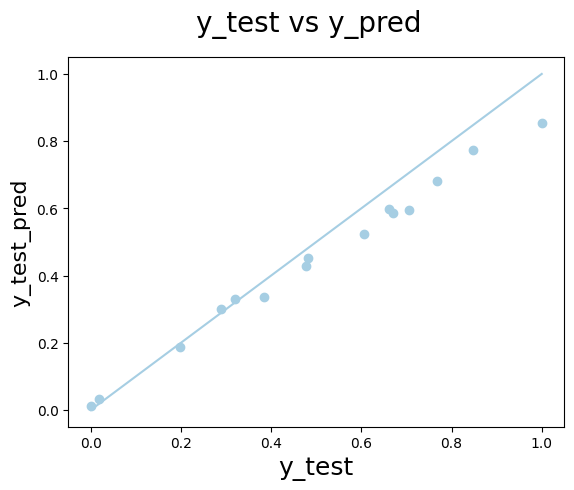

In [845]:
# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

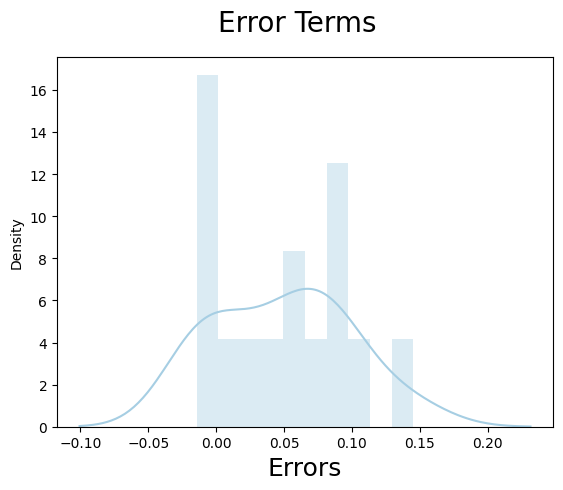

In [846]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


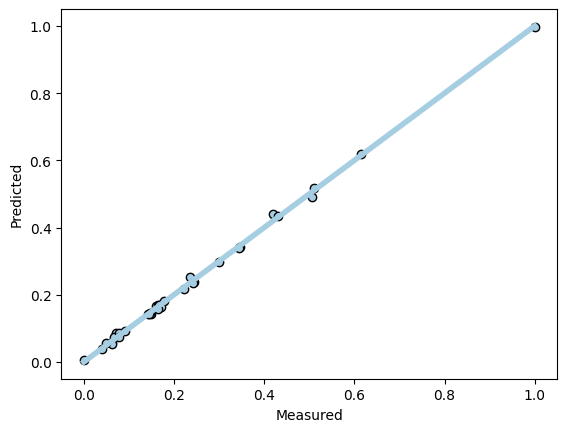

In [847]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [848]:
cam_feat=features

In [849]:
cam_model1_x=pd.DataFrame(cam_model1)

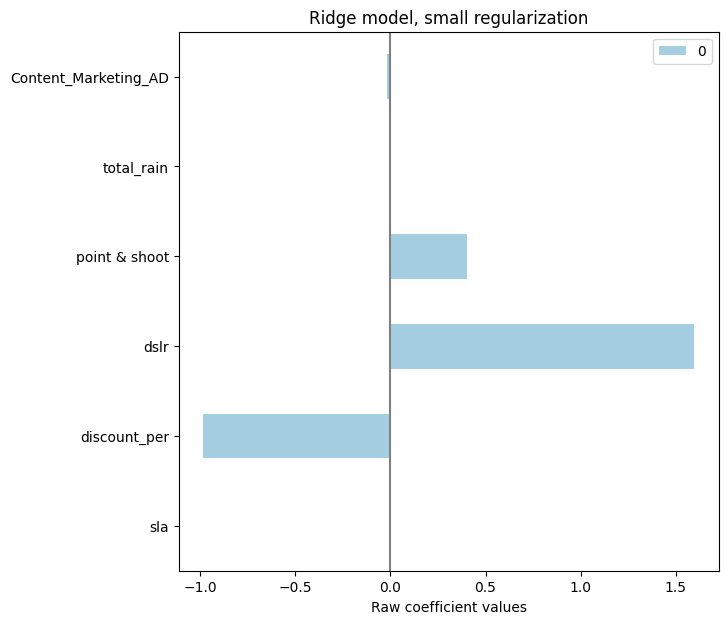

In [850]:
cam_model1_x.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [851]:
print("Camera Model1 Train Result")
print(nm.sqrt(mean_squared_error(y_train,y_train_pred)))
print(r2_score(y_train,y_train_pred))

print("Camera Model1 Test Result")
print(nm.sqrt(mean_squared_error(y_test,y_test_pred)))
print(r2_score(y_test,y_test_pred))



Camera Model1 Train Result
0.006741228002176728
0.9988275410009223
Camera Model1 Test Result
0.06832414680738853
0.9424419238778902


Multiplicative

In [852]:
camera_wk[camera_wk.columns]=nm.log(camera_wk[camera_wk.columns])
# camera_wk.columns

In [853]:
camera_wk.describe()

camera_wk=camera_wk.replace([nm.inf, -nm.inf], 0)
camera_wk=camera_wk.fillna(0)



In [854]:
df_train, df_test = train_test_split(camera_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [855]:
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=18, step=1)
selector.fit(X_train, y_train)
# X_train.columns
#
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['sla', 'discount_per', 'Stock_Index', 'Holiday_flag', 'dslr',
       'point & shoot', 'luxury', 'camcorders', 'instant cameras',
       'sportsandaction', 'mean_temp_c', 'total_rain', 'Total_Investment_AD',
       'TV_AD', 'Content_Marketing_AD', 'Online_marketing_AD', 'Affiliates_AD',
       'sales_per'],
      dtype='object')

In [856]:
m1=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     914.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.01e-20
Time:                        17:22:09   Log-Likelihood:                 127.85
No. Observations:                  35   AIC:                            -217.7
Df Residuals:                      16   BIC:                            -188.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0422 

Features       VIF
16         Affiliates_AD  31246.29
15   Online_marketing_AD  29206.14
6                 luxury   3946.38
4                   dslr   1987.72
1           discount_per   1583.64
13                 TV_AD    827.49
12   Total_Investment_AD    676.41
5          point & shoot     84.55
9        sportsandaction     61.46
7             camcorders     50.04
14  Content_Marketing_AD     30.01
0                    sla     29.50
8        instant cameras     28.23
10           mean_temp_c     19.70
11            total_rain     16.99
2            Stock_Index     15.64
17             sales_per     14.88
3           Holiday_flag      2.14

In [857]:
features=features.drop('Holiday_flag',1)
m1=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1026.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           3.12e-22
Time:                        17:22:09   Log-Likelihood:                 127.81
No. Observations:                  35   AIC:                            -219.6
Df Residuals:                      17   BIC:                            -191.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0415 

Features       VIF
15         Affiliates_AD  31151.00
14   Online_marketing_AD  29115.72
5                 luxury   3795.74
3                   dslr   1938.64
1           discount_per   1582.95
12                 TV_AD    827.27
11   Total_Investment_AD    673.73
4          point & shoot     77.37
8        sportsandaction     61.36
6             camcorders     49.77
13  Content_Marketing_AD     29.96
0                    sla     28.77
7        instant cameras     27.25
9            mean_temp_c     19.69
10            total_rain     15.14
2            Stock_Index     15.00
16             sales_per     12.09

In [858]:
features=features.drop('instant cameras',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1152.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           9.08e-24
Time:                        17:22:09   Log-Likelihood:                 127.78
No. Observations:                  35   AIC:                            -221.6
Df Residuals:                      18   BIC:                            -195.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0414 

Features       VIF
14         Affiliates_AD  25519.84
13   Online_marketing_AD  24000.72
5                 luxury   3360.12
3                   dslr   1829.79
1           discount_per   1494.56
11                 TV_AD    656.12
10   Total_Investment_AD    518.08
4          point & shoot     76.30
7        sportsandaction     52.84
6             camcorders     47.12
12  Content_Marketing_AD     29.15
0                    sla     25.12
8            mean_temp_c     18.67
2            Stock_Index     14.95
9             total_rain     13.95
15             sales_per     12.07

In [859]:
features=features.drop('sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1292.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.54e-25
Time:                        17:22:09   Log-Likelihood:                 127.71
No. Observations:                  35   AIC:                            -223.4
Df Residuals:                      19   BIC:                            -198.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0408 

Features       VIF
13         Affiliates_AD  25485.60
12   Online_marketing_AD  23937.70
4                 luxury   3232.36
0           discount_per   1476.42
2                   dslr   1449.63
10                 TV_AD    587.94
9    Total_Investment_AD    497.81
3          point & shoot     75.40
6        sportsandaction     52.18
5             camcorders     41.64
11  Content_Marketing_AD     25.55
7            mean_temp_c     17.17
1            Stock_Index     14.62
8             total_rain     13.69
14             sales_per     10.15

In [860]:
features=features.drop('sportsandaction',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1447.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           6.94e-27
Time:                        17:22:09   Log-Likelihood:                 127.58
No. Observations:                  35   AIC:                            -225.2
Df Residuals:                      20   BIC:                            -201.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0382 

Features       VIF
12         Affiliates_AD  23297.59
11   Online_marketing_AD  20952.09
4                 luxury   3165.34
2                   dslr   1324.79
0           discount_per   1190.41
9                  TV_AD    571.16
8    Total_Investment_AD    382.04
3          point & shoot     75.40
5             camcorders     29.63
10  Content_Marketing_AD     21.54
6            mean_temp_c     16.53
7             total_rain     12.23
1            Stock_Index     11.78
13             sales_per      8.53

In [861]:
features=features.drop('camcorders',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1566.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.63e-28
Time:                        17:22:09   Log-Likelihood:                 126.82
No. Observations:                  35   AIC:                            -225.6
Df Residuals:                      21   BIC:                            -203.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0370 

Features       VIF
11         Affiliates_AD  23117.10
10   Online_marketing_AD  20841.95
4                 luxury   2501.04
2                   dslr   1275.17
0           discount_per    967.36
8                  TV_AD    565.07
7    Total_Investment_AD    381.41
3          point & shoot     75.40
9   Content_Marketing_AD     18.03
5            mean_temp_c     16.42
6             total_rain     12.15
1            Stock_Index     11.08
12             sales_per      7.83

In [862]:
features=features.drop('total_rain',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1703.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           9.68e-30
Time:                        17:22:09   Log-Likelihood:                 126.07
No. Observations:                  35   AIC:                            -226.1
Df Residuals:                      22   BIC:                            -205.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0281 

Features       VIF
10         Affiliates_AD  22975.72
9    Online_marketing_AD  20826.71
4                 luxury   2077.12
2                   dslr   1165.40
0           discount_per    906.43
7                  TV_AD    565.03
6    Total_Investment_AD    343.34
3          point & shoot     73.10
8   Content_Marketing_AD     15.90
5            mean_temp_c     15.18
1            Stock_Index     10.69
11             sales_per      7.31

In [863]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1940.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.15e-31
Time:                        17:22:10   Log-Likelihood:                 126.05
No. Observations:                  35   AIC:                            -228.1
Df Residuals:                      23   BIC:                            -209.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0310    

Features       VIF
9         Affiliates_AD  15556.83
8   Online_marketing_AD  14593.42
4                luxury   1755.19
2                  dslr   1163.76
0          discount_per    681.36
7                 TV_AD    345.74
6   Total_Investment_AD    247.32
3         point & shoot     66.69
5           mean_temp_c     14.85
1           Stock_Index     10.57
10            sales_per      7.04

In [864]:
features=features.drop('Total_Investment_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2122.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           7.82e-33
Time:                        17:22:10   Log-Likelihood:                 125.21
No. Observations:                  35   AIC:                            -228.4
Df Residuals:                      24   BIC:                            -211.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0337    

Features      VIF
8        Affiliates_AD  6389.16
7  Online_marketing_AD  5142.61
4               luxury  1751.75
2                 dslr  1119.71
0         discount_per   654.76
6                TV_AD   180.54
3        point & shoot    66.63
5          mean_temp_c    12.02
1          Stock_Index     9.47
9            sales_per     6.97

In [865]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2195.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           6.17e-34
Time:                        17:22:10   Log-Likelihood:                 123.25
No. Observations:                  35   AIC:                            -226.5
Df Residuals:                      25   BIC:                            -210.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0244    

Features      VIF
8        Affiliates_AD  6321.59
7  Online_marketing_AD  5119.12
4               luxury  1616.43
2                 dslr  1025.18
0         discount_per   653.10
6                TV_AD   180.07
3        point & shoot    61.93
5          mean_temp_c     9.91
1          Stock_Index     9.04

In [866]:
features=features.drop('Affiliates_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1957.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           3.99e-34
Time:                        17:22:10   Log-Likelihood:                 118.49
No. Observations:                  35   AIC:                            -219.0
Df Residuals:                      26   BIC:                            -205.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0038    

Features      VIF
4               luxury  1596.53
2                 dslr  1020.83
0         discount_per   622.11
7  Online_marketing_AD   148.77
6                TV_AD   117.25
3        point & shoot    61.82
5          mean_temp_c     9.41
1          Stock_Index     7.46

In [867]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2139.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.39e-35
Time:                        17:22:10   Log-Likelihood:                 117.06
No. Observations:                  35   AIC:                            -218.1
Df Residuals:                      27   BIC:                            -205.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0020    

Features      VIF
4               luxury  1306.27
2                 dslr  1008.27
0         discount_per   416.49
6  Online_marketing_AD   123.63
5                TV_AD    92.00
3        point & shoot    57.51
1          Stock_Index     5.19

In [868]:
features=features.drop('Stock_Index',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2585.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           4.56e-37
Time:                        17:22:10   Log-Likelihood:                 117.03
No. Observations:                  35   AIC:                            -220.1
Df Residuals:                      28   BIC:                            -209.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0014    

Features      VIF
3               luxury  1296.25
1                 dslr   921.60
0         discount_per   348.99
5  Online_marketing_AD   104.45
4                TV_AD    76.13
2        point & shoot    44.56

In [869]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3137.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.07e-38
Time:                        17:22:10   Log-Likelihood:                 116.62
No. Observations:                  35   AIC:                            -221.2
Df Residuals:                      29   BIC:                            -211.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0023      0.007      0.311

Features      VIF
3         luxury  1285.74
1           dslr   910.28
0   discount_per   319.35
2  point & shoot    43.35
4          TV_AD    11.97

In [870]:
lm_m = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm_m.summary()) # model summary
y_train_pred=lm_m.predict(X_train[features])
cam_features1=features
cam_model2=lm_m

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.570e+04
Date:                Wed, 11 Oct 2023   Prob (F-statistic):                    1.63e-53
Time:                        17:22:10   Log-Likelihood:                          116.56
No. Observations:                  35   AIC:                                     -223.1
Df Residuals:                      30   BIC:                                     -215.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Mean_Squared_Error : 7.497567090281535e-05
r_square_value : 0.9981480864352477


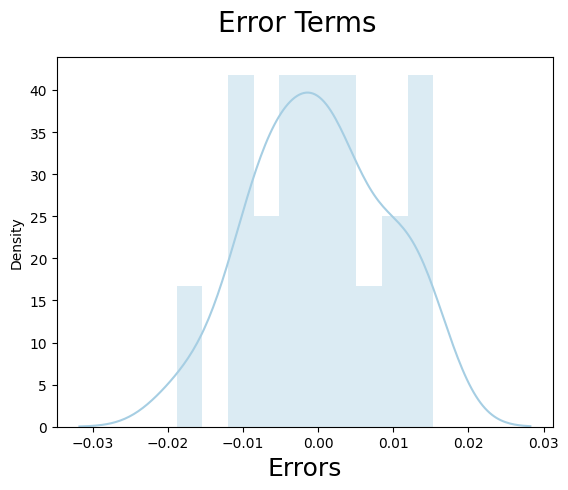

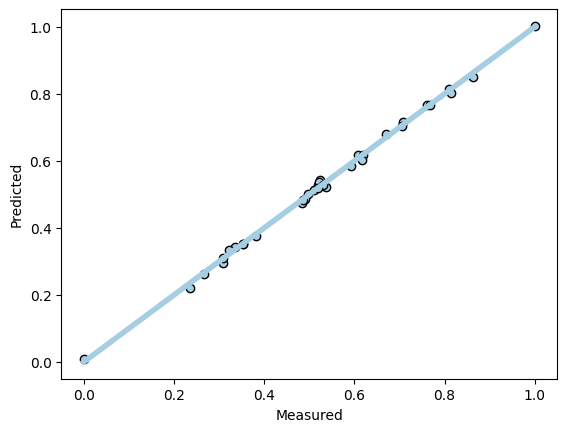

In [871]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


fig, ax = plt.subplots()
ax.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [872]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)
scores


array([0.9937479 , 0.99957992, 0.99119554, 0.99826703, 0.99618264,
       0.99629403, 0.99228761, 0.98563937, 0.98665306, 0.99640583])

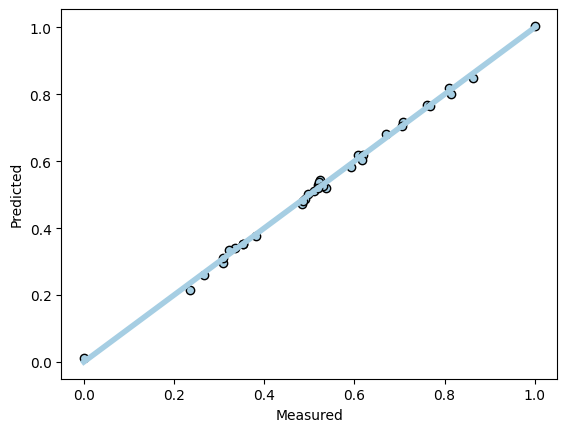

In [873]:

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [874]:
df_test[df_test.columns]=scaler.fit_transform(df_test[df_test.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']


In [875]:
y_test_pred= lm_m.predict(X_test[features])

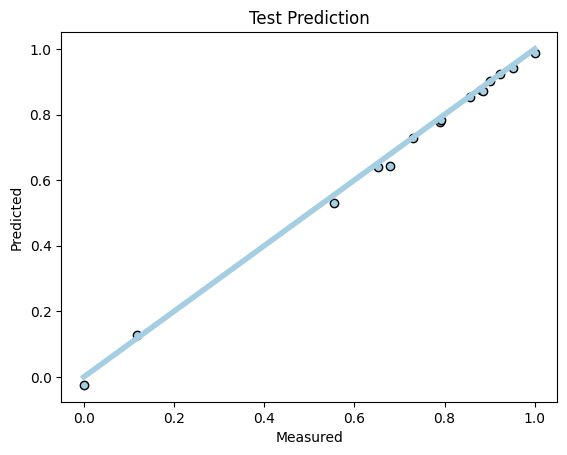

In [876]:
y_test.min()
y_test.max()
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],lw=4)
plt.title("Test Prediction")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

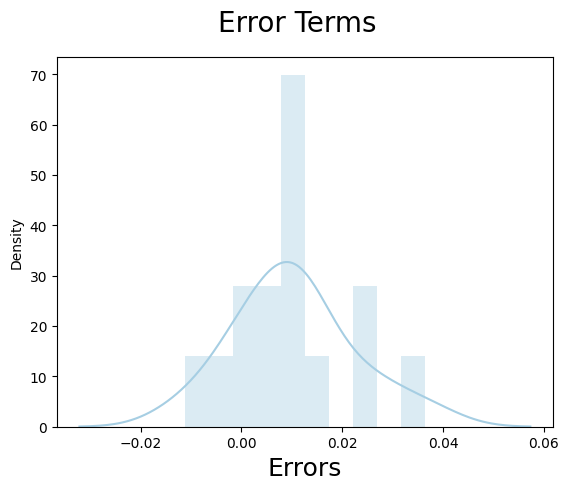

In [877]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [878]:
cam_features2=pd.DataFrame(cam_model2.params)

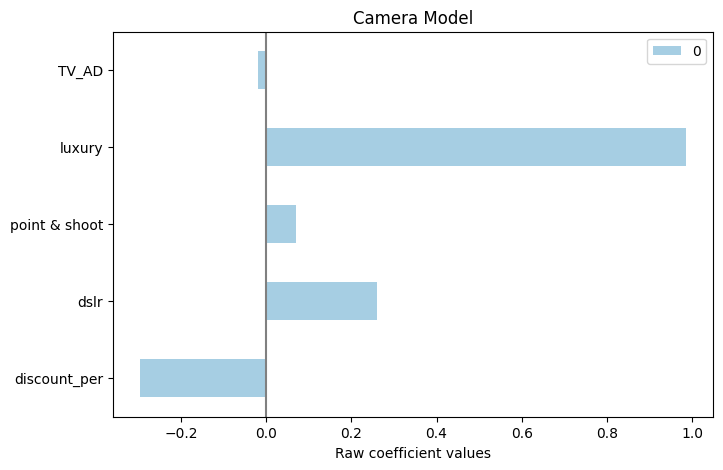

In [879]:
cam_features2.plot.barh(figsize=(10, 5))
plt.title("Camera Model")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [880]:
print("Camera Model2 Train Result")
print(nm.sqrt(mean_squared_error(y_train,y_train_pred)))
print(r2_score(y_train,y_train_pred))

print("Camera Model2 Test Result")
print(nm.sqrt(mean_squared_error(y_test,y_test_pred)))
print(r2_score(y_test,y_test_pred))



Camera Model2 Train Result
0.008658849282832873
0.9981480864352477
Camera Model2 Test Result
0.015499497856034284
0.9970060114945573


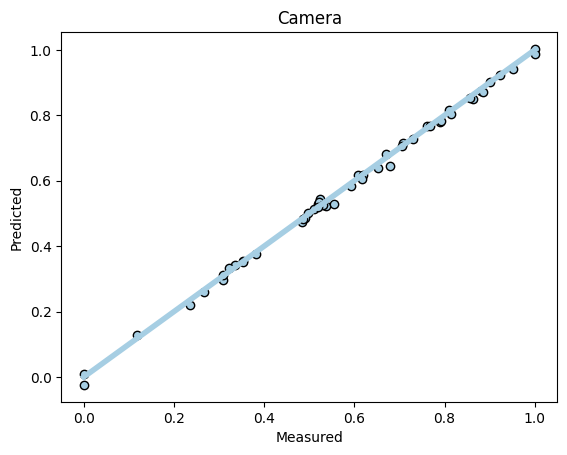

In [881]:
cam_full=pd.concat([df_train,df_test])
cam_gmv=pd.DataFrame(pd.concat([y_train_pred,y_test_pred]))
cam_gmv.rename(columns={0:'gmv_pred'},inplace=True)
cam_data=pd.merge(cam_gmv,cam_full,left_index=True,right_index=True)
fig, ax = plt.subplots()
ax.scatter(data=cam_data,x='gmv',y='gmv_pred', edgecolors=(0, 0, 0))
ax.plot([cam_data.gmv.min(), cam_data.gmv.max()], [cam_data.gmv.min(), cam_data.gmv.max()],  lw=4)
plt.title("Camera")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

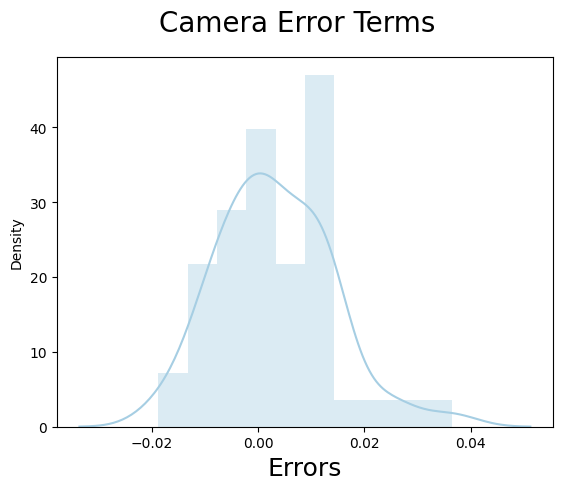

In [882]:
fig=plt.figure()
sns.distplot((cam_data.gmv-cam_data.gmv_pred),bins=10)
fig.suptitle('Camera Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Home Audio

In [883]:
##
ha=EleData3[EleData3.product_analytic_sub_category=='homeaudio']
# camera.discount_per
# EleData3.product_analytic_sub_category.value_counts()

In [884]:
ha.isnull().sum()

ha_dummies=pd.get_dummies(ha.product_analytic_vertical)
ha=pd.concat([ha,ha_dummies],axis=1)

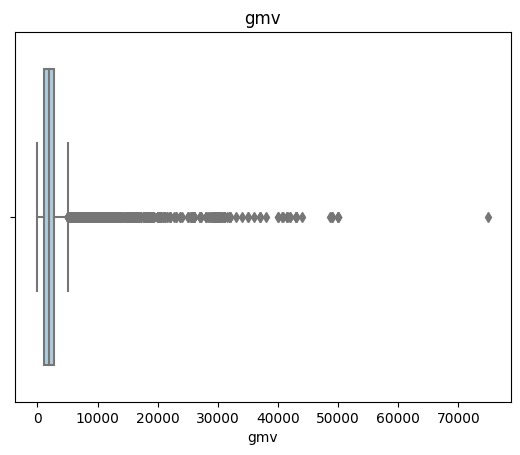

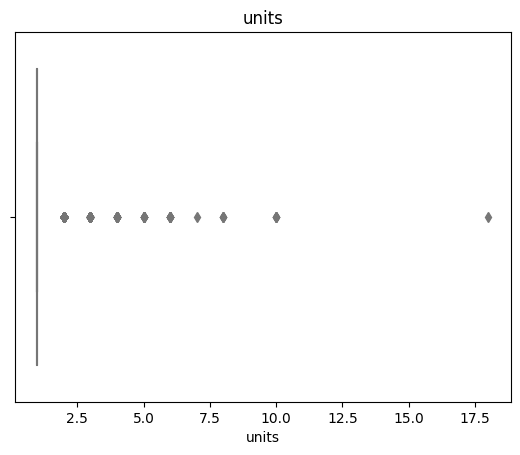

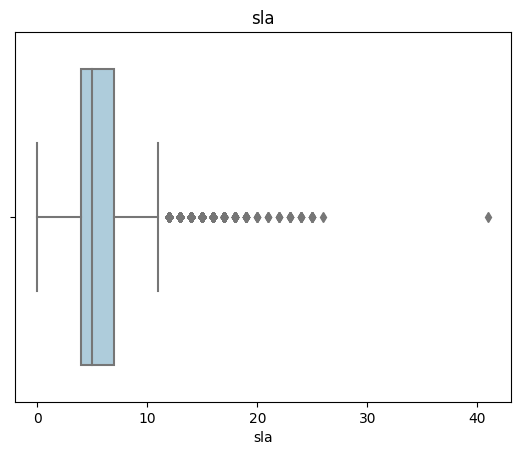

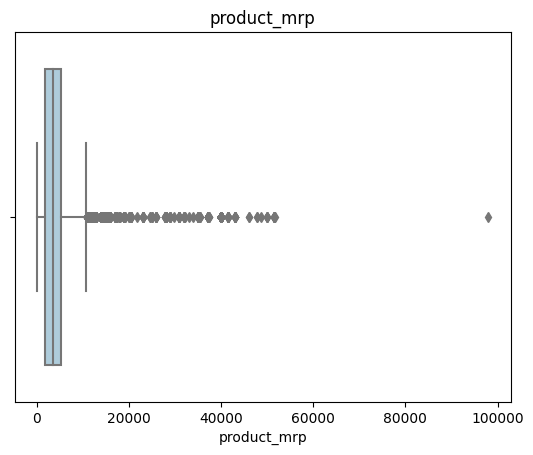

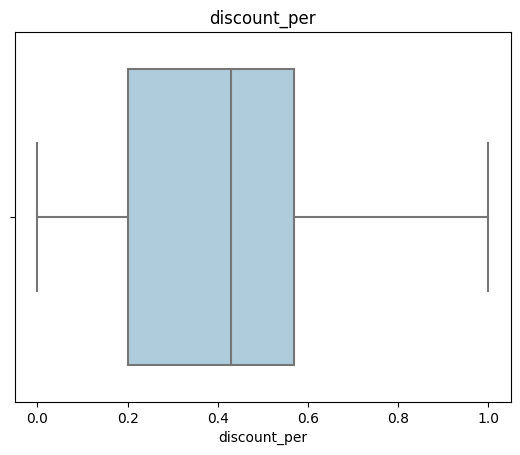

In [885]:
for i in num:
  sns.boxplot(x=ha[i])
  plt.title(i)
  plt.show()


In [886]:



q1=ha['sla'].quantile(0.25)
q3=ha['sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['sla']>up,'sla']=up
ha.loc[ha['sla']<lw,'sla']=lw
q1=ha['product_procurement_sla'].quantile(0.25)
q3=ha['product_procurement_sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['product_procurement_sla']>up,'product_procurement_sla']=up
ha.loc[ha['product_procurement_sla']<lw,'product_procurement_sla']=lw

-0.5   11.5
-3.5   8.5


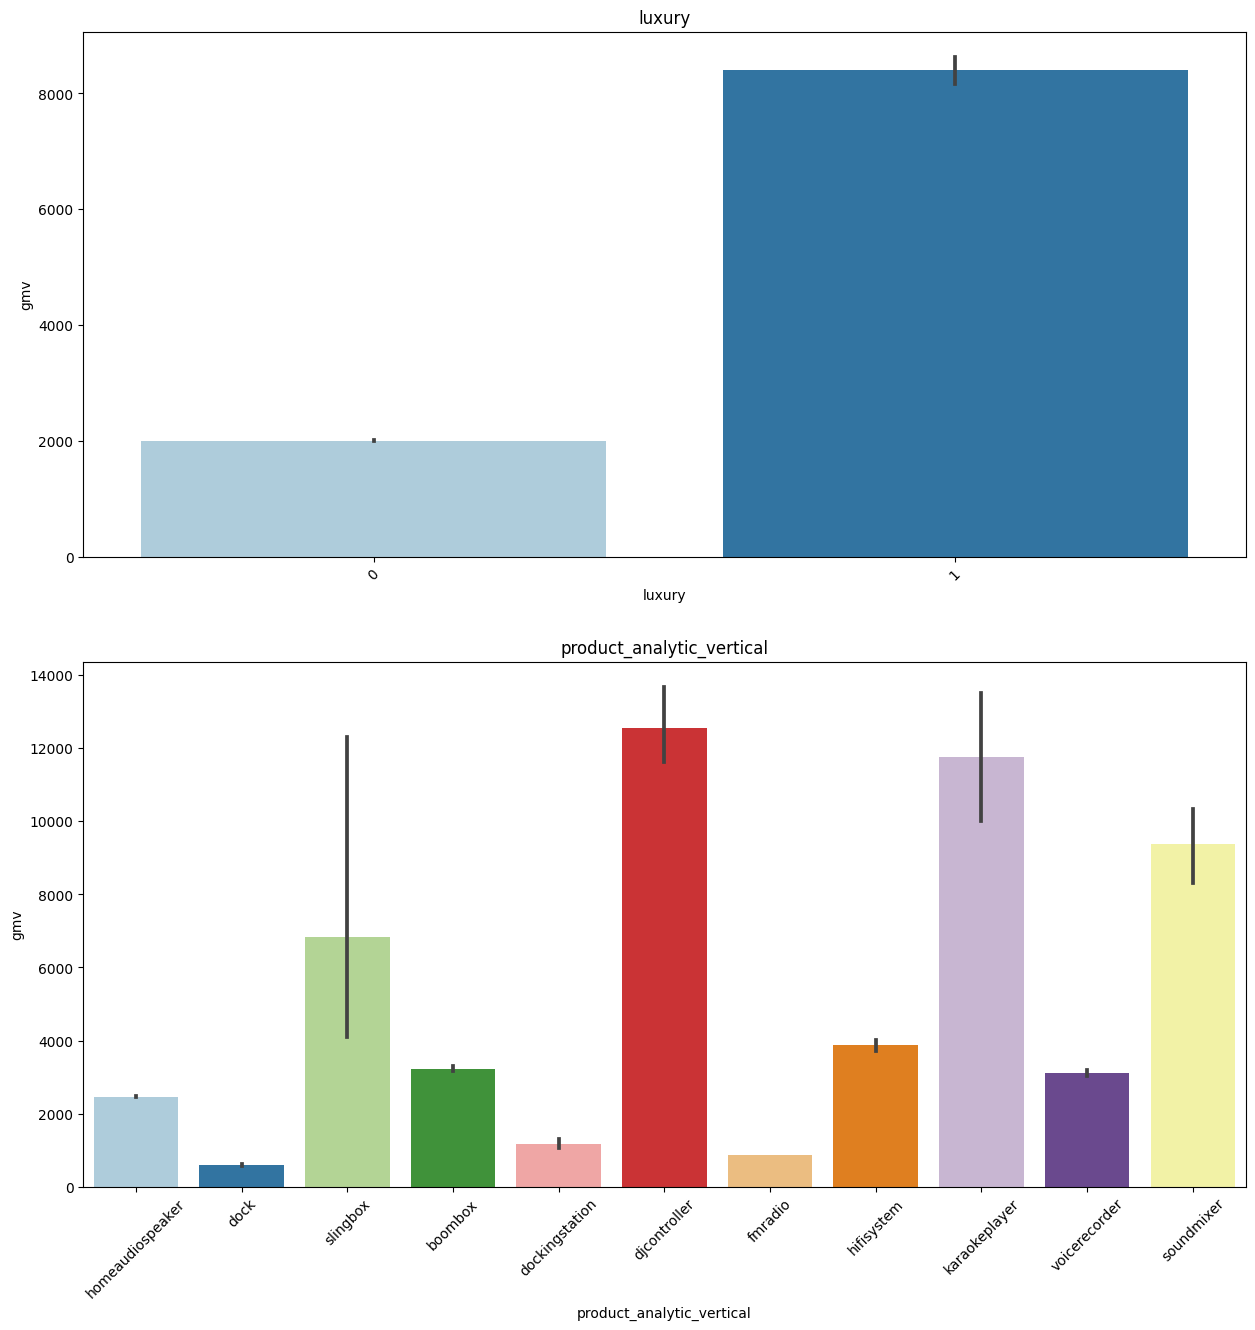

In [887]:
p = ['luxury','product_analytic_vertical']

plt.figure(figsize=(15, 15))
x=1
for i in p:
  plt.subplot(2,1,x)
  plt.title(i)
  sns.barplot(y=ha['gmv'],x=ha[i])
  plt.xticks(rotation=45)
  x=x+1



In [888]:
ha.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived', 'week', 'listing_price',
       'discount_per', 'sale_date', 'Stock_Index', 'NPS', 'Year',
       'pay_date_flag', 'Holiday_flag', 'luxury', 'boombox', 'djcontroller',
       'dock', 'dockingstation', 'fmradio', 'hifisystem', 'homeaudiospeaker',
       'karaokeplayer', 'slingbox', 'soundmixer', 'voicerecorder'],
      dtype='object')

In [889]:
revenue_avg=pd.DataFrame(ha.groupby('product_analytic_vertical').agg(nums=('order_item_id', 'count'),rev=('gmv', nm.sum))).reset_index()

In [890]:
revenue_avg['avg']=revenue_avg.rev/revenue_avg.nums

In [891]:
revenue_avg

product_analytic_vertical   nums           rev           avg
0                    boombox   2390  7.732093e+06   3235.185356
1               djcontroller    186  2.335536e+06  12556.645161
2                       dock   1836  1.085407e+06    591.180283
3             dockingstation    320  3.776040e+05   1180.012500
4                    fmradio  21580  1.871460e+07    867.219880
5                 hifisystem   1376  5.323643e+06   3868.926599
6           homeaudiospeaker  78626  1.938923e+08   2466.006977
7              karaokeplayer      2  2.350000e+04  11750.000000
8                   slingbox      3  2.049500e+04   6831.666667
9                 soundmixer     65  6.088680e+05   9367.200000
10             voicerecorder   3367  1.048322e+07   3113.520048

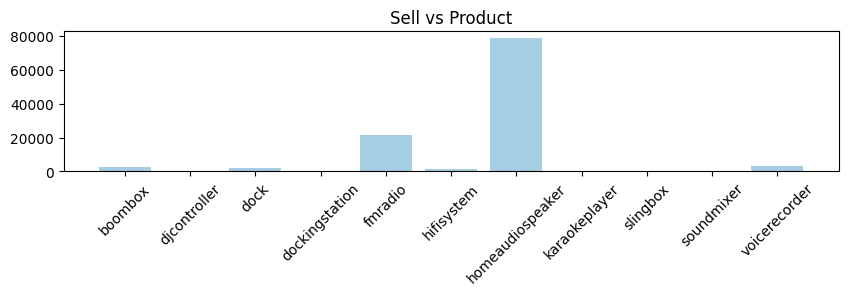

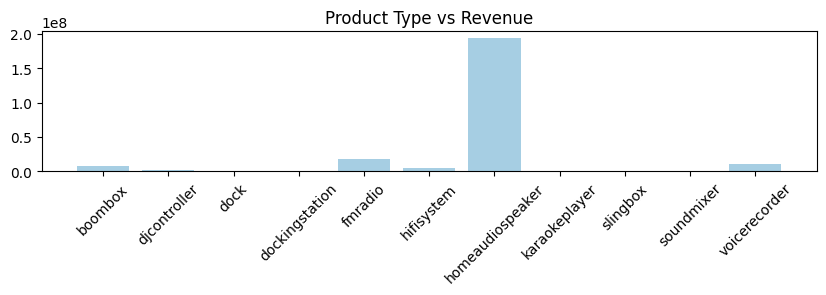

Text(0.5, 1.0, 'Product Type vs Revenue')

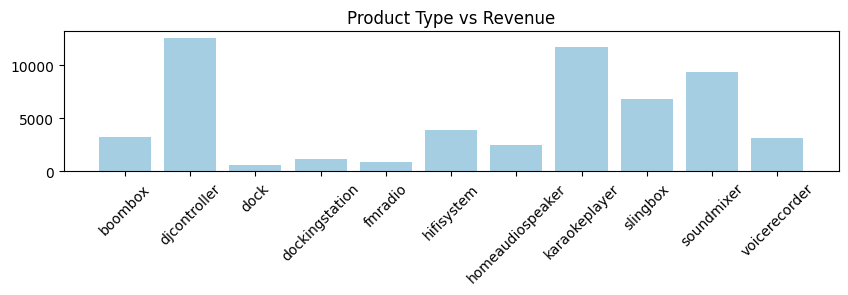

In [892]:
revenue_avg['avg']=revenue_avg.rev/revenue_avg.nums
plt.figure(figsize=(10,4))
plt.subplot(2, 1, 2)





plt.bar(x=revenue_avg.product_analytic_vertical,height=revenue_avg.nums)
plt.title("Sell vs Product")
plt.xticks(rotation=45)

plt.show()
plt.figure(figsize=(10,4))
plt.subplot(2, 1, 1)
plt.bar(x=revenue_avg.product_analytic_vertical,height=revenue_avg.rev)
plt.xticks(rotation=45)
plt.title("Product Type vs Revenue")
plt.show()


plt.show()
plt.figure(figsize=(10,4))
plt.subplot(2, 1, 1)
plt.bar(x=revenue_avg.product_analytic_vertical,height=revenue_avg.avg)
plt.xticks(rotation=45)
plt.title("Product Type vs Revenue")




In [893]:

ha_wk=ha.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique","fmradio":"sum","homeaudiospeaker":"sum",
                                'luxury':'sum', 'boombox':'sum', 'djcontroller':'sum','dock':'sum', 'dockingstation':'sum', 'fmradio':'sum', 'hifisystem':'sum', 'homeaudiospeaker':'sum',
                                'karaokeplayer':'sum', 'slingbox':'sum', 'soundmixer':'sum', 'voicerecorder':'sum'}).round(2)

ha_wk=pd.merge(ha_wk,weekly_kpis,on='week')

ha_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

ha_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

ha_wk.order_payment_type.value_counts()
ha_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
ha_wk["cod_per"]=ha_wk["order_payment_cod"]/ha_wk["order_count"]
ha_wk.drop("order_payment_cod",1,inplace=True)
ha_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)


In [894]:
ha_wk['sales_per']=(ha_wk['num_of_sales']-1)/7
ha_wk.drop('num_of_sales',1,inplace=True)

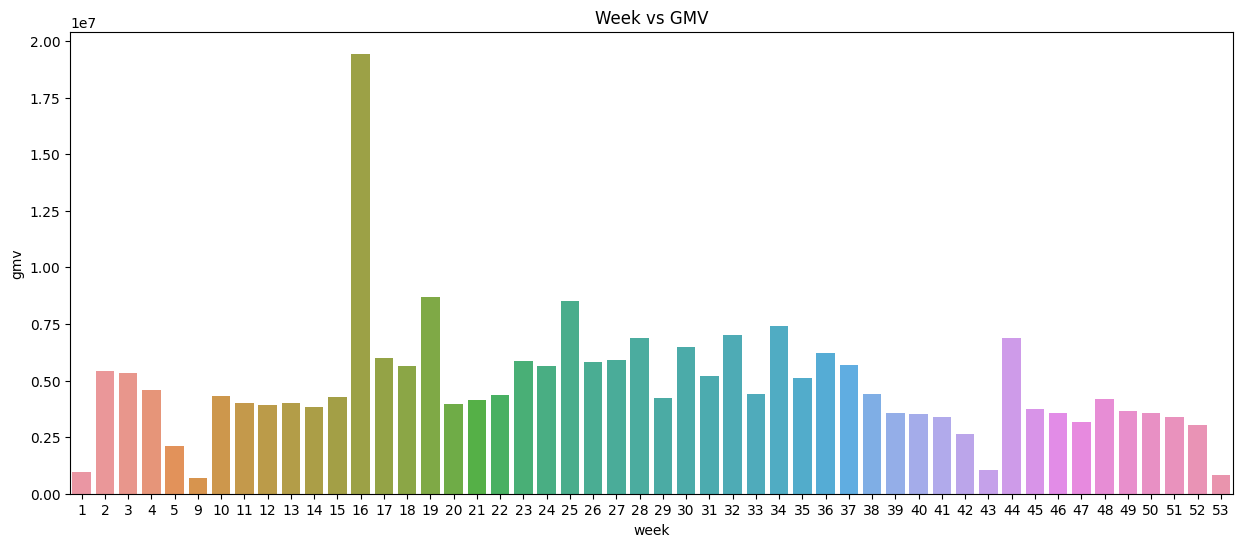

In [895]:
plt.figure(figsize=(15,6))
sns.barplot(x=ha_wk['week'],y=ha_wk['gmv'])
plt.title("Week vs GMV")
plt.show()

### 16 , 19 , 25, 30 ,32,34  ,44 week

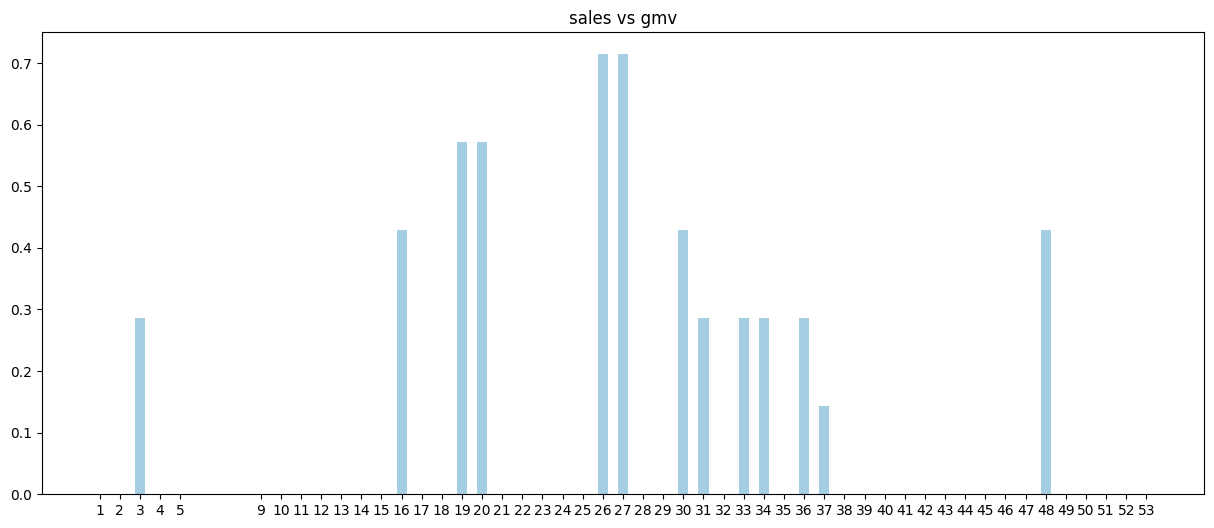

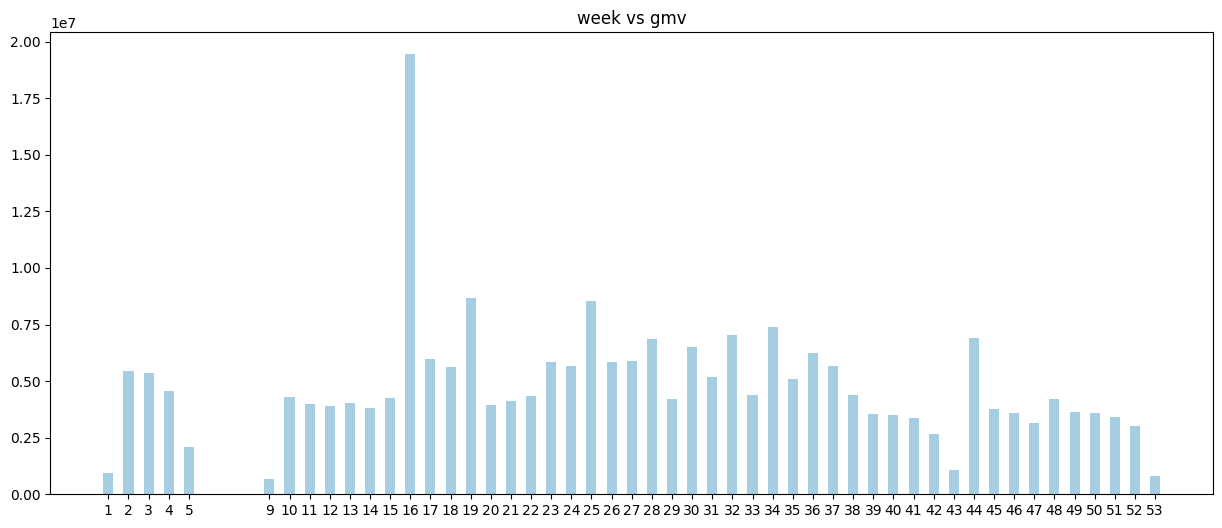

In [896]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=ha_wk['week'],height=ha_wk['sales_per'],width=width)
plt.xticks(ha_wk['week'])
plt.title('sales vs gmv')
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=ha_wk['week'],height=ha_wk['gmv'],width=width)
plt.xticks(ha_wk['week'])
plt.title('week vs gmv')
plt.show()


## sales 16 , 19, 20, 26,27,30,31, 33,34,48
## doesnt have much impact specially week 20 ,33,34 etc

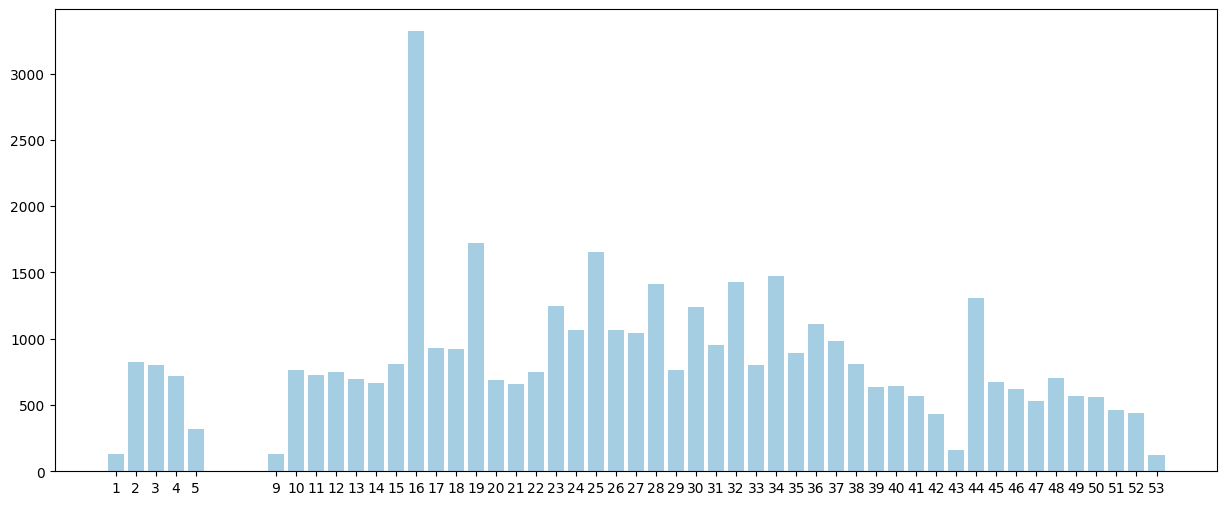

In [897]:
plt.figure(figsize=(15,6))
plt.bar(x=ha_wk['week'],height=ha_wk['discount_per'])
plt.xticks(ha_wk['week'])
plt.show()

# 16,19,23,25,28,30,32,34,44
## impacting gmv

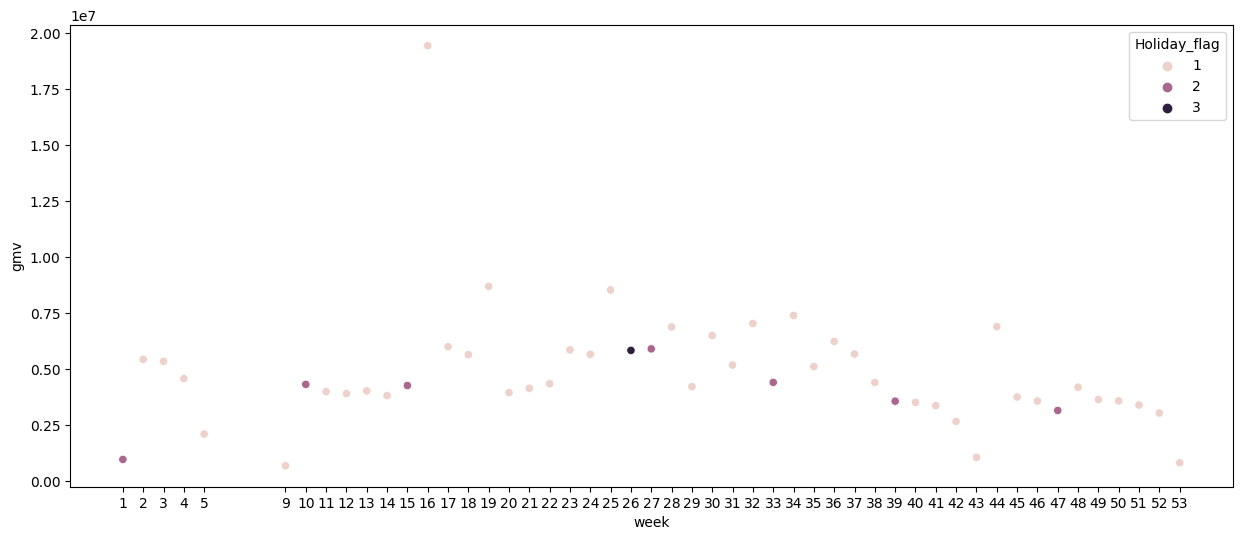

In [898]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=ha_wk['week'],y=ha_wk['gmv'],hue=ha_wk['Holiday_flag'])
plt.xticks(ha_wk['week'])
plt.show()


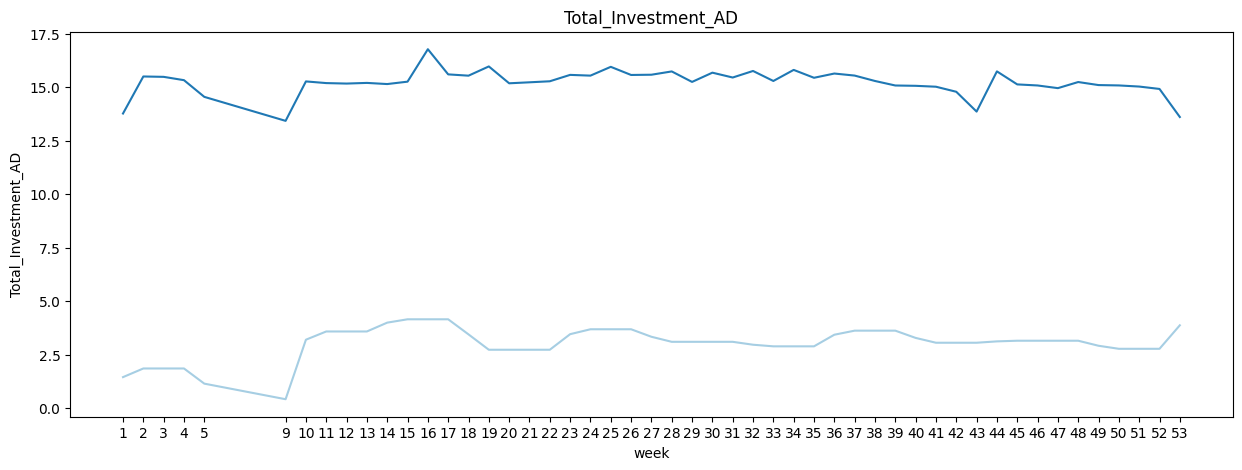

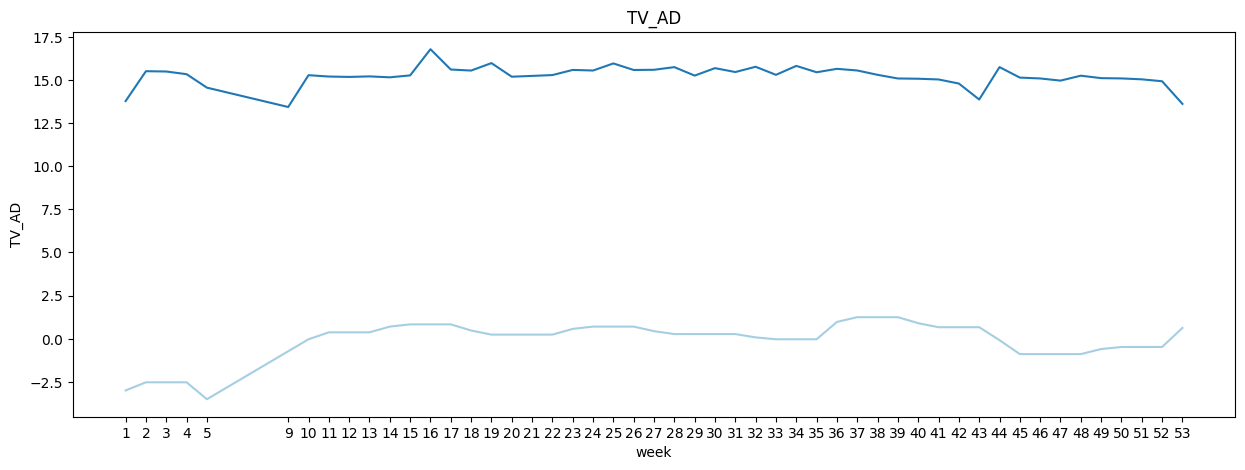

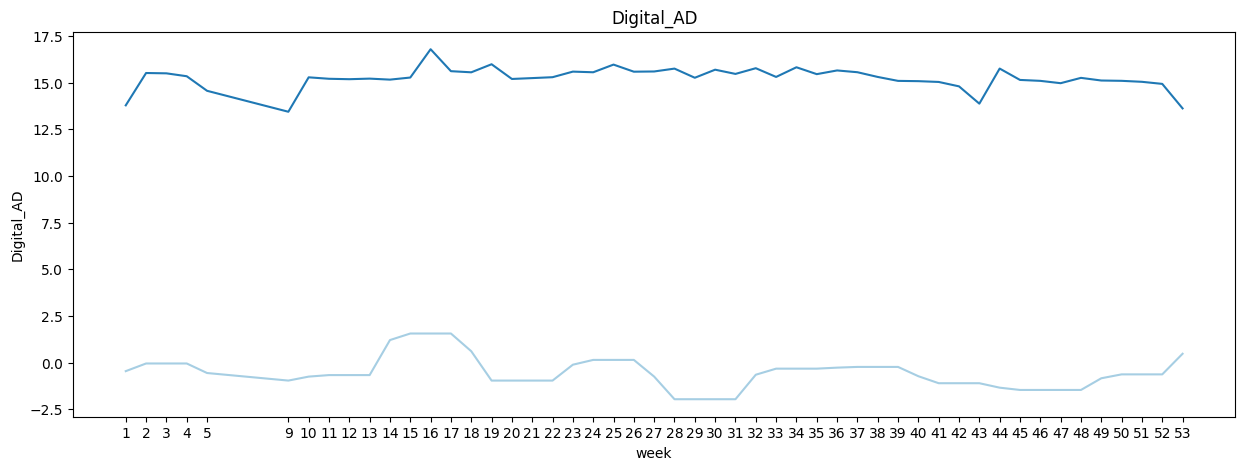

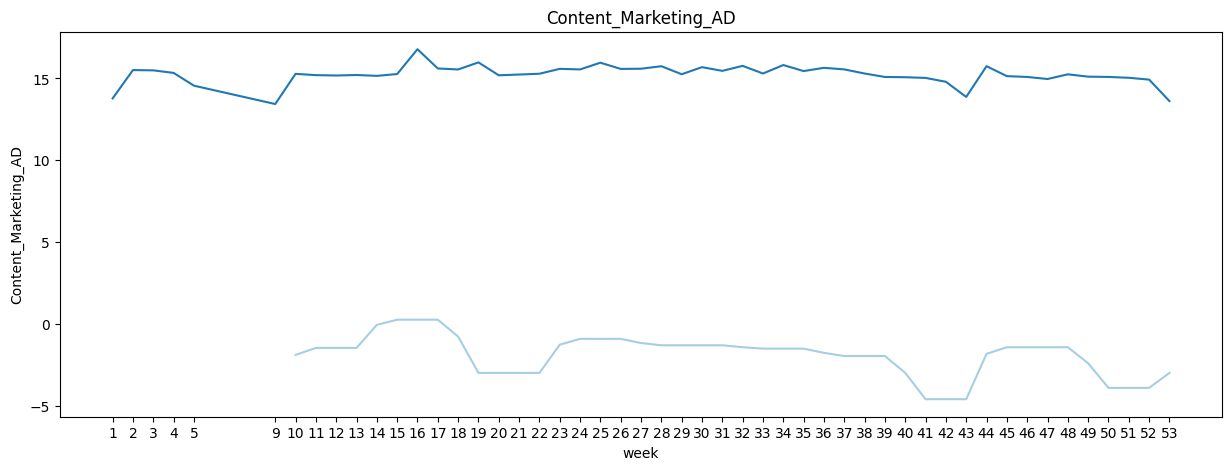

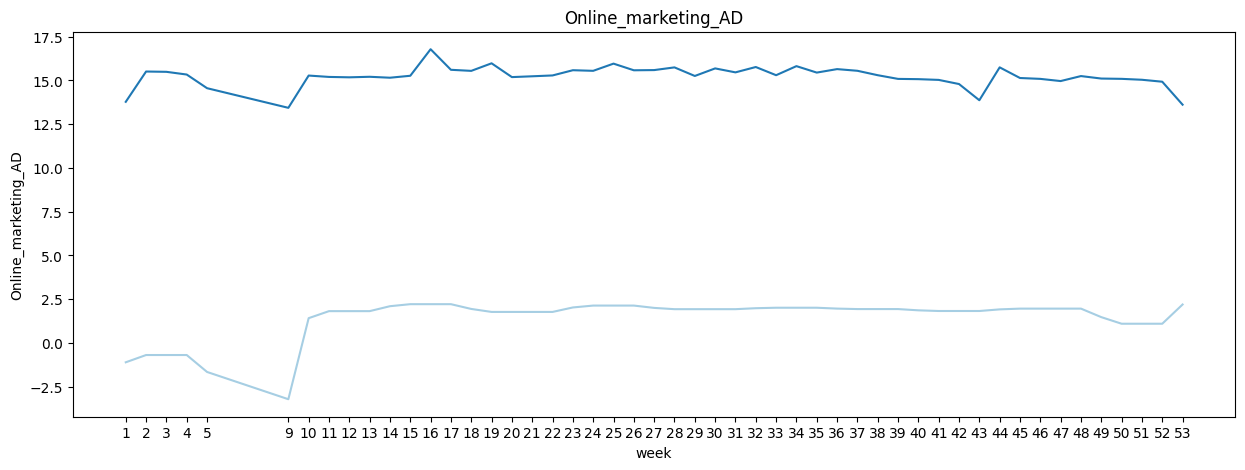

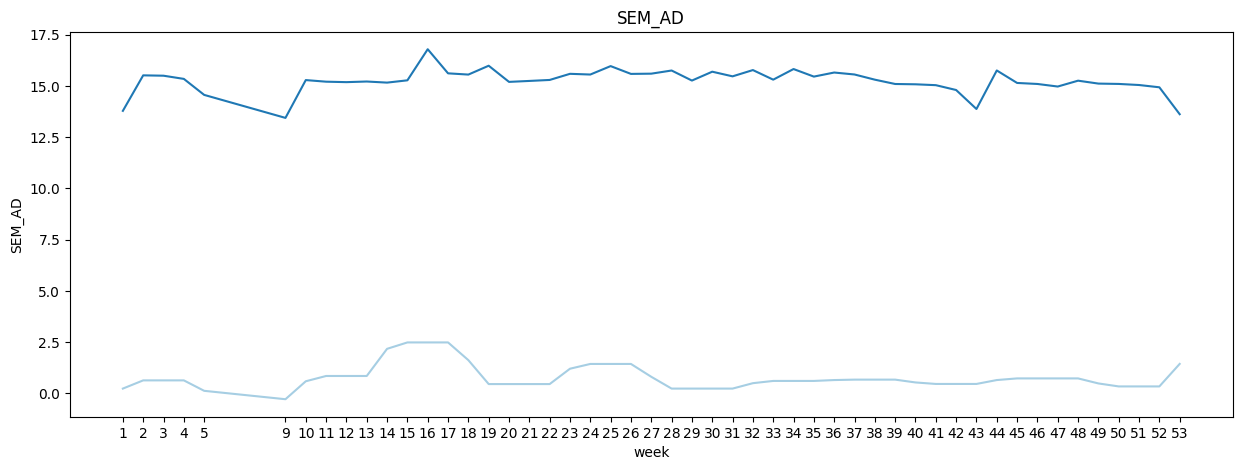

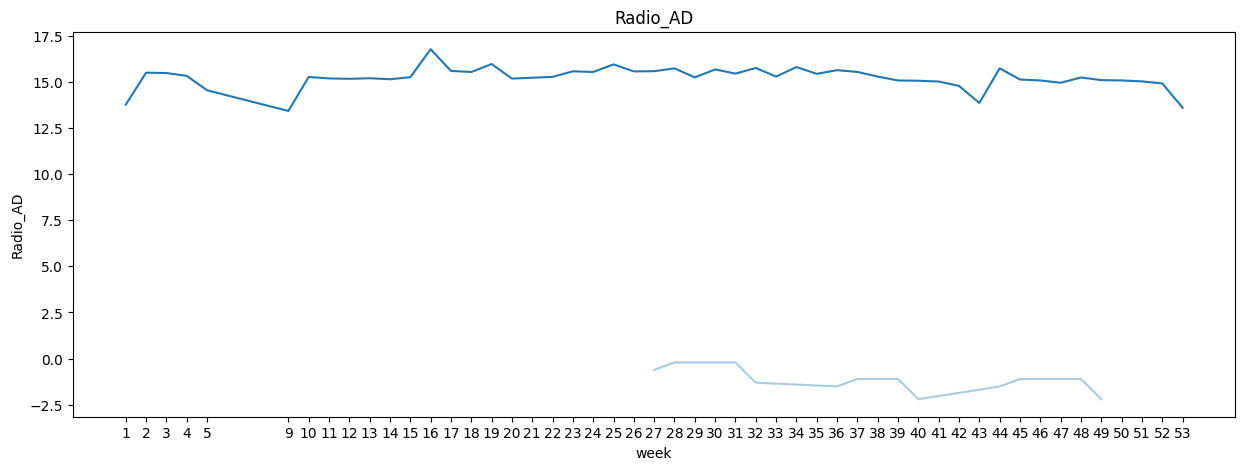

In [899]:
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=ha_wk['week'],y=nm.log(ha_wk[i]))
    sns.lineplot(x=ha_wk['week'],y=nm.log(ha_wk['gmv']))
    plt.xticks(ha_wk['week'])
    x=x+1
    plt.show()

## radio , other , conent , digital and total : not required



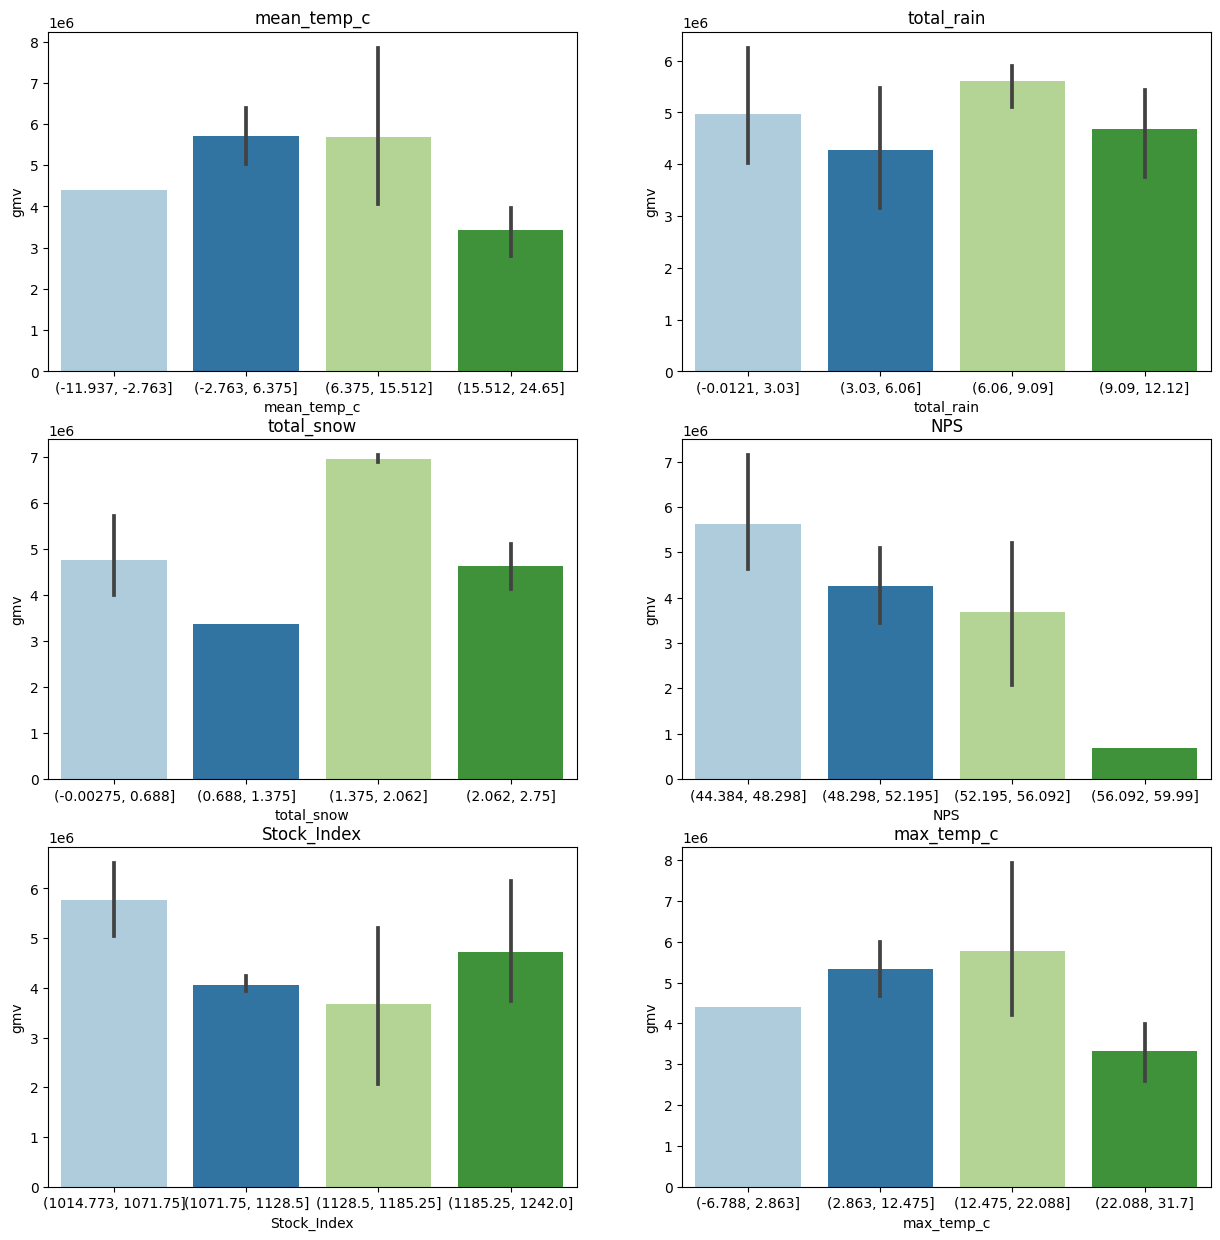

In [900]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=ha_wk['gmv'],x=pd.cut(ha_wk[i],bins=4))
  x=x+1


# max and mean almost same impact : so max temp can be remobed

In [901]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=ha_wk['gmv'],x=pd.cut(ha_wk[i],bins=4))
  x=x+1

## product procurement sla has a impact

In [902]:
ha_wk.drop(["units","order_count","product_mrp"],1,inplace=True)


In [903]:
ha_wk.drop(['Other_AD'],1,inplace=True)

In [904]:
ha_wk.corr()[(ha_wk.corr()>0.9)|(ha_wk.corr()<-0.9)]

week       gmv  sla  product_procurement_sla  \
week                      1.0       NaN  NaN                      NaN   
gmv                       NaN  1.000000  NaN                      NaN   
sla                       NaN       NaN  1.0                      NaN   
product_procurement_sla   NaN       NaN  NaN                      1.0   
listing_price             NaN  0.999987  NaN                      NaN   
discount_per              NaN  0.985769  NaN                      NaN   
Stock_Index               NaN       NaN  NaN                      NaN   
NPS                       NaN       NaN  NaN                      NaN   
pay_day_in_wk             NaN       NaN  NaN                      NaN   
Holiday_flag              NaN       NaN  NaN                      NaN   
fmradio                   NaN       NaN  NaN                      NaN   
homeaudiospeaker          NaN  0.990529  NaN                      NaN   
luxury                    NaN  0.903618  NaN                      NaN   
boombox                   NaN       NaN  NaN                      NaN   
djcontroller              NaN       NaN  NaN                      NaN   
dock                      NaN       NaN  NaN                      NaN   
dockingstation            NaN       NaN  NaN                      NaN   
hifisystem                NaN       NaN  NaN                      NaN   
karaokeplayer             NaN       NaN  NaN                      NaN   
slingbox                  NaN       NaN  NaN                      NaN   
soundmixer                NaN       NaN  NaN                      NaN   
voicerecorder             NaN       NaN  NaN                      NaN   
max_temp_c                NaN       NaN  NaN                      NaN   
mean_temp_c               NaN       NaN  NaN                      NaN   
cool_deg_c                NaN       NaN  NaN                      NaN   
total_rain                NaN       NaN  NaN                      NaN   
total_snow                NaN       NaN  NaN                      NaN   
Total_Investment_AD       NaN       NaN  NaN                      NaN   
TV_AD                     NaN       NaN  NaN                      NaN   
Digital_AD                NaN       NaN  NaN                      NaN   
Content_Marketing_AD      NaN       NaN  NaN                      NaN   
Sponsorship_AD            NaN       NaN  NaN                      NaN   
Online_marketing_AD       NaN       NaN  NaN                      NaN   
Affiliates_AD             NaN       NaN  NaN                      NaN   
SEM_AD                    NaN       NaN  NaN                      NaN   
Radio_AD                  NaN       NaN  NaN                      NaN   
cod_per                   NaN       NaN  NaN                      NaN   
sales_per                 NaN       NaN  NaN                      NaN   

                         listing_price  discount_per  Stock_Index  NPS  \
week                               NaN           NaN          NaN  NaN   
gmv                           0.999987      0.985769          NaN  NaN   
sla                                NaN           NaN          NaN  NaN   
product_procurement_sla            NaN           NaN          NaN  NaN   
listing_price                 1.000000      0.985750          NaN  NaN   
discount_per                  0.985750      1.000000          NaN  NaN   
Stock_Index                        NaN           NaN          1.0  NaN   
NPS                                NaN           NaN          NaN  1.0   
pay_day_in_wk                      NaN           NaN          NaN  NaN   
Holiday_flag                       NaN           NaN          NaN  NaN   
fmradio                            NaN           NaN          NaN  NaN   
homeaudiospeaker              0.990566      0.994179          NaN  NaN   
luxury                        0.903003           NaN          NaN  NaN   
boombox                            NaN           NaN          NaN  NaN   
djcontroller                       NaN           NaN          NaN  

In [905]:
ha_wk.drop(['listing_price','SEM_AD'],1,inplace=True)

In [906]:
plt.figure(figsize=(10,10))
sns.heatmap(ha_wk.corr())
plt.show()
# camera



In [907]:
ha_wk.drop(['max_temp_c','NPS','Total_Investment_AD'],1,inplace=True)

In [908]:
ha_wk.drop(['sla','homeaudiospeaker','cool_deg_c'],1,inplace=True)## avg revenue generation is less hence can be skipped
ha_wk.drop(['Affiliates_AD','total_snow'],1,inplace=True)


In [909]:

df_train, df_test = train_test_split(ha_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)

# print(selector.support_)
# print(selector.ranking_)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features



Index(['product_procurement_sla', 'discount_per', 'pay_day_in_wk', 'fmradio',
       'luxury', 'boombox', 'djcontroller', 'dock', 'hifisystem',
       'karaokeplayer', 'mean_temp_c', 'Digital_AD', 'Content_Marketing_AD',
       'Online_marketing_AD', 'sales_per'],
      dtype='object')

In [910]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso


In [911]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     377.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.94e-20
Time:                        17:22:35   Log-Likelihood:                 114.64
No. Observations:                  35   AIC:                            -197.3
Df Residuals:                      19   BIC:                            -172.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
3                   fmradio  37.58
12     Content_Marketing_AD  33.75
4                    luxury  28.82
1              discount_per  26.62
13      Online_marketing_AD  21.96
11               Digital_AD  21.14
7                      dock  20.47
8                hifisystem  19.39
0   product_procurement_sla  16.03
10              mean_temp_c  13.50
5                   boombox  10.69
6              djcontroller   6.67
9             karaokeplayer   4.71
2             pay_day_in_wk   2.54
14                sales_per   2.24

In [912]:
features=features.drop('pay_day_in_wk',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     425.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.38e-21
Time:                        17:22:35   Log-Likelihood:                 114.64
No. Observations:                  35   AIC:                            -199.3
Df Residuals:                      20   BIC:                            -175.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2                   fmradio  36.78
11     Content_Marketing_AD  32.50
1              discount_per  25.95
3                    luxury  22.82
12      Online_marketing_AD  21.84
10               Digital_AD  20.53
6                      dock  20.30
0   product_procurement_sla  16.03
7                hifisystem  13.10
9               mean_temp_c  11.26
4                   boombox   9.87
5              djcontroller   6.26
8             karaokeplayer   4.51
13                sales_per   2.08

In [913]:
features=features.drop('luxury',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     464.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           8.92e-23
Time:                        17:22:35   Log-Likelihood:                 114.01
No. Observations:                  35   AIC:                            -200.0
Df Residuals:                      21   BIC:                            -178.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2                   fmradio  36.64
10     Content_Marketing_AD  26.95
11      Online_marketing_AD  20.93
5                      dock  20.27
9                Digital_AD  17.43
1              discount_per  15.57
0   product_procurement_sla  15.25
8               mean_temp_c  11.09
6                hifisystem  11.05
3                   boombox   9.66
4              djcontroller   5.99
7             karaokeplayer   3.39
12                sales_per   1.96

In [914]:
features=features.drop('Digital_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     520.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           4.28e-24
Time:                        17:22:35   Log-Likelihood:                 113.81
No. Observations:                  35   AIC:                            -201.6
Df Residuals:                      22   BIC:                            -181.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2                   fmradio  33.85
5                      dock  19.45
1              discount_per  15.53
10      Online_marketing_AD  15.38
0   product_procurement_sla  15.17
6                hifisystem  10.79
8               mean_temp_c  10.44
3                   boombox   9.66
9      Content_Marketing_AD   6.43
4              djcontroller   5.72
7             karaokeplayer   3.34
11                sales_per   1.96

In [915]:
features=features.drop('fmradio',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     546.4
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           4.38e-25
Time:                        17:22:35   Log-Likelihood:                 112.36
No. Observations:                  35   AIC:                            -200.7
Df Residuals:                      23   BIC:                            -182.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
4                      dock  15.45
9       Online_marketing_AD  15.26
0   product_procurement_sla  14.89
1              discount_per  14.57
7               mean_temp_c   9.90
2                   boombox   9.53
5                hifisystem   9.40
8      Content_Marketing_AD   6.43
3              djcontroller   5.66
6             karaokeplayer   3.31
10                sales_per   1.87

In [916]:
features=features.drop('djcontroller',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     575.8
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           4.69e-26
Time:                        17:22:35   Log-Likelihood:                 110.87
No. Observations:                  35   AIC:                            -199.7
Df Residuals:                      24   BIC:                            -182.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
3                     dock  15.18
8      Online_marketing_AD  15.03
0  product_procurement_sla  14.87
1             discount_per  14.21
6              mean_temp_c   9.80
2                  boombox   8.65
4               hifisystem   8.44
7     Content_Marketing_AD   5.83
5            karaokeplayer   3.26
9                sales_per   1.84

In [917]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     606.4
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           5.65e-27
Time:                        17:22:36   Log-Likelihood:                 109.22
No. Observations:                  35   AIC:                            -198.4
Df Residuals:                      25   BIC:                            -182.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0659 

Features    VIF
0          discount_per  14.17
2                  dock  12.64
7   Online_marketing_AD  10.29
1               boombox   8.65
3            hifisystem   8.06
5           mean_temp_c   5.76
6  Content_Marketing_AD   4.78
4         karaokeplayer   3.20
8             sales_per   1.80

In [918]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     658.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           5.33e-28
Time:                        17:22:36   Log-Likelihood:                 107.93
No. Observations:                  35   AIC:                            -197.9
Df Residuals:                      26   BIC:                            -183.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0464 

Features    VIF
0          discount_per  14.17
2                  dock  12.59
6   Online_marketing_AD   9.32
3            hifisystem   8.05
5  Content_Marketing_AD   4.53
1               boombox   4.42
4         karaokeplayer   3.04
7             sales_per   1.79

In [919]:
features=features.drop('boombox',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     734.8
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           4.18e-29
Time:                        17:22:36   Log-Likelihood:                 106.85
No. Observations:                  35   AIC:                            -197.7
Df Residuals:                      27   BIC:                            -185.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0530 

Features    VIF
0          discount_per  14.13
1                  dock  10.68
5   Online_marketing_AD   9.27
2            hifisystem   7.91
4  Content_Marketing_AD   4.52
3         karaokeplayer   3.03
6             sales_per   1.79

In [920]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])
ha_features1=features

ha_mode1=lm

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              783.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):                    2.22e-30
Time:                        17:22:36   Log-Likelihood:                          87.113
No. Observations:                  35   AIC:                                     -160.2
Df Residuals:                      28   BIC:                                     -149.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Text(0, 0.5, 'y_pred')

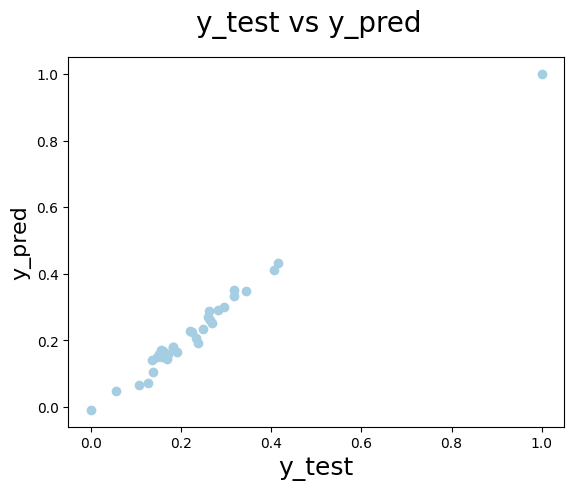

In [921]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


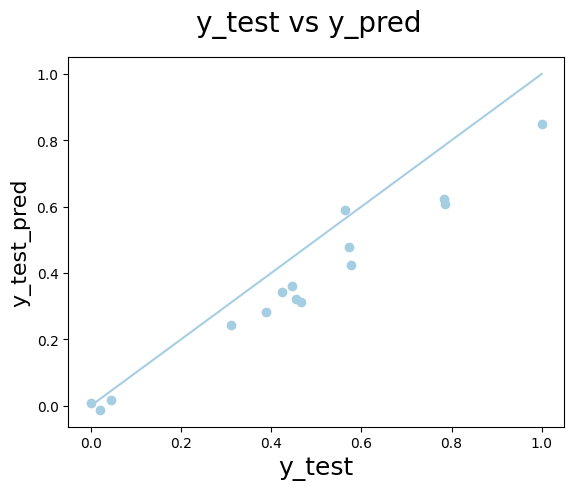

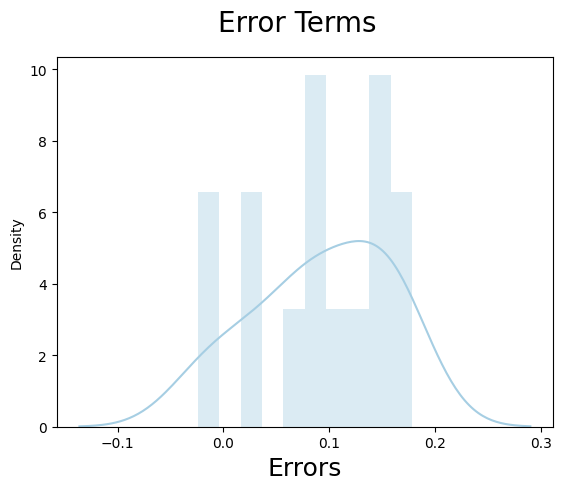

In [922]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


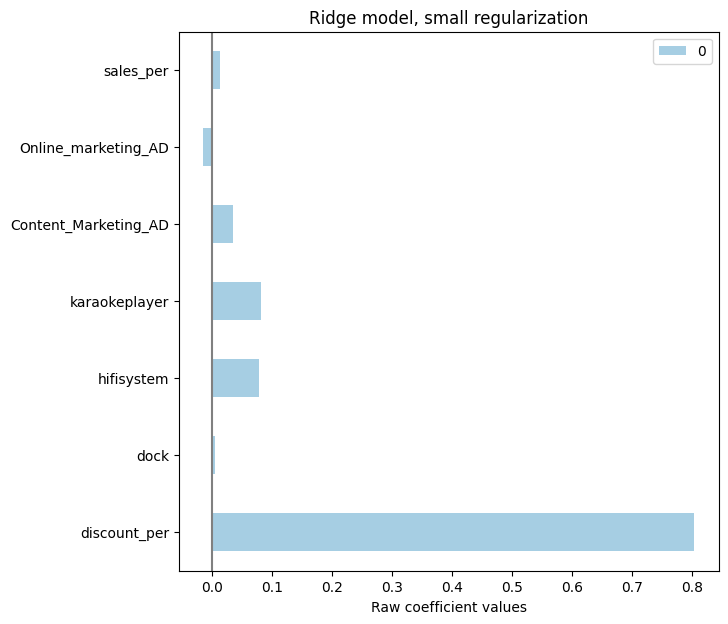

In [923]:
ha_model1=pd.DataFrame(ha_mode1.params)
ha_model1.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [924]:
print("HomeAudio Model1 Train Result")
print(nm.sqrt(mean_squared_error(y_train,y_train_pred)))
print(r2_score(y_train,y_train_pred))

print("HomeAudio Model1 Test Result")
print(nm.sqrt(mean_squared_error(y_test,y_test_pred)))
print(r2_score(y_test,y_test_pred))


HomeAudio Model1 Train Result
0.020082817595106956
0.9838694859721289
HomeAudio Model1 Test Result
0.11140007587627886
0.8373919411001784


Multiplicative

In [925]:
ha_wk[ha_wk.columns]=nm.log(ha_wk[ha_wk.columns])

ha_wk=ha_wk.replace([nm.inf, -nm.inf], 0)
ha_wk=ha_wk.fillna(0)

# ha_wk.drop(['product_mrp','order_count','Other_AD','units'],1,inplace=True)

In [926]:
df_train, df_test = train_test_split(ha_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()
scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train


In [927]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)

df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['discount_per', 'fmradio', 'luxury', 'boombox', 'djcontroller', 'dock',
       'hifisystem', 'voicerecorder', 'mean_temp_c', 'Digital_AD',
       'Content_Marketing_AD', 'Sponsorship_AD', 'Online_marketing_AD',
       'cod_per', 'sales_per'],
      dtype='object')

In [928]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     210.2
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           7.32e-18
Time:                        17:22:37   Log-Likelihood:                 104.76
No. Observations:                  35   AIC:                            -177.5
Df Residuals:                      19   BIC:                            -152.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0392 

Features     VIF
1                fmradio  130.93
0           discount_per  100.05
13               cod_per   78.69
5                   dock   36.16
2                 luxury   34.03
10  Content_Marketing_AD   33.34
12   Online_marketing_AD   29.48
6             hifisystem   29.28
3                boombox   22.80
11        Sponsorship_AD   22.73
9             Digital_AD   16.69
7          voicerecorder   10.53
8            mean_temp_c   10.30
14             sales_per    7.44
4           djcontroller    5.61

In [929]:
features=features.drop('fmradio',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     234.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           5.21e-19
Time:                        17:22:37   Log-Likelihood:                 104.55
No. Observations:                  35   AIC:                            -179.1
Df Residuals:                      20   BIC:                            -155.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0275 

Features    VIF
0           discount_per  99.04
12               cod_per  52.69
1                 luxury  33.92
9   Content_Marketing_AD  29.52
11   Online_marketing_AD  29.45
5             hifisystem  24.98
4                   dock  22.81
2                boombox  22.74
10        Sponsorship_AD  22.31
8             Digital_AD  15.64
7            mean_temp_c   9.75
6          voicerecorder   9.46
13             sales_per   7.39
3           djcontroller   5.51

In [930]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     260.8
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           3.63e-20
Time:                        17:22:38   Log-Likelihood:                 104.28
No. Observations:                  35   AIC:                            -180.6
Df Residuals:                      21   BIC:                            -158.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0382 

Features    VIF
0           discount_per  95.08
1                 luxury  33.20
9   Content_Marketing_AD  24.94
11   Online_marketing_AD  24.75
5             hifisystem  23.86
4                   dock  22.06
10        Sponsorship_AD  20.39
2                boombox  20.24
8             Digital_AD  15.62
6          voicerecorder   8.99
7            mean_temp_c   8.77
12             sales_per   6.59
3           djcontroller   5.35

In [931]:
features=features.drop('djcontroller',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     293.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.24e-21
Time:                        17:22:38   Log-Likelihood:                 104.14
No. Observations:                  35   AIC:                            -182.3
Df Residuals:                      22   BIC:                            -162.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0426 

Features    VIF
0           discount_per  91.62
1                 luxury  32.55
8   Content_Marketing_AD  24.93
10   Online_marketing_AD  23.92
3                   dock  21.99
4             hifisystem  20.52
2                boombox  20.24
9         Sponsorship_AD  19.06
7             Digital_AD  14.41
5          voicerecorder   8.99
6            mean_temp_c   8.52
11             sales_per   6.56

In [932]:
features=features.drop('hifisystem',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     332.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.30e-22
Time:                        17:22:38   Log-Likelihood:                 104.00
No. Observations:                  35   AIC:                            -184.0
Df Residuals:                      23   BIC:                            -165.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0379 

Features    VIF
0           discount_per  90.58
1                 luxury  27.48
9    Online_marketing_AD  23.61
7   Content_Marketing_AD  20.44
2                boombox  20.24
3                   dock  20.18
8         Sponsorship_AD  16.80
6             Digital_AD  13.07
4          voicerecorder   8.86
5            mean_temp_c   8.51
10             sales_per   6.53

In [933]:
features=features.drop('voicerecorder',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     356.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.44e-23
Time:                        17:22:38   Log-Likelihood:                 102.81
No. Observations:                  35   AIC:                            -183.6
Df Residuals:                      24   BIC:                            -166.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0261 

Features    VIF
0          discount_per  89.58
1                luxury  26.64
8   Online_marketing_AD  23.30
2               boombox  20.24
3                  dock  20.04
6  Content_Marketing_AD  19.90
7        Sponsorship_AD  16.64
5            Digital_AD  12.38
4           mean_temp_c   8.51
9             sales_per   6.28

In [934]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     404.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           8.75e-25
Time:                        17:22:38   Log-Likelihood:                 102.47
No. Observations:                  35   AIC:                            -184.9
Df Residuals:                      25   BIC:                            -169.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0181    

Features    VIF
0         discount_per  65.52
7  Online_marketing_AD  22.97
2              boombox  20.18
1               luxury  19.94
3                 dock  17.74
6       Sponsorship_AD  15.93
5           Digital_AD  10.08
4          mean_temp_c   7.95
8            sales_per   6.27

In [935]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     456.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           6.01e-26
Time:                        17:22:38   Log-Likelihood:                 101.87
No. Observations:                  35   AIC:                            -185.7
Df Residuals:                      26   BIC:                            -171.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0012      0.015     -0.

Features    VIF
0    discount_per  42.73
2         boombox  19.89
1          luxury  19.26
3            dock  17.59
6  Sponsorship_AD   9.22
5      Digital_AD   8.67
4     mean_temp_c   7.87
7       sales_per   5.98

In [936]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     508.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           5.87e-27
Time:                        17:22:38   Log-Likelihood:                 100.75
No. Observations:                  35   AIC:                            -185.5
Df Residuals:                      27   BIC:                            -173.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0078      0.013      0.

Features    VIF
0    discount_per  36.74
2         boombox  19.06
3            dock  17.24
1          luxury  15.53
5      Digital_AD   8.62
6  Sponsorship_AD   8.14
4     mean_temp_c   6.33

In [937]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     566.2
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           7.03e-28
Time:                        17:22:38   Log-Likelihood:                 99.320
No. Observations:                  35   AIC:                            -184.6
Df Residuals:                      28   BIC:                            -173.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0205      0.011      1.

Features    VIF
0    discount_per  36.34
3            dock  16.56
1          luxury  15.51
2         boombox  12.22
4      Digital_AD   8.53
5  Sponsorship_AD   7.68

In [938]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])
ha_model2=lm
ha_features2=features

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              6272.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):                    9.13e-44
Time:                        17:22:38   Log-Likelihood:                          97.130
No. Observations:                  35   AIC:                                     -182.3
Df Residuals:                      29   BIC:                                     -172.9
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

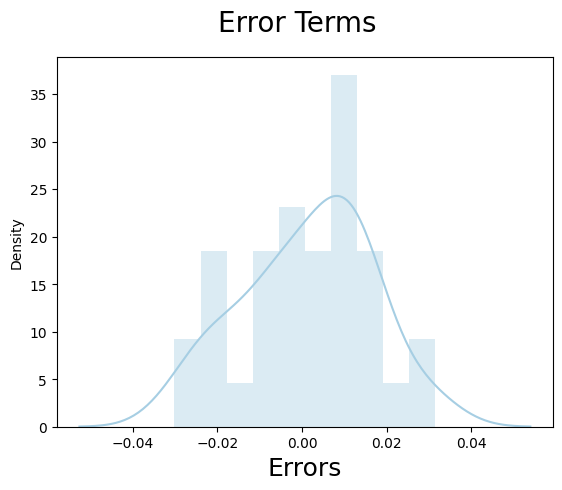

Text(0, 0.5, 'y_pred')

In [939]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


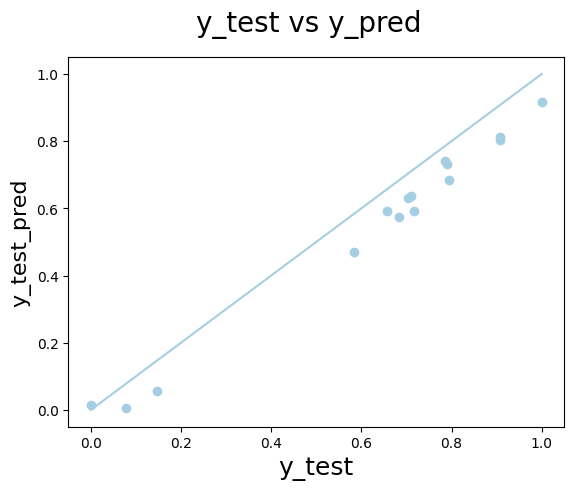

In [940]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]

y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


In [941]:
f = KFold(n_splits = 5, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)

y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

scores

array([0.99448024, 0.98401199, 0.97236499, 0.97267954, 0.94631922])

In [942]:
ha_model2=pd.DataFrame(ha_model2.params)
ha_model2.plot.barh(figsize=(10, 5))
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [943]:
print("HomeAudio Model2 Train Result")
print(nm.sqrt(mean_squared_error(y_train,y_train_pred)))
print(r2_score(y_train,y_train_pred))

print("HomeAudio Model2 Test Result")
print(nm.sqrt(mean_squared_error(y_test,y_test_pred)))
print(r2_score(y_test,y_test_pred))

HomeAudio Model2 Train Result
0.015084546448699191
0.9907353689921633
HomeAudio Model2 Test Result
0.0870999228390135
0.9143032696701167


In [944]:
ha_full=pd.concat([df_train,df_test])
ha_gmv=pd.DataFrame(pd.concat([y_train_pred,y_test_pred]))
# ha_gmv
ha_gmv.rename(columns={0:'gmv_pred'},inplace=True)
ha_data=pd.merge(ha_gmv,ha_full,left_index=True,right_index=True)
# ha_gmv
fig, ax = plt.subplots()
ax.scatter(data=ha_data,x='gmv',y='gmv_pred', edgecolors=(0, 0, 0))
ax.plot([ha_data.gmv.min(), ha_data.gmv.max()], [ha_data.gmv.min(), ha_data.gmv.max()],  lw=4)
plt.title("Home Audio")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

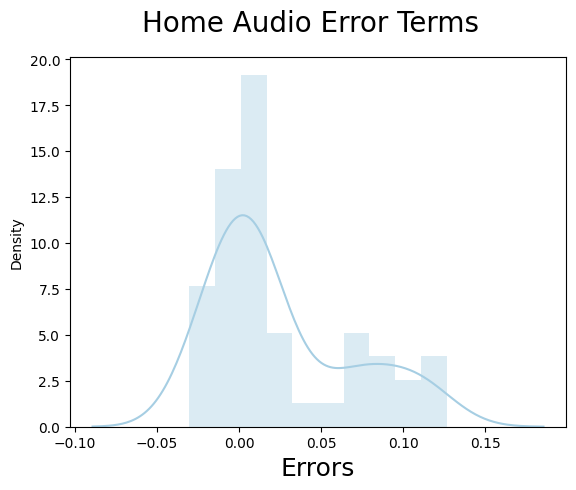

In [945]:

fig=plt.figure()
sns.distplot((ha_data.gmv-ha_data.gmv_pred),bins=10)
fig.suptitle('Home Audio Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

Gaming Accessories

In [946]:
game=EleData3[EleData3.product_analytic_sub_category=='gamingaccessory']
# game.discount_per


In [947]:
# game.columns
game_dum=pd.get_dummies(game.product_analytic_vertical)
game=pd.concat([game,game_dum],axis=1)

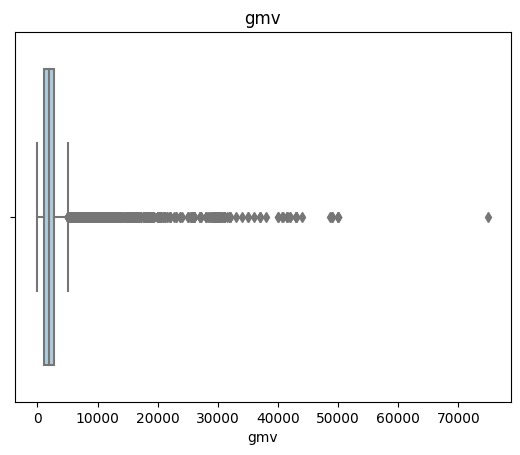

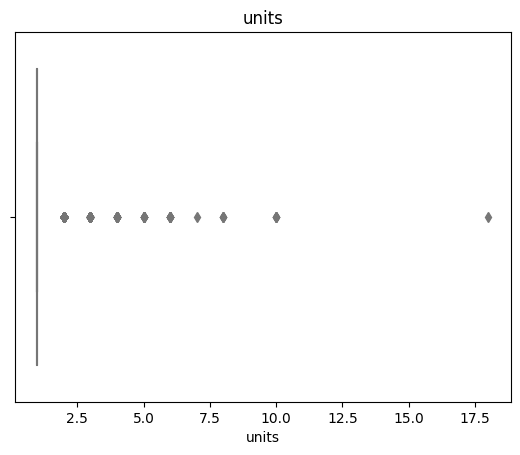

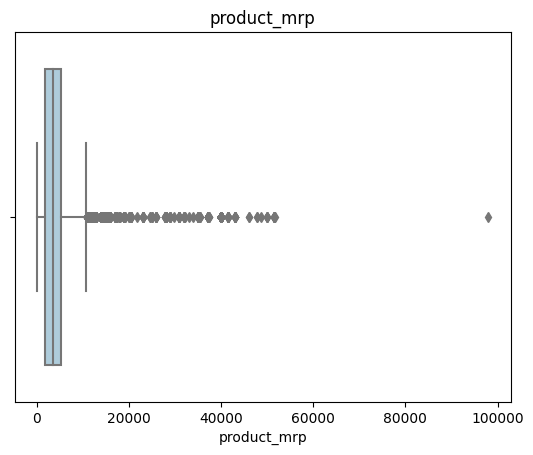

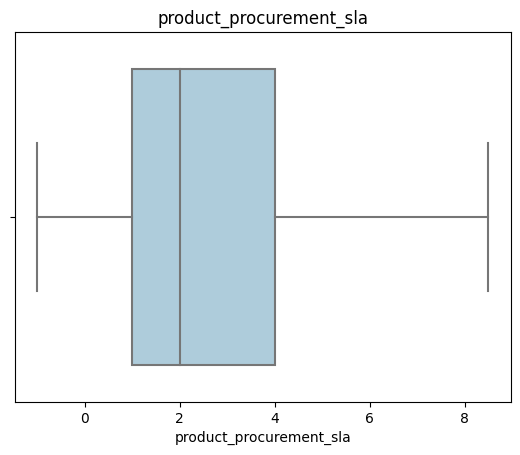

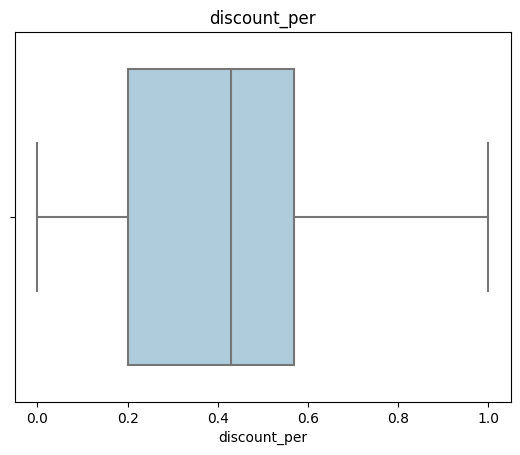

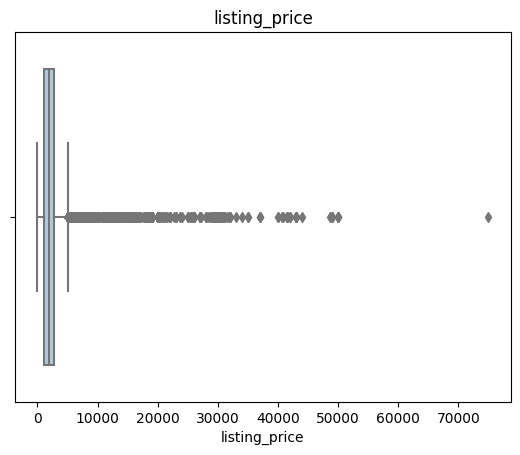

In [948]:
for i in num:
  sns.boxplot(x=ha[i])
  plt.title(i)
  plt.show()

In [949]:

q1=game['sla'].quantile(0.25)
q3=game['sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['sla']>up,'sla']=up
game.loc[game['sla']<lw,'sla']=lw
q1=game['product_procurement_sla'].quantile(0.25)
q3=game['product_procurement_sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['product_procurement_sla']>up,'product_procurement_sla']=up
game.loc[game['product_procurement_sla']<lw,'product_procurement_sla']=lw


-0.5   11.5
0.5   4.5


In [950]:
game.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived', 'week', 'listing_price',
       'discount_per', 'sale_date', 'Stock_Index', 'NPS', 'Year',
       'pay_date_flag', 'Holiday_flag', 'luxury', 'coolingpad',
       'gamecontrolmount', 'gamepad', 'gamingaccessorykit', 'gamingadapter',
       'gamingchargingstation', 'gamingheadset', 'gamingkeyboard',
       'gamingmemorycard', 'gamingmouse', 'gamingmousepad', 'gamingspeaker',
       'joystickgamingwheel', 'motioncontroller', 'tvoutcableaccessory'],
      dtype='object')

In [951]:
revenue_avg=pd.DataFrame(game.groupby('product_analytic_vertical').agg(nums=('order_item_id', 'count'),rev=('gmv', nm.sum))).reset_index()

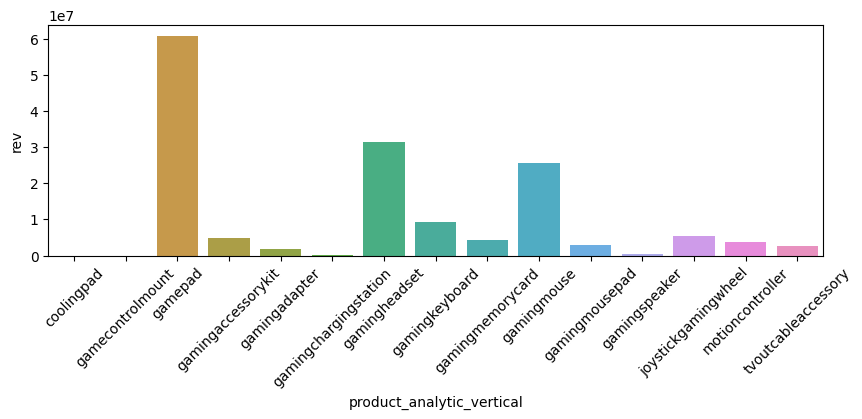

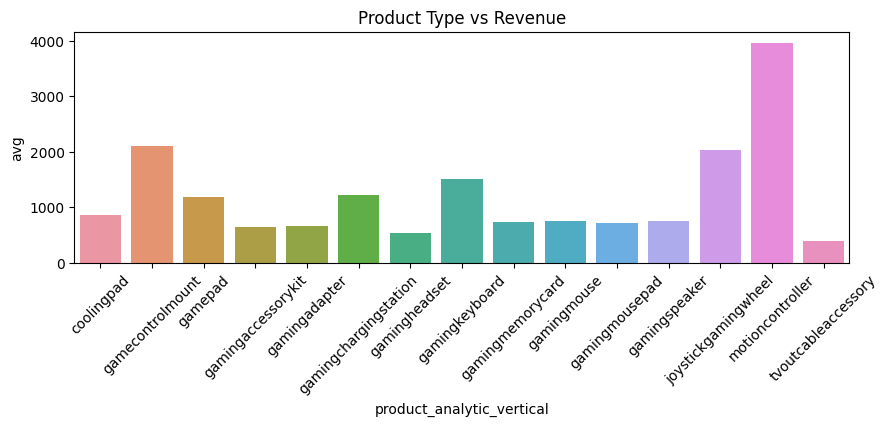

In [1015]:
revenue_avg['avg']=revenue_avg.rev/revenue_avg.nums
plt.figure(figsize=(10,3))
sns.barplot(x=revenue_avg.product_analytic_vertical,y=revenue_avg.rev)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10,3))
plt.title("Product Type vs Revenue")
sns.barplot(x=revenue_avg.product_analytic_vertical,y=revenue_avg.avg)
plt.xticks(rotation=45)
plt.show()

## highest selling products : gamepad,gamingheadset and gamingmouse
##  High avg reveue generating products : motioncotroller,joystickgamingwheel,gamingcontrolmount

In [953]:
game_wk=game.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique",'luxury':"sum", 'coolingpad':"sum",
                                    'gamecontrolmount':"sum", 'gamepad':"sum", 'gamingaccessorykit':"sum", 'gamingadapter':"sum",
                                    'gamingchargingstation':"sum", 'gamingheadset':"sum", 'gamingkeyboard':"sum",
                                    'gamingmemorycard':"sum", 'gamingmouse':"sum", 'gamingmousepad':"sum", 'gamingspeaker':"sum",
                                    'joystickgamingwheel':"sum", 'motioncontroller':"sum", 'tvoutcableaccessory':"sum"}).round(2)

game_wk=pd.merge(game_wk,weekly_kpis,on='week')

game_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

# game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
      #  'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day'],1,inplace=True)

game_wk.order_payment_type.value_counts()
game_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
game_wk["cod_per"]=game_wk["order_payment_cod"]/game_wk["order_count"]
game_wk.drop("order_payment_cod",1,inplace=True)
game_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)

game_wk['sales_per']=(game_wk['num_of_sales']-1)/7
game_wk.drop('num_of_sales',1,inplace=True)

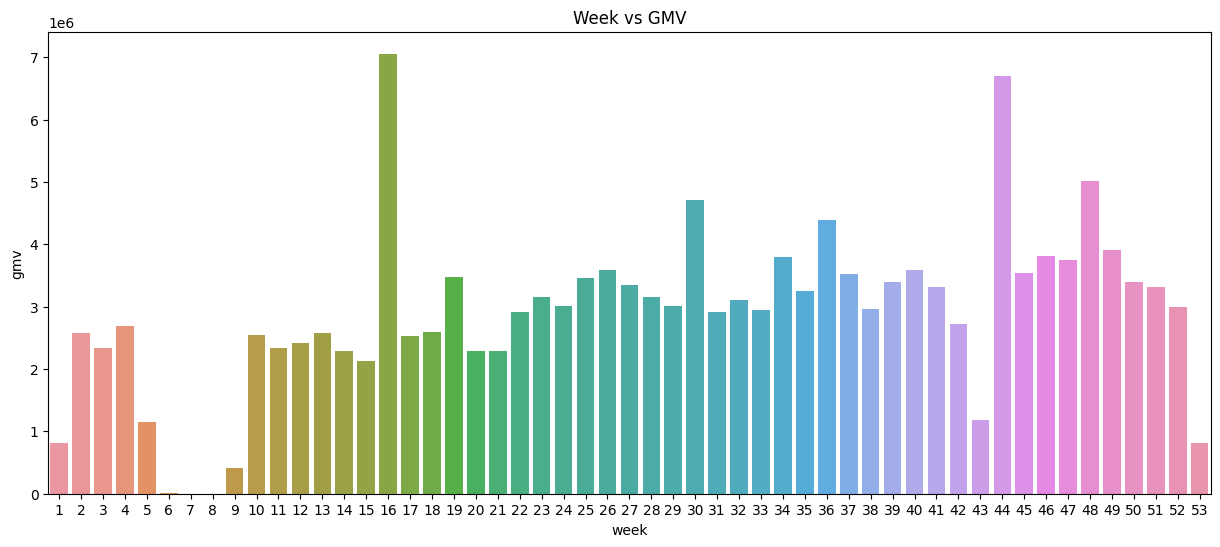

In [954]:
plt.figure(figsize=(15,6))
sns.barplot(x=game_wk['week'],y=game_wk['gmv'])
plt.title("Week vs GMV")
plt.show()
## 16 , 19, 20, 34, 36, 44

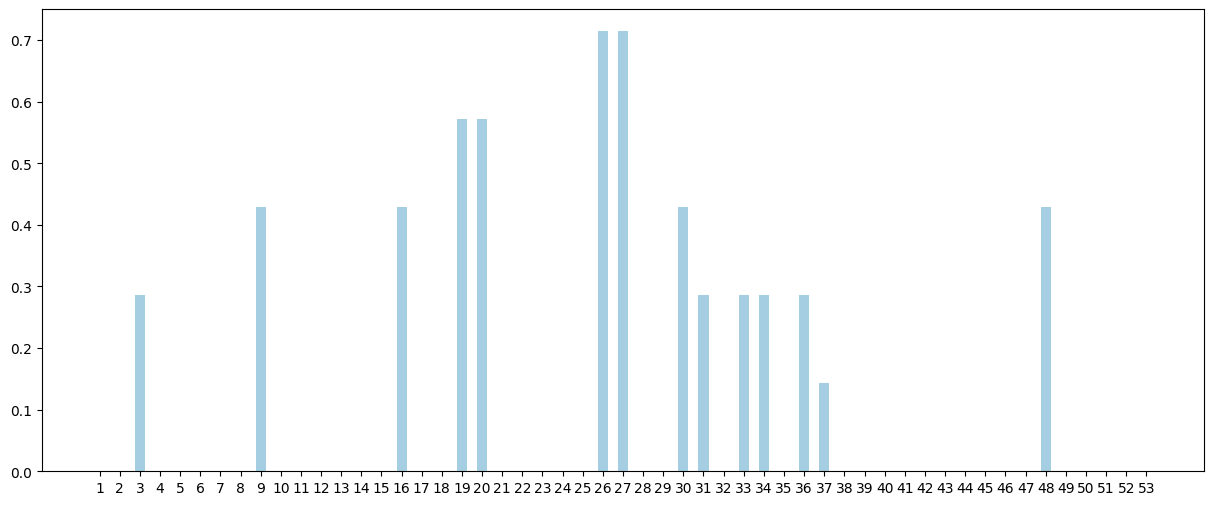

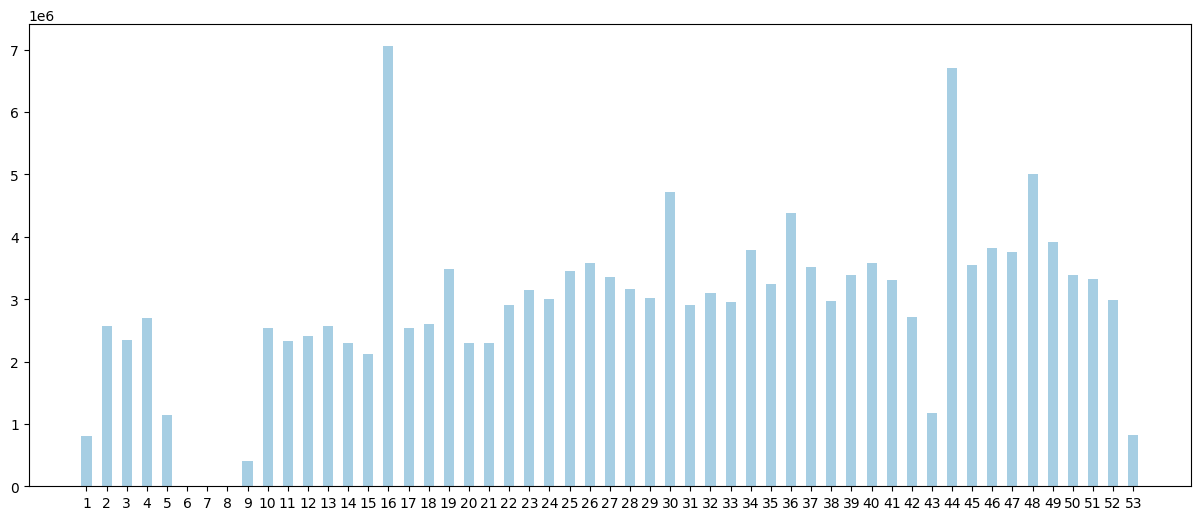

In [955]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=game_wk['week'],height=game_wk['sales_per'],width=width)
plt.xticks(game_wk['week'])
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=game_wk['week'],height=game_wk['gmv'],width=width)
plt.xticks(game_wk['week'])
plt.show()


## sales per as impact

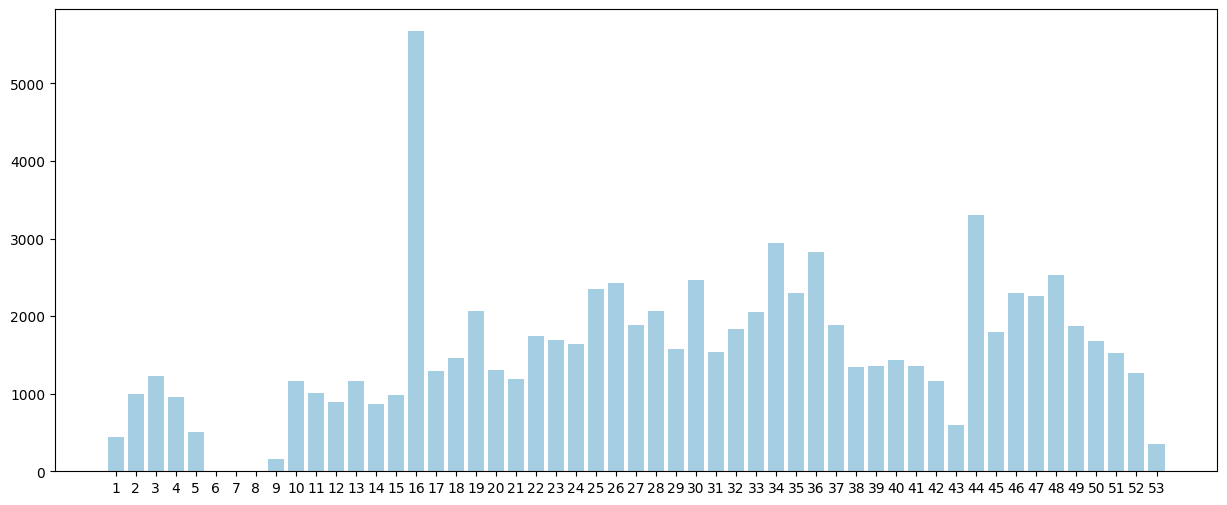

In [956]:
plt.figure(figsize=(15,6))
plt.bar(x=game_wk['week'],height=game_wk['discount_per'])
plt.xticks(game_wk['week'])
plt.show()

## not very much changes because of discount


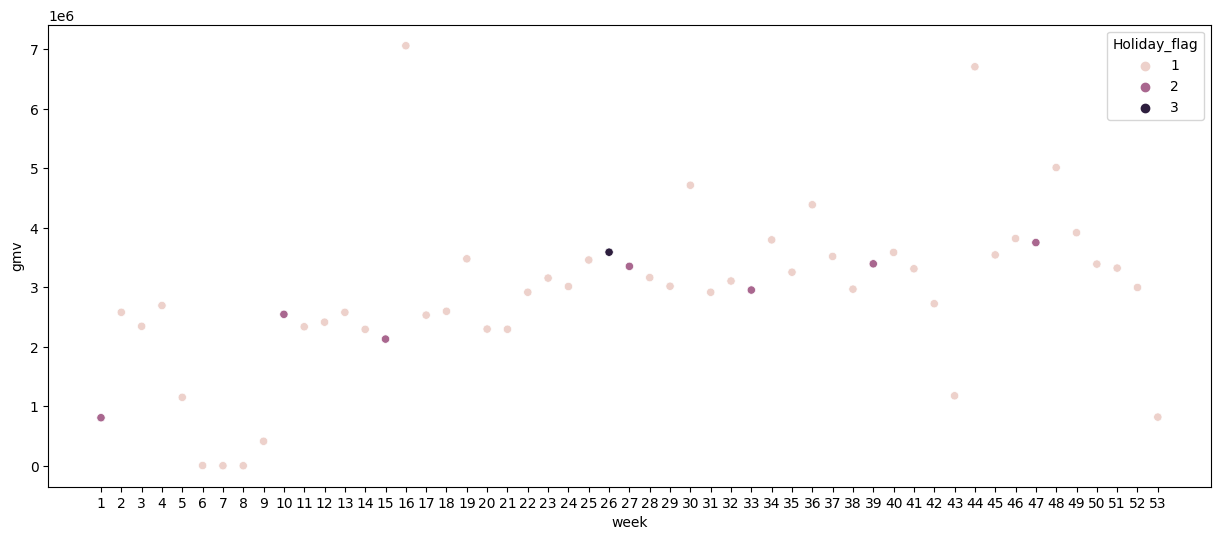

In [957]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=game_wk['week'],y=game_wk['gmv'],hue=game_wk['Holiday_flag'])
plt.xticks(game_wk['week'])
plt.show()


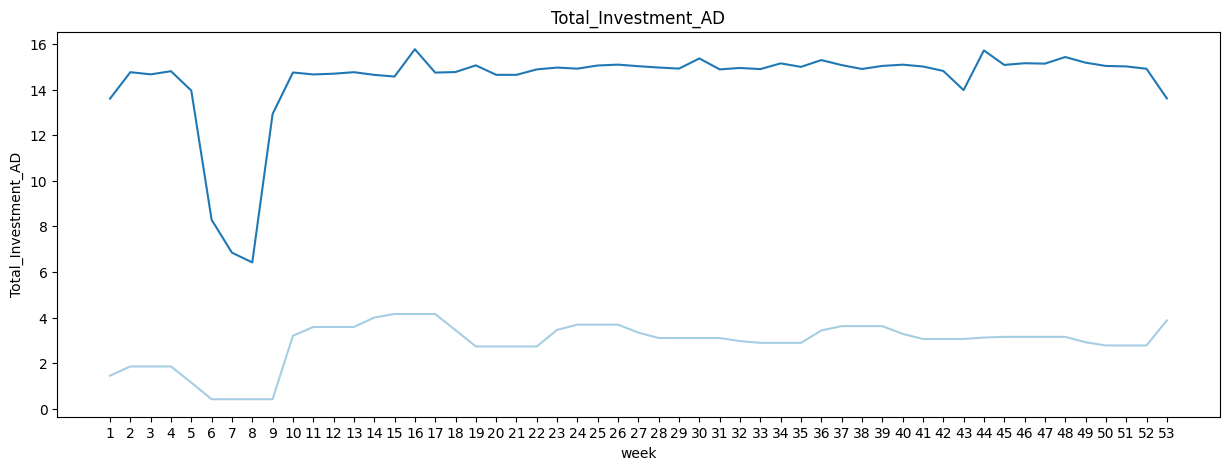

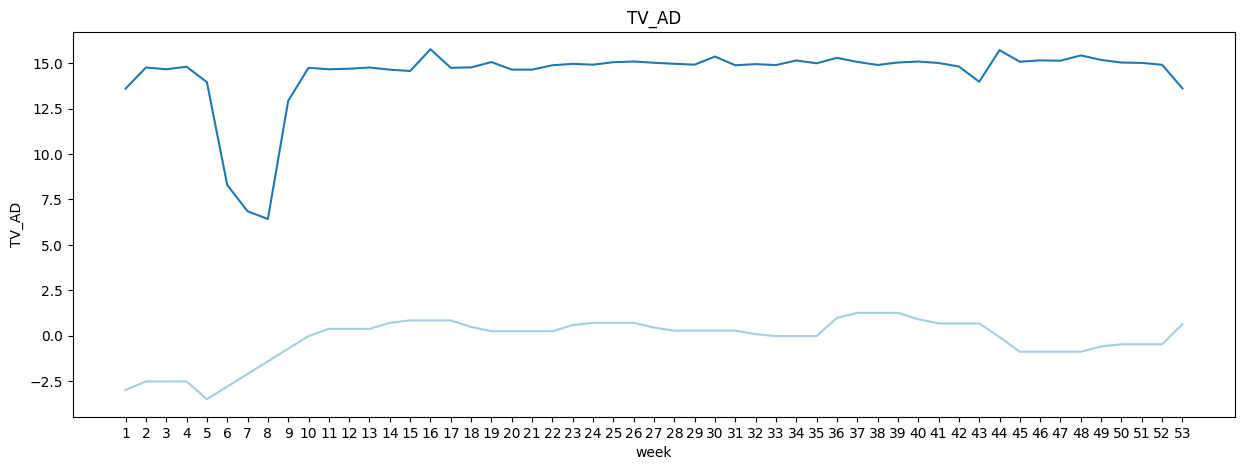

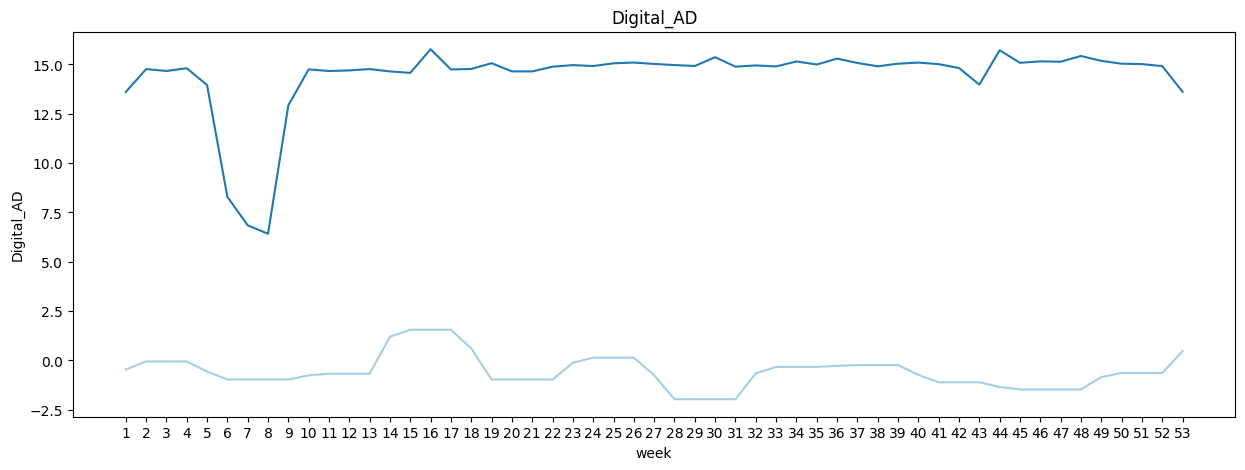

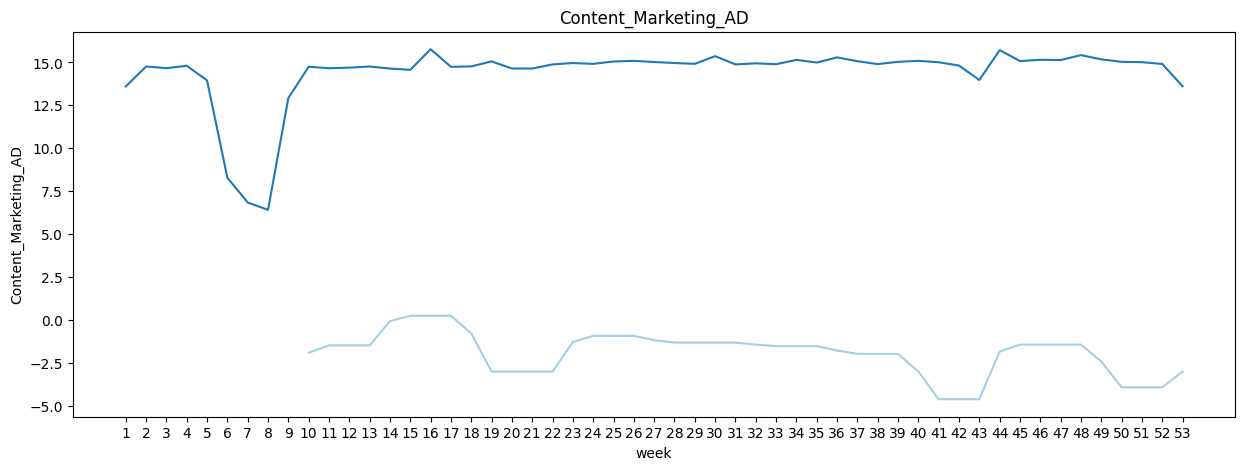

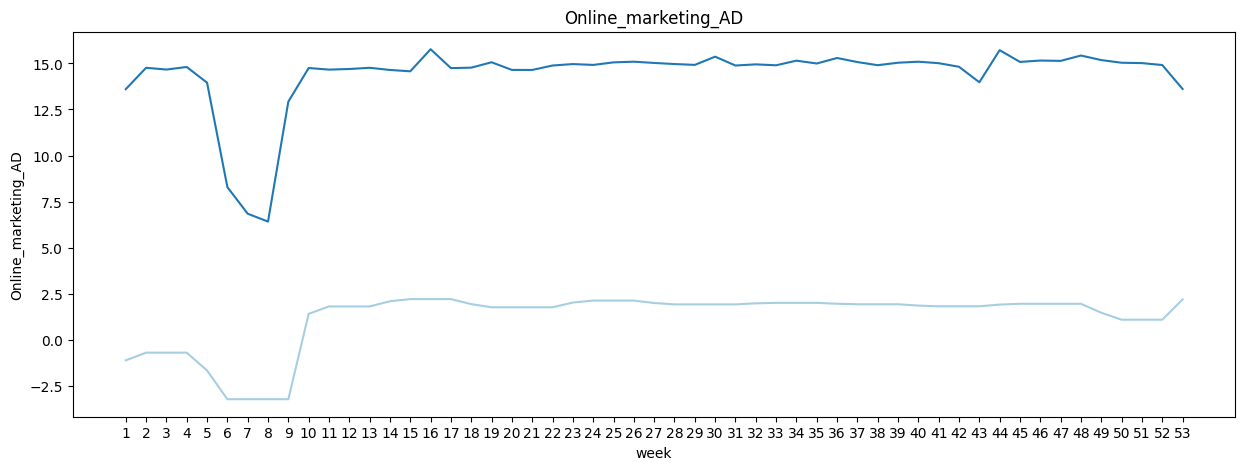

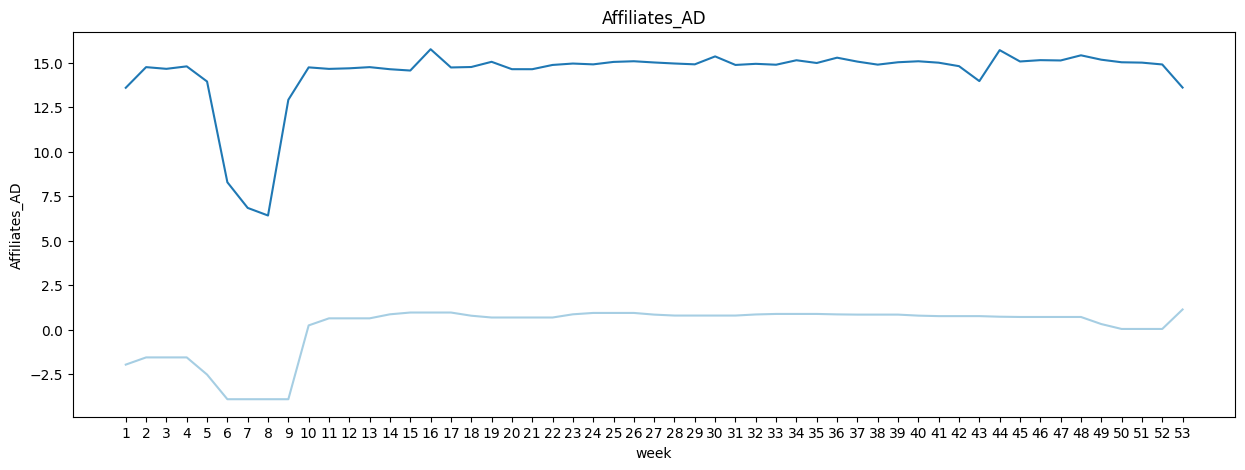

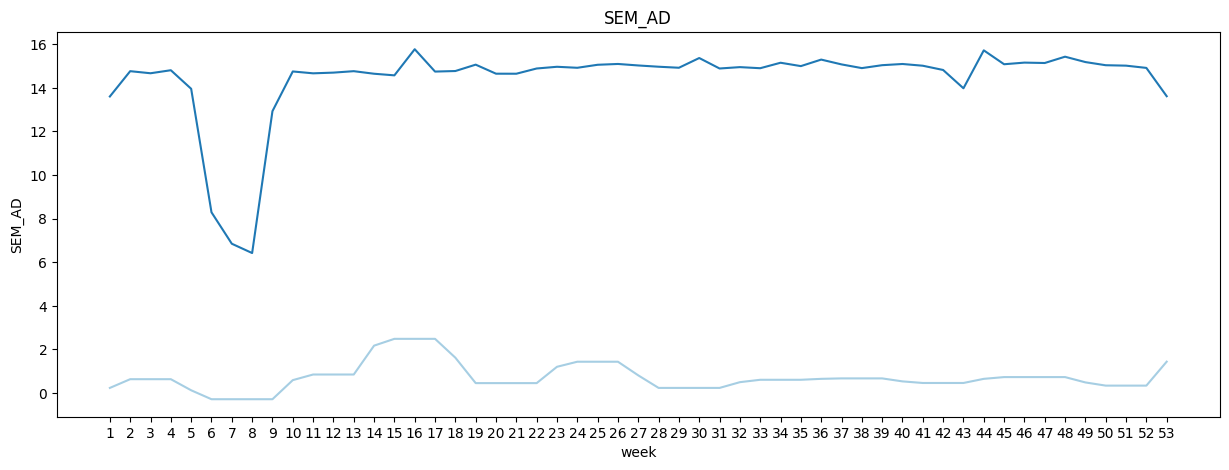

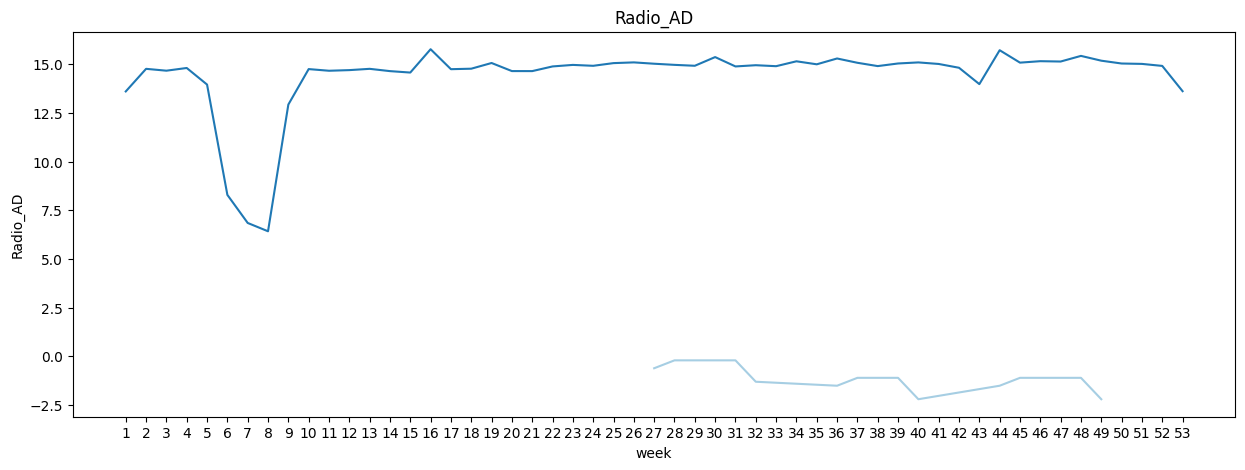

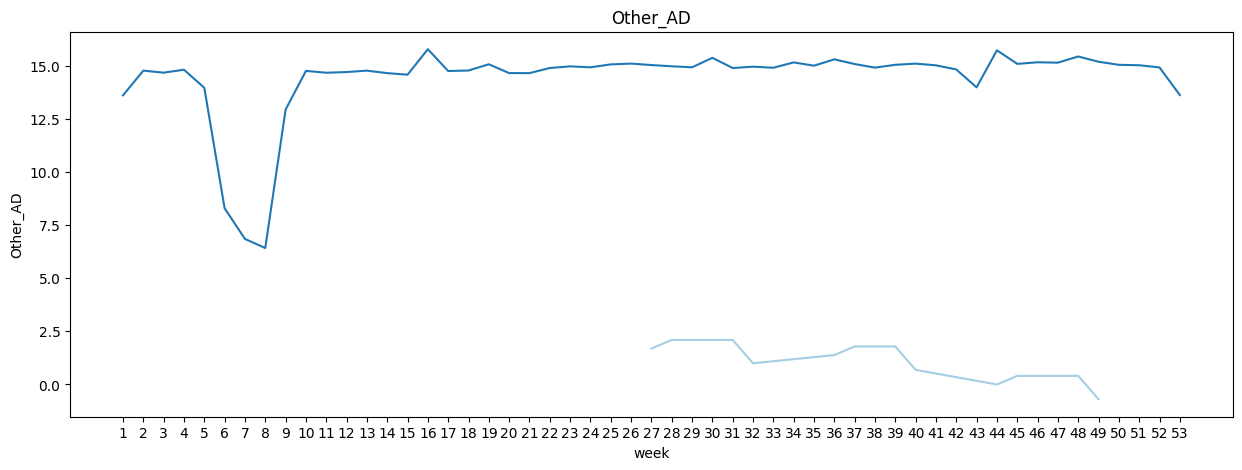

In [958]:
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=game_wk['week'],y=nm.log(game_wk[i]))
    sns.lineplot(x=game_wk['week'],y=nm.log(game_wk['gmv']))
    plt.xticks(game_wk['week'])
    x=x+1
    plt.show()

## affiliates , digital and other and total


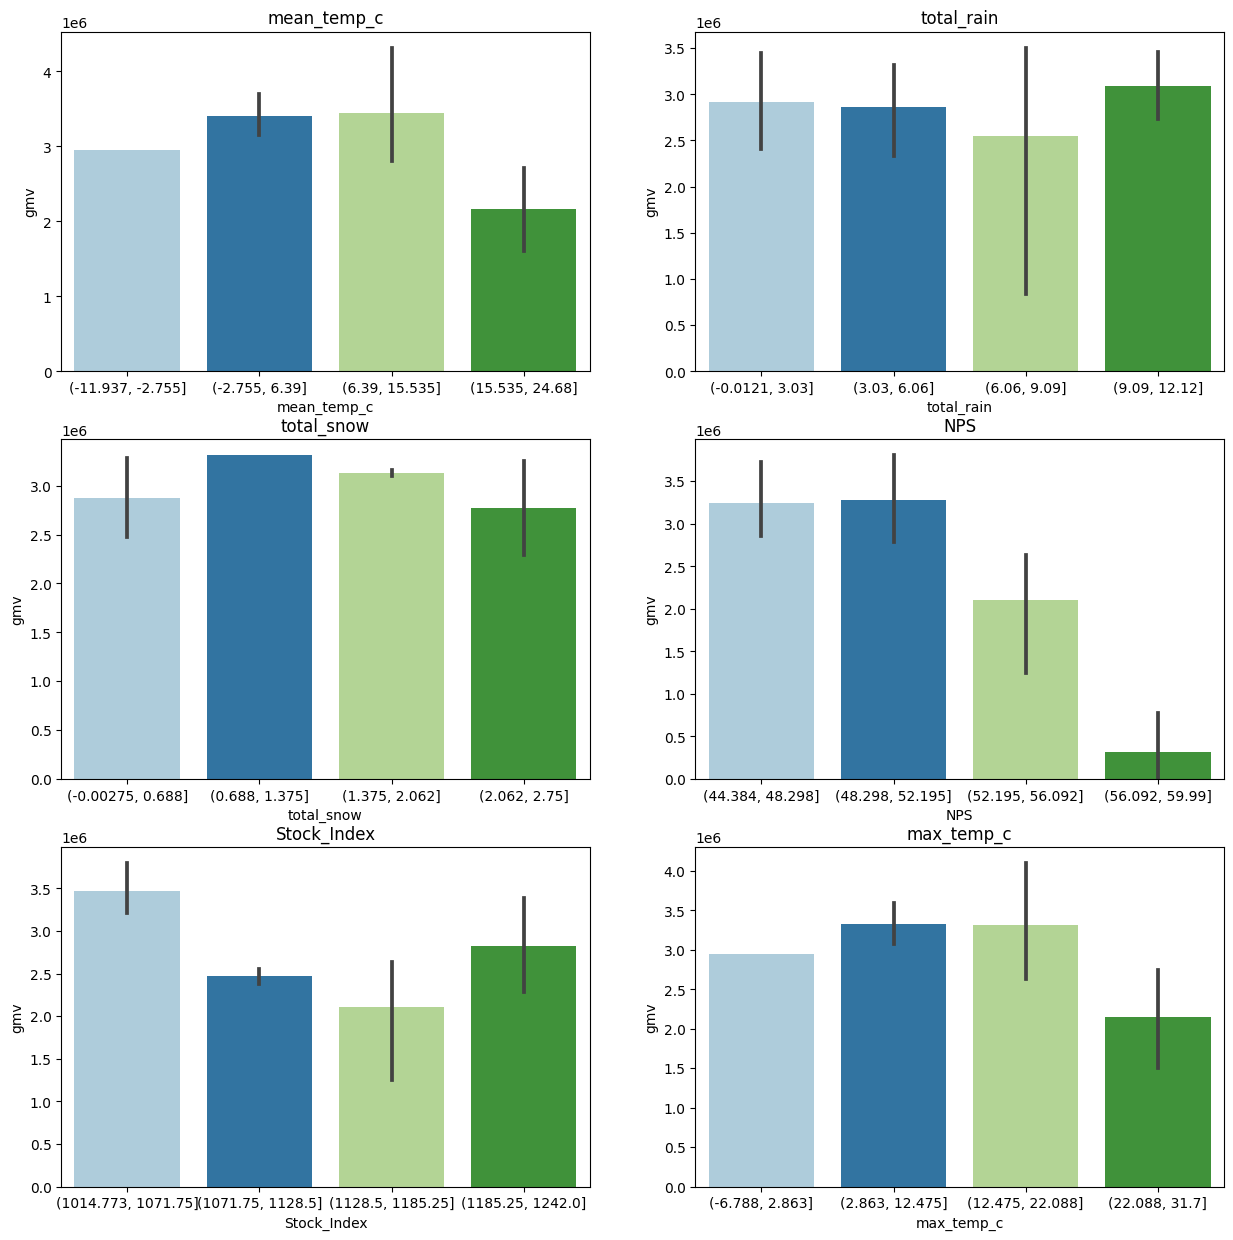

In [959]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=game_wk['gmv'],x=pd.cut(game_wk[i],bins=4))
  x=x+1

  ## max temp can be kept


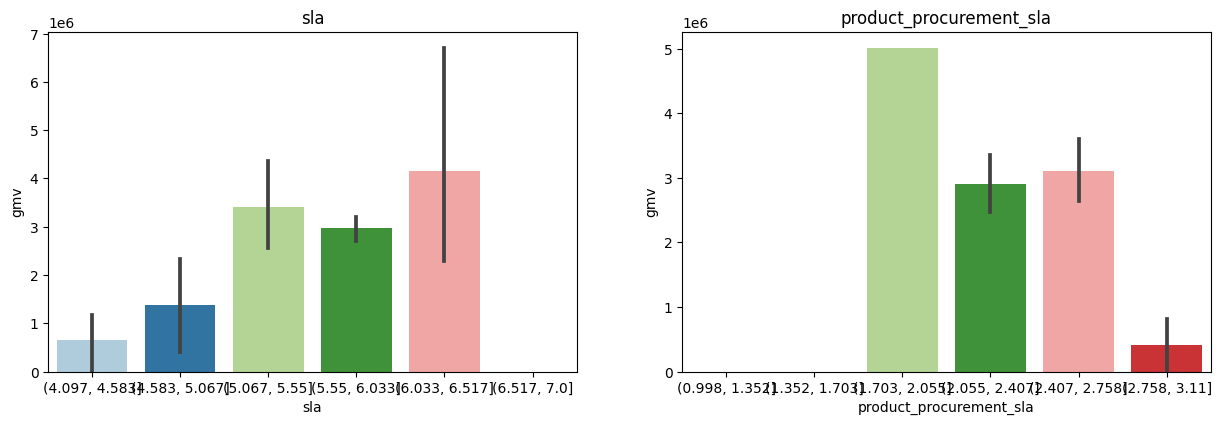

In [960]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=game_wk['gmv'],x=pd.cut(game_wk[i],bins=6))
  x=x+1

## sla not required

In [961]:
plt.figure(figsize=(15, 15))
sns.heatmap(game_wk.corr())

<Axes: >

In [962]:
game_wk.drop(['order_count','units','Other_AD','product_mrp','listing_price','max_temp_c','Other_AD','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio','Other_AD'],1,inplace=True)



<Axes: >

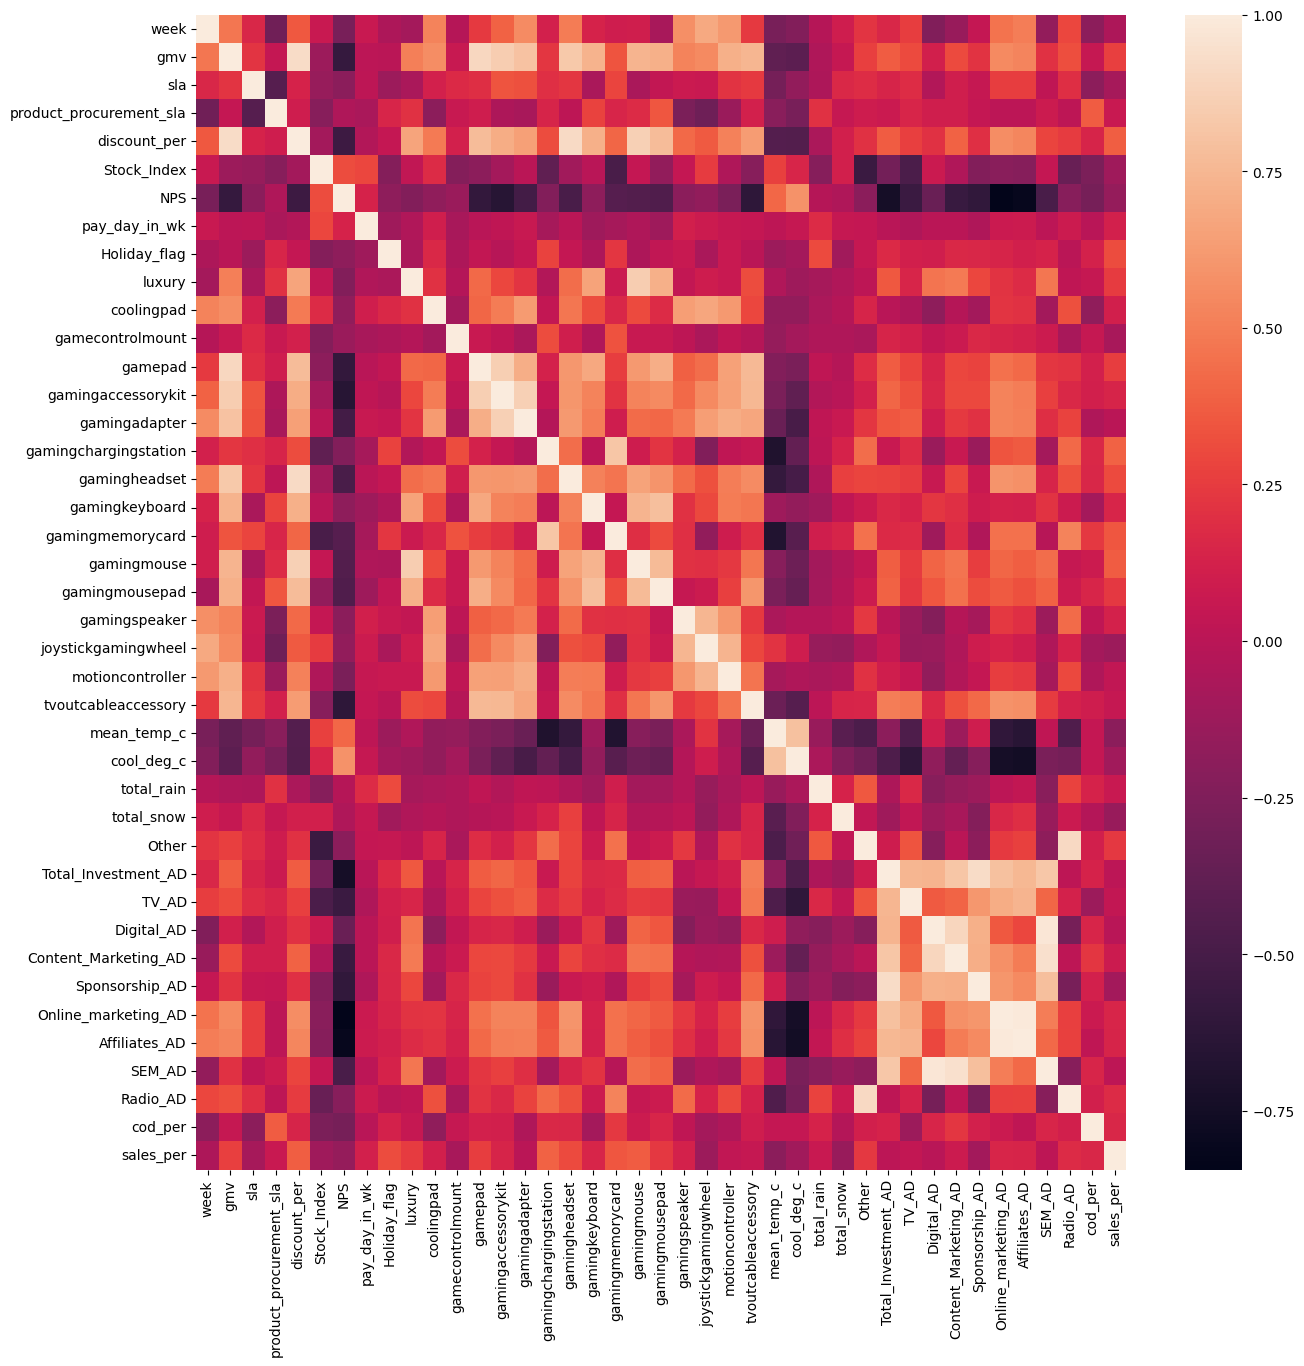

In [963]:

plt.figure(figsize=(15, 15))
sns.heatmap(game_wk.corr())

In [964]:
game_wk.drop(['Total_Investment_AD','cool_deg_c','gamingheadset','NPS','gamingmouse','Other','SEM_AD'],1,inplace=True)

In [965]:
df_train, df_test = train_test_split(game_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']


In [966]:
X_train.columns


Index(['week', 'sla', 'product_procurement_sla', 'discount_per', 'Stock_Index',
       'pay_day_in_wk', 'Holiday_flag', 'luxury', 'coolingpad',
       'gamecontrolmount', 'gamepad', 'gamingaccessorykit', 'gamingadapter',
       'gamingchargingstation', 'gamingkeyboard', 'gamingmemorycard',
       'gamingmousepad', 'gamingspeaker', 'joystickgamingwheel',
       'motioncontroller', 'tvoutcableaccessory', 'mean_temp_c', 'total_rain',
       'total_snow', 'TV_AD', 'Digital_AD', 'Content_Marketing_AD',
       'Sponsorship_AD', 'Online_marketing_AD', 'Affiliates_AD', 'Radio_AD',
       'cod_per', 'sales_per'],
      dtype='object')

In [967]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)


RFE(estimator=SVR(kernel='linear'), n_features_to_select=15)

In [968]:
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['discount_per', 'luxury', 'coolingpad', 'gamepad', 'gamingaccessorykit',
       'gamingadapter', 'gamingkeyboard', 'gamingmousepad', 'gamingspeaker',
       'joystickgamingwheel', 'motioncontroller', 'tvoutcableaccessory',
       'mean_temp_c', 'Online_marketing_AD', 'Affiliates_AD'],
      dtype='object')

In [969]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     80.38
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           4.08e-15
Time:                        17:23:01   Log-Likelihood:                 84.559
No. Observations:                  37   AIC:                            -137.1
Df Residuals:                      21   BIC:                            -111.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0815    

Features     VIF
13  Online_marketing_AD  443.33
14        Affiliates_AD  441.19
4    gamingaccessorykit   61.21
0          discount_per   56.78
3               gamepad   51.10
7        gamingmousepad   42.85
6        gamingkeyboard   40.08
5         gamingadapter   37.91
10     motioncontroller   27.84
11  tvoutcableaccessory   15.31
9   joystickgamingwheel   10.95
1                luxury   10.81
8         gamingspeaker    5.64
12          mean_temp_c    5.06
2            coolingpad    4.68

In [970]:
features=features.drop('coolingpad',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     90.22
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           4.17e-16
Time:                        17:23:01   Log-Likelihood:                 84.558
No. Observations:                  37   AIC:                            -139.1
Df Residuals:                      22   BIC:                            -115.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0818    

Features     VIF
13        Affiliates_AD  381.94
12  Online_marketing_AD  380.16
3    gamingaccessorykit   61.02
0          discount_per   55.01
2               gamepad   51.02
6        gamingmousepad   42.55
5        gamingkeyboard   39.84
4         gamingadapter   37.04
9      motioncontroller   27.84
10  tvoutcableaccessory   15.31
1                luxury    9.96
8   joystickgamingwheel    9.70
7         gamingspeaker    5.01
11          mean_temp_c    4.53

In [971]:
features=features.drop('gamingmousepad',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     101.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           4.02e-17
Time:                        17:23:01   Log-Likelihood:                 84.555
No. Observations:                  37   AIC:                            -141.1
Df Residuals:                      23   BIC:                            -118.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0831    

Features     VIF
12        Affiliates_AD  347.85
11  Online_marketing_AD  338.88
3    gamingaccessorykit   57.65
0          discount_per   52.17
2               gamepad   48.94
4         gamingadapter   35.00
5        gamingkeyboard   25.80
8      motioncontroller   25.45
9   tvoutcableaccessory   14.67
1                luxury    9.96
7   joystickgamingwheel    9.63
6         gamingspeaker    4.61
10          mean_temp_c    4.53

In [972]:
features=features.drop('gamingadapter',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     114.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           3.75e-18
Time:                        17:23:01   Log-Likelihood:                 84.502
No. Observations:                  37   AIC:                            -143.0
Df Residuals:                      24   BIC:                            -122.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0858    

Features     VIF
11        Affiliates_AD  338.34
10  Online_marketing_AD  335.79
0          discount_per   51.30
2               gamepad   48.03
3    gamingaccessorykit   37.09
7      motioncontroller   25.17
4        gamingkeyboard   22.54
8   tvoutcableaccessory   14.59
1                luxury    9.89
6   joystickgamingwheel    7.56
5         gamingspeaker    4.61
9           mean_temp_c    3.97

In [973]:
features=features.drop('gamingspeaker',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])
#

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     129.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           3.48e-19
Time:                        17:23:01   Log-Likelihood:                 84.369
No. Observations:                  37   AIC:                            -144.7
Df Residuals:                      25   BIC:                            -125.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0880    

Features     VIF
10        Affiliates_AD  333.67
9   Online_marketing_AD  331.00
2               gamepad   47.39
0          discount_per   46.55
3    gamingaccessorykit   33.38
6      motioncontroller   22.35
4        gamingkeyboard   20.65
7   tvoutcableaccessory   14.58
1                luxury    9.80
5   joystickgamingwheel    6.88
8           mean_temp_c    3.86

In [974]:
features=features.drop('gamingkeyboard',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     136.9
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           7.28e-20
Time:                        17:23:01   Log-Likelihood:                 82.984
No. Observations:                  37   AIC:                            -144.0
Df Residuals:                      26   BIC:                            -126.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0883    

Features     VIF
9        Affiliates_AD  293.51
8  Online_marketing_AD  277.67
0         discount_per   46.42
2              gamepad   43.80
3   gamingaccessorykit   33.35
5     motioncontroller   17.38
6  tvoutcableaccessory   14.56
1               luxury    6.95
4  joystickgamingwheel    6.14
7          mean_temp_c    3.83

In [975]:
features=features.drop('Affiliates_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     157.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           5.67e-21
Time:                        17:23:02   Log-Likelihood:                 82.961
No. Observations:                  37   AIC:                            -145.9
Df Residuals:                      27   BIC:                            -129.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0924    

Features    VIF
0         discount_per  46.10
2              gamepad  43.10
3   gamingaccessorykit  32.78
5     motioncontroller  16.92
6  tvoutcableaccessory  14.31
8  Online_marketing_AD   9.85
1               luxury   6.69
4  joystickgamingwheel   5.85
7          mean_temp_c   3.81

In [976]:
features=features.drop('tvoutcableaccessory',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     167.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.50e-21
Time:                        17:23:02   Log-Likelihood:                 81.209
No. Observations:                  37   AIC:                            -144.4
Df Residuals:                      28   BIC:                            -129.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0901    

Features    VIF
0         discount_per  45.64
2              gamepad  39.51
3   gamingaccessorykit  30.65
5     motioncontroller  16.85
7  Online_marketing_AD   8.73
1               luxury   6.65
4  joystickgamingwheel   5.85
6          mean_temp_c   3.80

In [977]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     197.4
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.05e-22
Time:                        17:23:02   Log-Likelihood:                 81.176
No. Observations:                  37   AIC:                            -146.4
Df Residuals:                      29   BIC:                            -133.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0934    

Features    VIF
2              gamepad  39.22
0         discount_per  37.14
3   gamingaccessorykit  26.18
5     motioncontroller  15.74
4  joystickgamingwheel   5.80
1               luxury   5.67
6          mean_temp_c   3.79

In [978]:
features=features.drop('luxury',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     210.9
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           3.85e-23
Time:                        17:23:02   Log-Likelihood:                 78.966
No. Observations:                  37   AIC:                            -143.9
Df Residuals:                      30   BIC:                            -132.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0723    

Features    VIF
1              gamepad  38.38
2   gamingaccessorykit  22.26
4     motioncontroller  13.72
0         discount_per  11.72
3  joystickgamingwheel   5.76
5          mean_temp_c   3.19

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              986.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):                    5.88e-34
Time:                        17:23:02   Log-Likelihood:                          73.053
No. Observations:                  37   AIC:                                     -134.1
Df Residuals:                      31   BIC:                                     -124.4
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

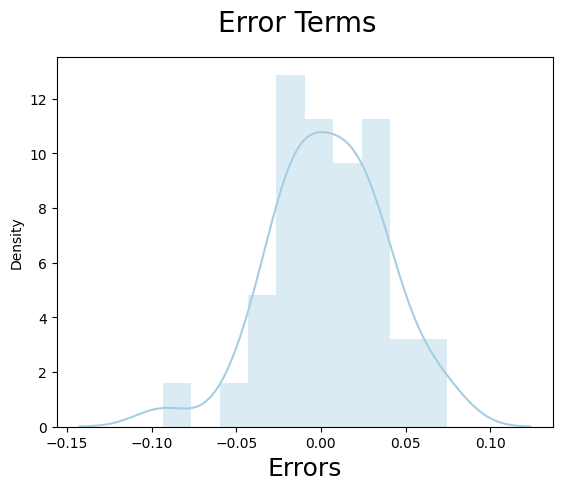

Text(0, 0.5, 'y_pred')

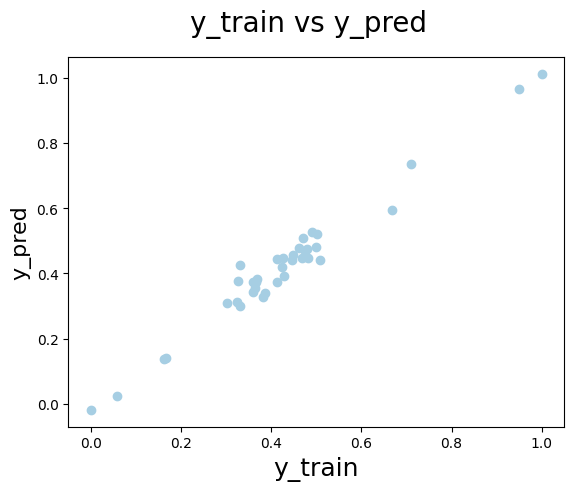

In [979]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


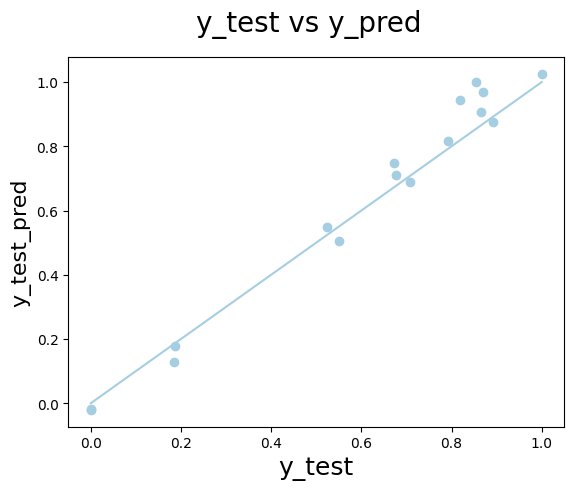

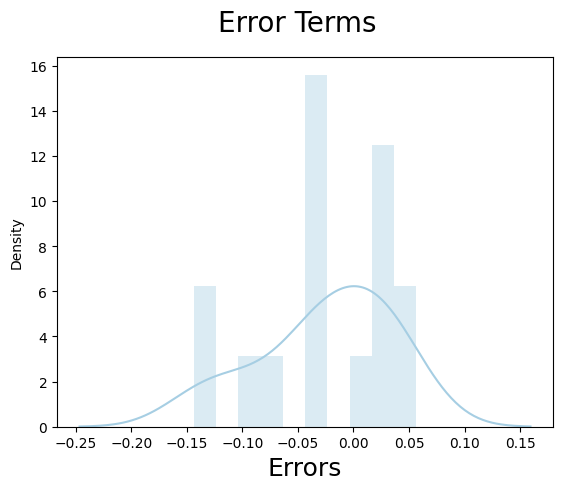

In [980]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


In [981]:
y_test

25    0.818211
48    0.892903
52    0.186250
37    0.676503
6     0.000000
18    0.792830
20    0.522857
46    0.855038
5     0.000693
31    0.707736
33    0.865381
45    0.870483
35    1.000000
32    0.673146
0     0.183911
11    0.550010
Name: gmv, dtype: float64

In [982]:
f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [983]:
print("Game Model1 Train Result")
print(nm.sqrt(mean_squared_error(y_train,y_train_pred)))
print(r2_score(y_train,y_train_pred))

print("Game Model1 Test Result")
print(nm.sqrt(mean_squared_error(y_test,y_test_pred)))
print(r2_score(y_test,y_test_pred))

Game Model1 Train Result
0.03359578698757141
0.9681157861340571
Game Model1 Test Result
0.06301229225245057
0.9611200240121698


In [984]:
# multiplicative
game_wk[game_wk.columns]=nm.log(game_wk[game_wk.columns])


In [985]:

game_wk=game_wk.replace([nm.inf, -nm.inf], 0)
game_wk=game_wk.fillna(0)



In [986]:
df_train, df_test = train_test_split(game_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train


In [987]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=20, step=1)
selector.fit(X_train, y_train)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features

# tvoutcableaccessory,gamingaccessorykit,gamingadapter,coolinpad

Index(['sla', 'product_procurement_sla', 'discount_per', 'luxury', 'gamepad',
       'gamingaccessorykit', 'gamingadapter', 'gamingkeyboard',
       'gamingmemorycard', 'gamingmousepad', 'joystickgamingwheel',
       'motioncontroller', 'tvoutcableaccessory', 'total_rain',
       'Content_Marketing_AD', 'Sponsorship_AD', 'Online_marketing_AD',
       'Affiliates_AD', 'cod_per', 'sales_per'],
      dtype='object')

In [988]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     122.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           7.23e-14
Time:                        17:23:03   Log-Likelihood:                 109.78
No. Observations:                  37   AIC:                            -177.6
Df Residuals:                      16   BIC:                            -143.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
17            Affiliates_AD  29812.10
16      Online_marketing_AD  29406.64
4                   gamepad   2086.26
5        gamingaccessorykit   2036.49
2              discount_per   2034.01
7            gamingkeyboard    973.80
9            gamingmousepad    647.53
6             gamingadapter    596.38
12      tvoutcableaccessory    517.84
11         motioncontroller    212.86
10      joystickgamingwheel    127.07
8          gamingmemorycard    124.52
3                    luxury     82.51
0                       sla     55.27
18                  cod_per     47.93
15           Sponsorship_AD     44.83
1   product_procurement_sla     39.15
14     Content_Marketing_AD     29.54
19                sales_per     17.38
13               total_rain     16.24

In [989]:
features=features.drop('total_rain',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     137.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           6.02e-15
Time:                        17:23:04   Log-Likelihood:                 109.77
No. Observations:                  37   AIC:                            -179.5
Df Residuals:                      17   BIC:                            -147.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
16            Affiliates_AD  28415.00
15      Online_marketing_AD  28263.78
4                   gamepad   2034.62
2              discount_per   1991.60
5        gamingaccessorykit   1966.42
7            gamingkeyboard    858.15
9            gamingmousepad    641.70
6             gamingadapter    573.33
12      tvoutcableaccessory    502.97
11         motioncontroller    185.52
10      joystickgamingwheel    121.41
8          gamingmemorycard    104.08
3                    luxury     82.02
0                       sla     54.96
17                  cod_per     44.36
14           Sponsorship_AD     36.73
1   product_procurement_sla     31.16
13     Content_Marketing_AD     29.18
18                sales_per     16.45

In [990]:
features=features.drop('luxury',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     153.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           4.74e-16
Time:                        17:23:04   Log-Likelihood:                 109.77
No. Observations:                  37   AIC:                            -181.5
Df Residuals:                      18   BIC:                            -150.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
14      Online_marketing_AD  25034.86
15            Affiliates_AD  24828.96
3                   gamepad   1727.29
2              discount_per   1698.60
4        gamingaccessorykit   1363.34
6            gamingkeyboard    838.03
8            gamingmousepad    569.68
5             gamingadapter    549.76
11      tvoutcableaccessory    500.87
10         motioncontroller    164.72
9       joystickgamingwheel    109.57
7          gamingmemorycard    101.38
0                       sla     51.16
16                  cod_per     38.24
13           Sponsorship_AD     35.45
12     Content_Marketing_AD     29.15
1   product_procurement_sla     21.27
17                sales_per     16.44

In [991]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     167.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           4.26e-17
Time:                        17:23:04   Log-Likelihood:                 109.39
No. Observations:                  37   AIC:                            -182.8
Df Residuals:                      19   BIC:                            -153.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
15            Affiliates_AD  23895.41
14      Online_marketing_AD  23836.57
3                   gamepad   1667.81
2              discount_per   1537.59
4        gamingaccessorykit   1232.55
6            gamingkeyboard    710.40
8            gamingmousepad    560.65
5             gamingadapter    541.26
11      tvoutcableaccessory    495.07
10         motioncontroller    163.54
9       joystickgamingwheel    103.71
7          gamingmemorycard     96.11
0                       sla     49.28
13           Sponsorship_AD     35.37
1   product_procurement_sla     20.69
12     Content_Marketing_AD     20.22
16                sales_per     16.36

In [992]:
features=features.drop('gamingmousepad',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     187.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           3.02e-18
Time:                        17:23:04   Log-Likelihood:                 109.39
No. Observations:                  37   AIC:                            -184.8
Df Residuals:                      20   BIC:                            -157.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
13      Online_marketing_AD  22212.43
14            Affiliates_AD  22087.15
3                   gamepad   1623.28
2              discount_per   1518.54
4        gamingaccessorykit   1045.79
5             gamingadapter    540.78
6            gamingkeyboard    512.09
10      tvoutcableaccessory    489.44
9          motioncontroller    111.38
8       joystickgamingwheel    103.36
7          gamingmemorycard     78.29
0                       sla     49.27
12           Sponsorship_AD     35.10
11     Content_Marketing_AD     19.34
15                sales_per     15.80
1   product_procurement_sla     14.04

In [993]:
features=features.drop('gamingadapter',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     209.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.12e-19
Time:                        17:23:04   Log-Likelihood:                 109.32
No. Observations:                  37   AIC:                            -186.6
Df Residuals:                      21   BIC:                            -160.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
12      Online_marketing_AD  20739.61
13            Affiliates_AD  20313.30
2              discount_per   1506.48
3                   gamepad   1453.47
4        gamingaccessorykit    761.62
5            gamingkeyboard    489.58
9       tvoutcableaccessory    474.70
8          motioncontroller    111.00
7       joystickgamingwheel     85.72
6          gamingmemorycard     71.81
0                       sla     37.07
11           Sponsorship_AD     34.64
10     Content_Marketing_AD     16.70
1   product_procurement_sla     13.98
14                sales_per     13.90

In [994]:
features=features.drop('gamingkeyboard',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     232.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.48e-20
Time:                        17:23:04   Log-Likelihood:                 109.15
No. Observations:                  37   AIC:                            -188.3
Df Residuals:                      22   BIC:                            -164.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
11      Online_marketing_AD  17836.99
12            Affiliates_AD  17814.51
3                   gamepad   1439.48
2              discount_per   1136.46
4        gamingaccessorykit    759.54
8       tvoutcableaccessory    458.95
6       joystickgamingwheel     85.70
7          motioncontroller     75.12
5          gamingmemorycard     70.42
0                       sla     35.17
10           Sponsorship_AD     33.78
9      Content_Marketing_AD     16.63
13                sales_per     13.42
1   product_procurement_sla     12.85

In [995]:
features=features.drop('tvoutcableaccessory',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     257.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.09e-21
Time:                        17:23:04   Log-Likelihood:                 108.83
No. Observations:                  37   AIC:                            -189.7
Df Residuals:                      23   BIC:                            -167.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
10      Online_marketing_AD  17803.57
11            Affiliates_AD  17773.74
3                   gamepad   1188.16
2              discount_per   1120.45
4        gamingaccessorykit    705.55
6       joystickgamingwheel     83.03
5          gamingmemorycard     68.61
7          motioncontroller     65.59
0                       sla     34.96
9            Sponsorship_AD     32.06
8      Content_Marketing_AD     16.58
12                sales_per     13.13
1   product_procurement_sla     12.17

In [996]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     282.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           8.73e-23
Time:                        17:23:04   Log-Likelihood:                 108.29
No. Observations:                  37   AIC:                            -190.6
Df Residuals:                      24   BIC:                            -169.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0124 

Features       VIF
9    Online_marketing_AD  16309.92
10         Affiliates_AD  16215.61
1           discount_per   1118.46
2                gamepad   1115.81
3     gamingaccessorykit    609.71
5    joystickgamingwheel     81.69
4       gamingmemorycard     68.30
6       motioncontroller     62.21
0                    sla     33.99
8         Sponsorship_AD     31.07
11             sales_per     13.06
7   Content_Marketing_AD     12.77

In [997]:
features=features.drop('Sponsorship_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     317.4
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           5.43e-24
Time:                        17:23:04   Log-Likelihood:                 108.08
No. Observations:                  37   AIC:                            -192.2
Df Residuals:                      25   BIC:                            -172.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0102 

Features       VIF
9          Affiliates_AD  14448.91
8    Online_marketing_AD  13993.00
2                gamepad   1089.05
1           discount_per   1060.24
3     gamingaccessorykit    553.16
5    joystickgamingwheel     79.89
6       motioncontroller     62.10
4       gamingmemorycard     54.50
0                    sla     31.59
7   Content_Marketing_AD     12.66
10             sales_per     12.51

In [998]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     358.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           3.26e-25
Time:                        17:23:04   Log-Likelihood:                 107.84
No. Observations:                  37   AIC:                            -193.7
Df Residuals:                      26   BIC:                            -176.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0005    

Features      VIF
7  Online_marketing_AD  8216.26
8        Affiliates_AD  8200.70
2              gamepad  1088.37
1         discount_per  1030.78
3   gamingaccessorykit   540.35
6     motioncontroller    61.90
5  joystickgamingwheel    56.51
4     gamingmemorycard    54.45
0                  sla    30.53
9            sales_per    10.53

In [999]:
features=features.drop('gamingmemorycard',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     402.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.20e-26
Time:                        17:23:04   Log-Likelihood:                 107.36
No. Observations:                  37   AIC:                            -194.7
Df Residuals:                      27   BIC:                            -178.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0015    

Features      VIF
7        Affiliates_AD  7889.07
6  Online_marketing_AD  7806.41
2              gamepad  1064.88
1         discount_per   861.93
3   gamingaccessorykit   528.15
5     motioncontroller    54.93
4  joystickgamingwheel    40.33
0                  sla    28.29
8            sales_per    10.52

In [1000]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     446.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.00e-27
Time:                        17:23:04   Log-Likelihood:                 106.40
No. Observations:                  37   AIC:                            -194.8
Df Residuals:                      28   BIC:                            -180.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0173    

Features      VIF
7        Affiliates_AD  7888.91
6  Online_marketing_AD  7805.54
2              gamepad  1015.69
1         discount_per   842.84
3   gamingaccessorykit   524.73
5     motioncontroller    53.74
4  joystickgamingwheel    38.08
0                  sla    26.36

In [1001]:
features=features.drop('gamingaccessorykit',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     482.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           3.03e-28
Time:                        17:23:04   Log-Likelihood:                 104.75
No. Observations:                  37   AIC:                            -193.5
Df Residuals:                      29   BIC:                            -180.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0201    

Features      VIF
6        Affiliates_AD  7714.20
5  Online_marketing_AD  7576.93
1         discount_per   836.50
2              gamepad   680.01
4     motioncontroller    47.36
3  joystickgamingwheel    38.08
0                  sla    18.22

In [1002]:
features=features.drop('sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     565.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.86e-29
Time:                        17:23:04   Log-Likelihood:                 104.20
No. Observations:                  37   AIC:                            -194.4
Df Residuals:                      30   BIC:                            -183.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0199    

Features      VIF
5        Affiliates_AD  7667.87
4  Online_marketing_AD  7545.23
0         discount_per   830.58
1              gamepad   679.75
3     motioncontroller    46.22
2  joystickgamingwheel    37.04

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.854e+04
Date:                Wed, 11 Oct 2023   Prob (F-statistic):                    1.14e-53
Time:                        17:23:04   Log-Likelihood:                          103.21
No. Observations:                  37   AIC:                                     -194.4
Df Residuals:                      31   BIC:                                     -184.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

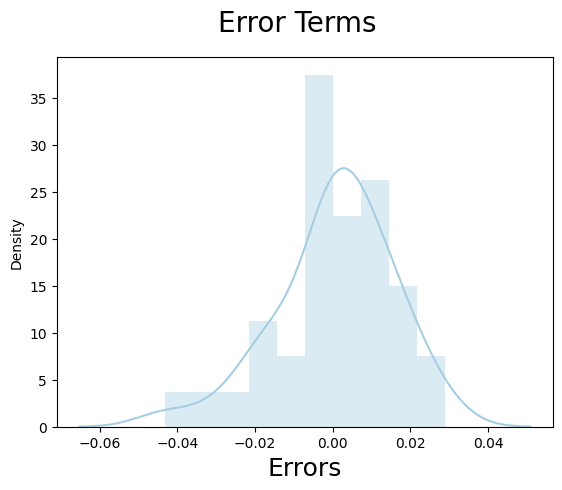

Text(0, 0.5, 'y_pred')

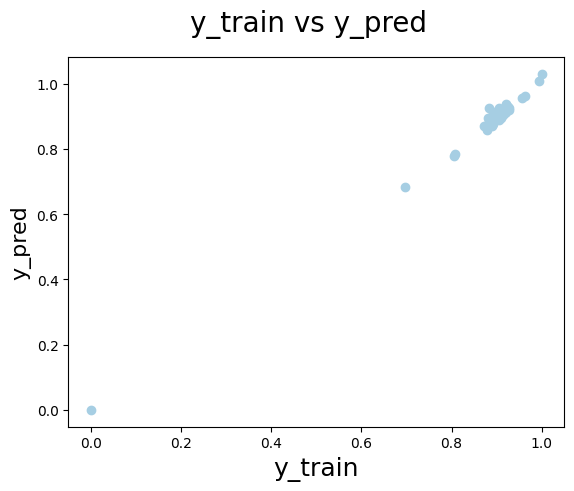

In [1003]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])
game_model2=lm

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)
# Plot heading
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


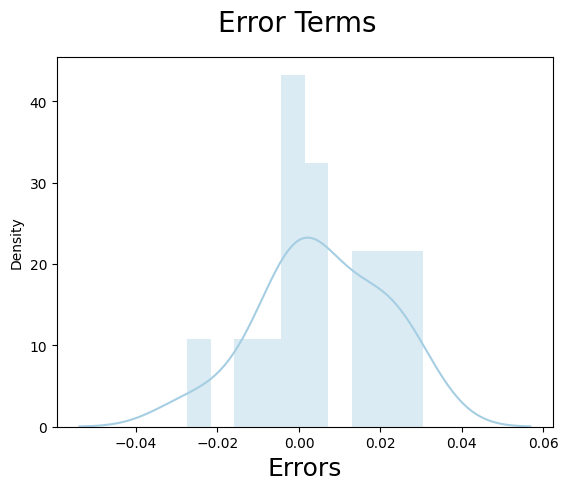

In [1004]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()



In [1005]:
f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)
print(scores)


fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

[  0.69686736   0.95861387   0.86610441   0.88613403 -36.45495898
   0.8135991    0.89248834  -4.07265942   0.94173488   0.87988595]


In [1006]:
game_model2=pd.DataFrame(game_model2.params)

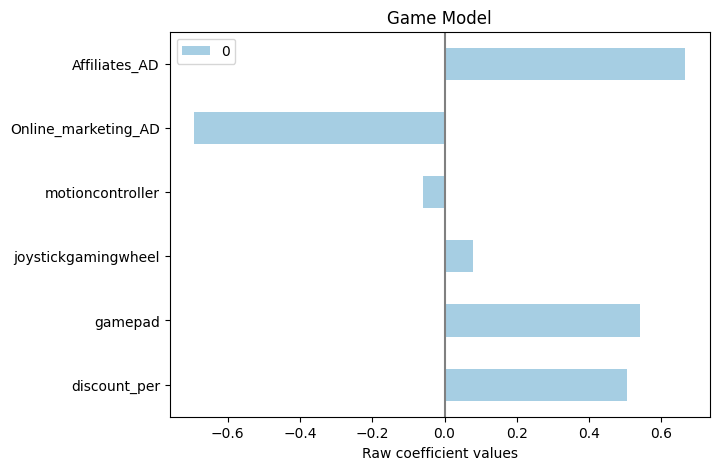

In [1012]:
game_model2.plot.barh(figsize=(9, 5))
plt.title("Game Model")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [1008]:
print("Game Model2 Train Result")
print(nm.sqrt(mean_squared_error(y_train,y_train_pred)))
print(r2_score(y_train,y_train_pred))

print("Game Model2 Test Result")
print(nm.sqrt(mean_squared_error(y_test,y_test_pred)))
print(r2_score(y_test,y_test_pred))

Game Model2 Train Result
0.014869977759194342
0.9907490832615847
Game Model2 Test Result
0.015886584787825366
0.9970208156031724


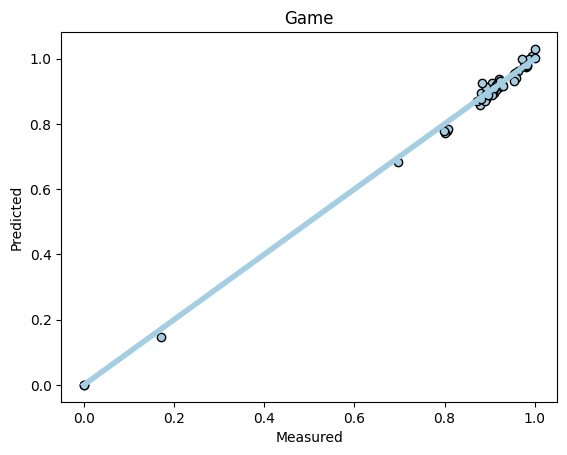

In [1009]:
game_full=pd.concat([df_train,df_test])
game_gmv=pd.DataFrame(pd.concat([y_train_pred,y_test_pred]))
# game_data
game_gmv.rename(columns={0:'gmv_pred'},inplace=True)
game_data=pd.merge(game_gmv,game_full,left_index=True,right_index=True)
# game_data
fig, ax = plt.subplots()
ax.scatter(data=game_data,x='gmv',y='gmv_pred', edgecolors=(0, 0, 0))
ax.plot([game_data.gmv.min(), game_data.gmv.max()], [game_data.gmv.min(), game_data.gmv.max()],  lw=4)
plt.title("Game")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

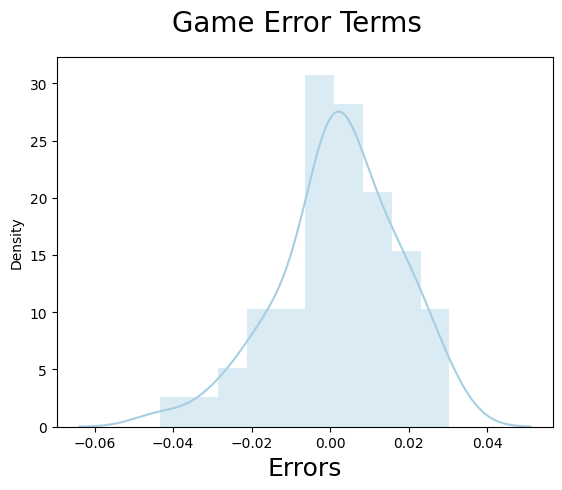

In [1010]:

fig=plt.figure()
sns.distplot((game_data.gmv-game_data.gmv_pred),bins=10)
fig.suptitle('Game Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()